# Sparse and Non Negative Shallow Auto Encoder with PADO, without original images
* Sparsity Regularizer : KL Divergence (KLdivSum), applied to the activation.
* Non-Negativity Regularizer : Non Negativity Constraint
* Number of epochs for training: 500 epochs
* Activation of the encoder: Sigmoid
* Encoder architecture: infoGAN
* Activation of the decoder: LeakyRELU (useless in case of Non-Negativity)
## Impact of the value of the sparsity parameters
* Sparsity objective: 0.01, 0.05, 0.1, 0.2
* Sparsity weight: 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5

### Addition of an PADO preprocessing, without the original images
* Input: Positive Additive Decomposition of Openings by reconstruction with a decreasing structuring element
* Original images (before the decomposition) not included as input to the AE

In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append('../SourceCode')
import bastien_utils
from nonNegSparseShallowAE import Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint
import datetime
import morphoMaths
import keras
import pandas as pd
keras.__version__

Using TensorFlow backend.


'2.2.0'

In [2]:
FILE_PATH = "../"
x_test, _ = bastien_utils.load_data(FILE_PATH, train=False, test=True, subsetTest=False)
x_small = x_test[:10]
x_small[2] = x_test[31]
print('x_small shape:', x_small.shape)

x_small shape: (10, 28, 28, 1)


In [3]:
x_small_PADO = morphoMaths.positive_decomposition_by_openings_by_rec(x_small[:,:,:,0], levels=5, step=1, init_step=1, add_original_images=False)
x_small_PADO.shape

/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:143: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  selem[[slice(d, d + 1) for d in offset]] = False
/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:161: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  images[[0] + inside_slices] = seed
/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:162: FutureWarning: Using a non-tuple sequence for mult

(10, 28, 28, 6)

In [7]:
results = pd.read_csv("../Results/ShallowAE/SeveralChannels/WithPADO_NoOriginals/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_09_09results")
results

Unnamed: 0  sparsity_objective  sparsity_weight  test_error  test_kl_loss  \
0            0                0.01           0.0001    0.012926      0.001413   
1            1                0.05           0.0001    0.012256      0.000968   
2            2                0.10           0.0001    0.012373      0.000606   
3            3                0.20           0.0001    0.011421      0.000219   
4            4                0.01           0.0005    0.016910      0.002445   
5            5                0.05           0.0005    0.015755      0.001510   
6            6                0.10           0.0005    0.014064      0.000807   
7            7                0.20           0.0005    0.011725      0.000215   
8            8                0.01           0.0010    0.020137      0.002848   
9            9                0.05           0.0010    0.017514      0.001599   
10          10                0.10           0.0010    0.014771      0.000760   
11          11                0.20           0.0010    0.012063      0.000191   
12          12                0.01           0.0050    0.032937      0.003475   
13          13                0.05           0.0050    0.021052      0.001269   
14          14                0.10           0.0050    0.016127      0.000573   
15          15                0.20           0.0050    0.011630      0.000359   
16          16                0.01           0.0100    0.045078      0.006090   
17          17                0.05           0.0100    0.020227      0.001369   
18          18                0.10           0.0100    0.015416      0.000707   
19          19                0.20           0.0100    0.011533      0.000599   
20          20                0.01           0.0500    0.046509      0.007554   
21          21                0.05           0.0500    0.021575      0.002200   
22          22                0.10           0.0500    0.014791      0.001957   
23          23                0.20           0.0500    0.011776      0.001958   
24          24                0.01           0.1000    0.050244      0.006815   
25          25                0.05           0.1000    0.019158      0.003409   
26          26                0.10           0.1000    0.015670      0.003554   
27          27                0.20           0.1000    0.012122      0.003564   
28          28                0.01           0.5000    0.074650      0.003420   
29          29                0.05           0.5000    0.027024      0.005710   
30          30                0.10           0.5000    0.023157      0.010823   
31          31                0.20           0.5000    0.020860      0.034579   

    test_max_approx_error_toOriginal_dilatation  \
0                                      0.788739   
1                                      0.917053   
2                                      1.036442   
3                                      1.353577   
4                                      0.196256   
5                                      0.302136   
6                                      0.483158   
7                                      1.070771   
8                                      0.112499   
9                                      0.171207   
10                                     0.342586   
11                                     0.954612   
12                                     0.036238   
13                                     0.052010   
14                                     0.197035   
15                                     0.930715   
16                                     0.055841   
17                                     0.059827   
18                                     0.204111   
19                                     0.949223   
20                                     0.056537   
21                                     0.054796   
22                                     0.300672   
23                                     1.104415   
24                                     0.063152   
25  

In [8]:
max_values = results.max(axis=0)
max_idx = results.idxmax()
min_values = results.min(axis=0)
min_idx = results.idxmin()
median_values = results.median()
std_values = results.std()
sparsity_objectives = results['sparsity_objective']
sparsity_weights = results['sparsity_weight']

In [9]:

print('***********************Maximum values**********************')
print(max_values[1:])
print('\n')
print('***********************Minimum values**********************')
print(min_values[1:])
print('\n')
print('***********************Median values**********************')
print(median_values[1:])


***********************Maximum values**********************
sparsity_objective                                 0.200000
sparsity_weight                                    0.500000
test_error                                         0.074650
test_kl_loss                                       0.034579
test_max_approx_error_toOriginal_dilatation        1.353577
test_max_approx_error_toRec_dilatation             1.378772
test_sparsity                                      0.765761
training_error                                     0.074957
training_kl_loss                                   0.025301
training_max_approx_error_toOriginal_dilatation    1.316302
training_max_approx_error_toRec_dilatation         1.363500
training_sparsity                                  0.750867
dtype: float64


***********************Minimum values**********************
sparsity_objective                                 0.010000
sparsity_weight                                    0.000100
test_error             

In [10]:
print('\033[1m'+'Lowest error: '+'\033[0m' , round(min_values['test_error'], 4), ', sparsity_objective=',sparsity_objectives[min_idx['test_error']], ', sparsity_weight=', sparsity_weights[min_idx['test_error']], '\n')
print('\033[1m'+'Highest error: '+'\033[0m', round(max_values['test_error'], 4), ', sparsity_objective=',sparsity_objectives[max_idx['test_error']], ', sparsity_weight=', sparsity_weights[max_idx['test_error']], '\n')
print('\033[1m'+'Least sparse: '+'\033[0m' , round(min_values['test_sparsity'], 4), ', sparsity_objective=',sparsity_objectives[min_idx['test_sparsity']], ', sparsity_weight=', sparsity_weights[min_idx['test_sparsity']], '\n')
print('\033[1m'+'Most sparse: '+'\033[0m', round(max_values['test_sparsity'], 4), ', sparsity_objective=',sparsity_objectives[max_idx['test_sparsity']], ', sparsity_weight=', sparsity_weights[max_idx['test_sparsity']], '\n')
print('\033[1m'+'Lowest Max-approximation error to dilatation of the originals: '+'\033[0m' , round(min_values['test_max_approx_error_toOriginal_dilatation'], 4), ', sparsity_objective=',sparsity_objectives[min_idx['test_max_approx_error_toOriginal_dilatation']], ', sparsity_weight=', sparsity_weights[min_idx['test_max_approx_error_toOriginal_dilatation']], '\n')
print('\033[1m'+'Highest  Max-approximation error to dilatation of the originals: '+'\033[0m', round(max_values['test_max_approx_error_toOriginal_dilatation'], 4), ', sparsity_objective=',sparsity_objectives[max_idx['test_max_approx_error_toOriginal_dilatation']], ', sparsity_weight=', sparsity_weights[max_idx['test_max_approx_error_toOriginal_dilatation']], '\n')
print('\033[1m'+'Lowest KL-loss: '+'\033[0m' , round(min_values['test_kl_loss'], 4), ', sparsity_objective=',sparsity_objectives[min_idx['test_kl_loss']], ', sparsity_weight=', sparsity_weights[min_idx['test_kl_loss']], '\n')
print('\033[1m'+'Highest KL-loss: '+'\033[0m', round(max_values['test_kl_loss'], 4), ', sparsity_objective=',sparsity_objectives[max_idx['test_kl_loss']], ', sparsity_weight=', sparsity_weights[max_idx['test_kl_loss']], '\n')
print('\033[1m'+'Lowest max-approximation error to dilatation of the reconstruction: '+'\033[0m' , round(min_values['test_max_approx_error_toRec_dilatation'], 5), ', sparsity_objective=',sparsity_objectives[min_idx['test_max_approx_error_toRec_dilatation']], ', sparsity_weight=', sparsity_weights[min_idx['test_max_approx_error_toRec_dilatation']], '\n')
print('\033[1m'+'Highest max-approximation error to dilatation of the reconstruction: '+'\033[0m', round(max_values['test_max_approx_error_toRec_dilatation'], 4), ', sparsity_objective=',sparsity_objectives[max_idx['test_max_approx_error_toRec_dilatation']], ', sparsity_weight=', sparsity_weights[max_idx['test_max_approx_error_toRec_dilatation']], '\n')


Lowest error:  0.0114 , sparsity_objective= 0.2 , sparsity_weight= 0.0001 

Highest error:  0.0747 , sparsity_objective= 0.01 , sparsity_weight= 0.5 

Least sparse:  0.1165 , sparsity_objective= 0.2 , sparsity_weight= 0.1 

Most sparse:  0.7658 , sparsity_objective= 0.01 , sparsity_weight= 0.005 

Lowest Max-approximation error to dilatation of the originals:  0.0359 , sparsity_objective= 0.05 , sparsity_weight= 0.5 

Highest  Max-approximation error to dilatation of the originals:  1.3536 , sparsity_objective= 0.2 , sparsity_weight= 0.0001 

Lowest KL-loss:  0.0002 , sparsity_objective= 0.2 , sparsity_weight= 0.001 

Highest KL-loss:  0.0346 , sparsity_objective= 0.2 , sparsity_weight= 0.5 

Lowest max-approximation error to dilatation of the reconstruction:  0.00041 , sparsity_objective= 0.01 , sparsity_weight= 0.5 

Highest max-approximation error to dilatation of the reconstruction:  1.3788 , sparsity_objective= 0.2 , sparsity_weight= 0.0001 



Nb:
* Lowest error reached with weakest sparsity constraints.
* Highest error reached with strongest sparsity constraints.
* The lowest sparsity measuer is not significant, as if all coefficients are very close to zero but are similar, then the sparsity measure from Hoyer 2004 is close to 0.
* Highest max-approximation error to dilatation of the originals and of the reconstruction reached with the weakest sparsity constraint.

In [4]:
sparsity_objectives = np.load('../Results/ShallowAE/SeveralChannels/WithPADO_NoOriginals/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_09_09_sparsityObjectives_dim100.npy')
sparsity_weights = np.load('../Results/ShallowAE/SeveralChannels/WithPADO_NoOriginals/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_09_09_sparsityWeights_dim100.npy')
test_mse = np.load('../Results/ShallowAE/SeveralChannels/WithPADO_NoOriginals/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_09_09_test_errors_dim100.npy')
train_mse = np.load('../Results/ShallowAE/SeveralChannels/WithPADO_NoOriginals/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_09_09_training_errors_dim100.npy')
test_kl_loss = np.load('../Results/ShallowAE/SeveralChannels/WithPADO_NoOriginals/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_09_09_test_kl_loss_dim100.npy')
train_kl_loss = np.load('../Results/ShallowAE/SeveralChannels/WithPADO_NoOriginals/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_09_09_training_kl_loss_dim100.npy')
test_max_approx_to_Original = np.load('../Results/ShallowAE/SeveralChannels/WithPADO_NoOriginals/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_09_09_test_max_approx_error_toOriginal_dilation_dim100.npy')
train_max_approx_to_Original = np.load('../Results/ShallowAE/SeveralChannels/WithPADO_NoOriginals/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_09_09_training_max_approx_error_toOriginal_dilatation_dim100.npy')
test_max_approx_to_Rec = np.load('../Results/ShallowAE/SeveralChannels/WithPADO_NoOriginals/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_09_09_test_max_approx_error_toRec_dilation_dim100.npy')
train_max_approx_to_Rec = np.load('../Results/ShallowAE/SeveralChannels/WithPADO_NoOriginals/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_09_09_training_max_approx_error_toRec_dilatation_dim100.npy')
test_sparsity = np.load('../Results/ShallowAE/SeveralChannels/WithPADO_NoOriginals/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_09_09_test_sparsity_dim100.npy')
train_sparsity = np.load('../Results/ShallowAE/SeveralChannels/WithPADO_NoOriginals/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_09_09_training_sparsity_dim100.npy')

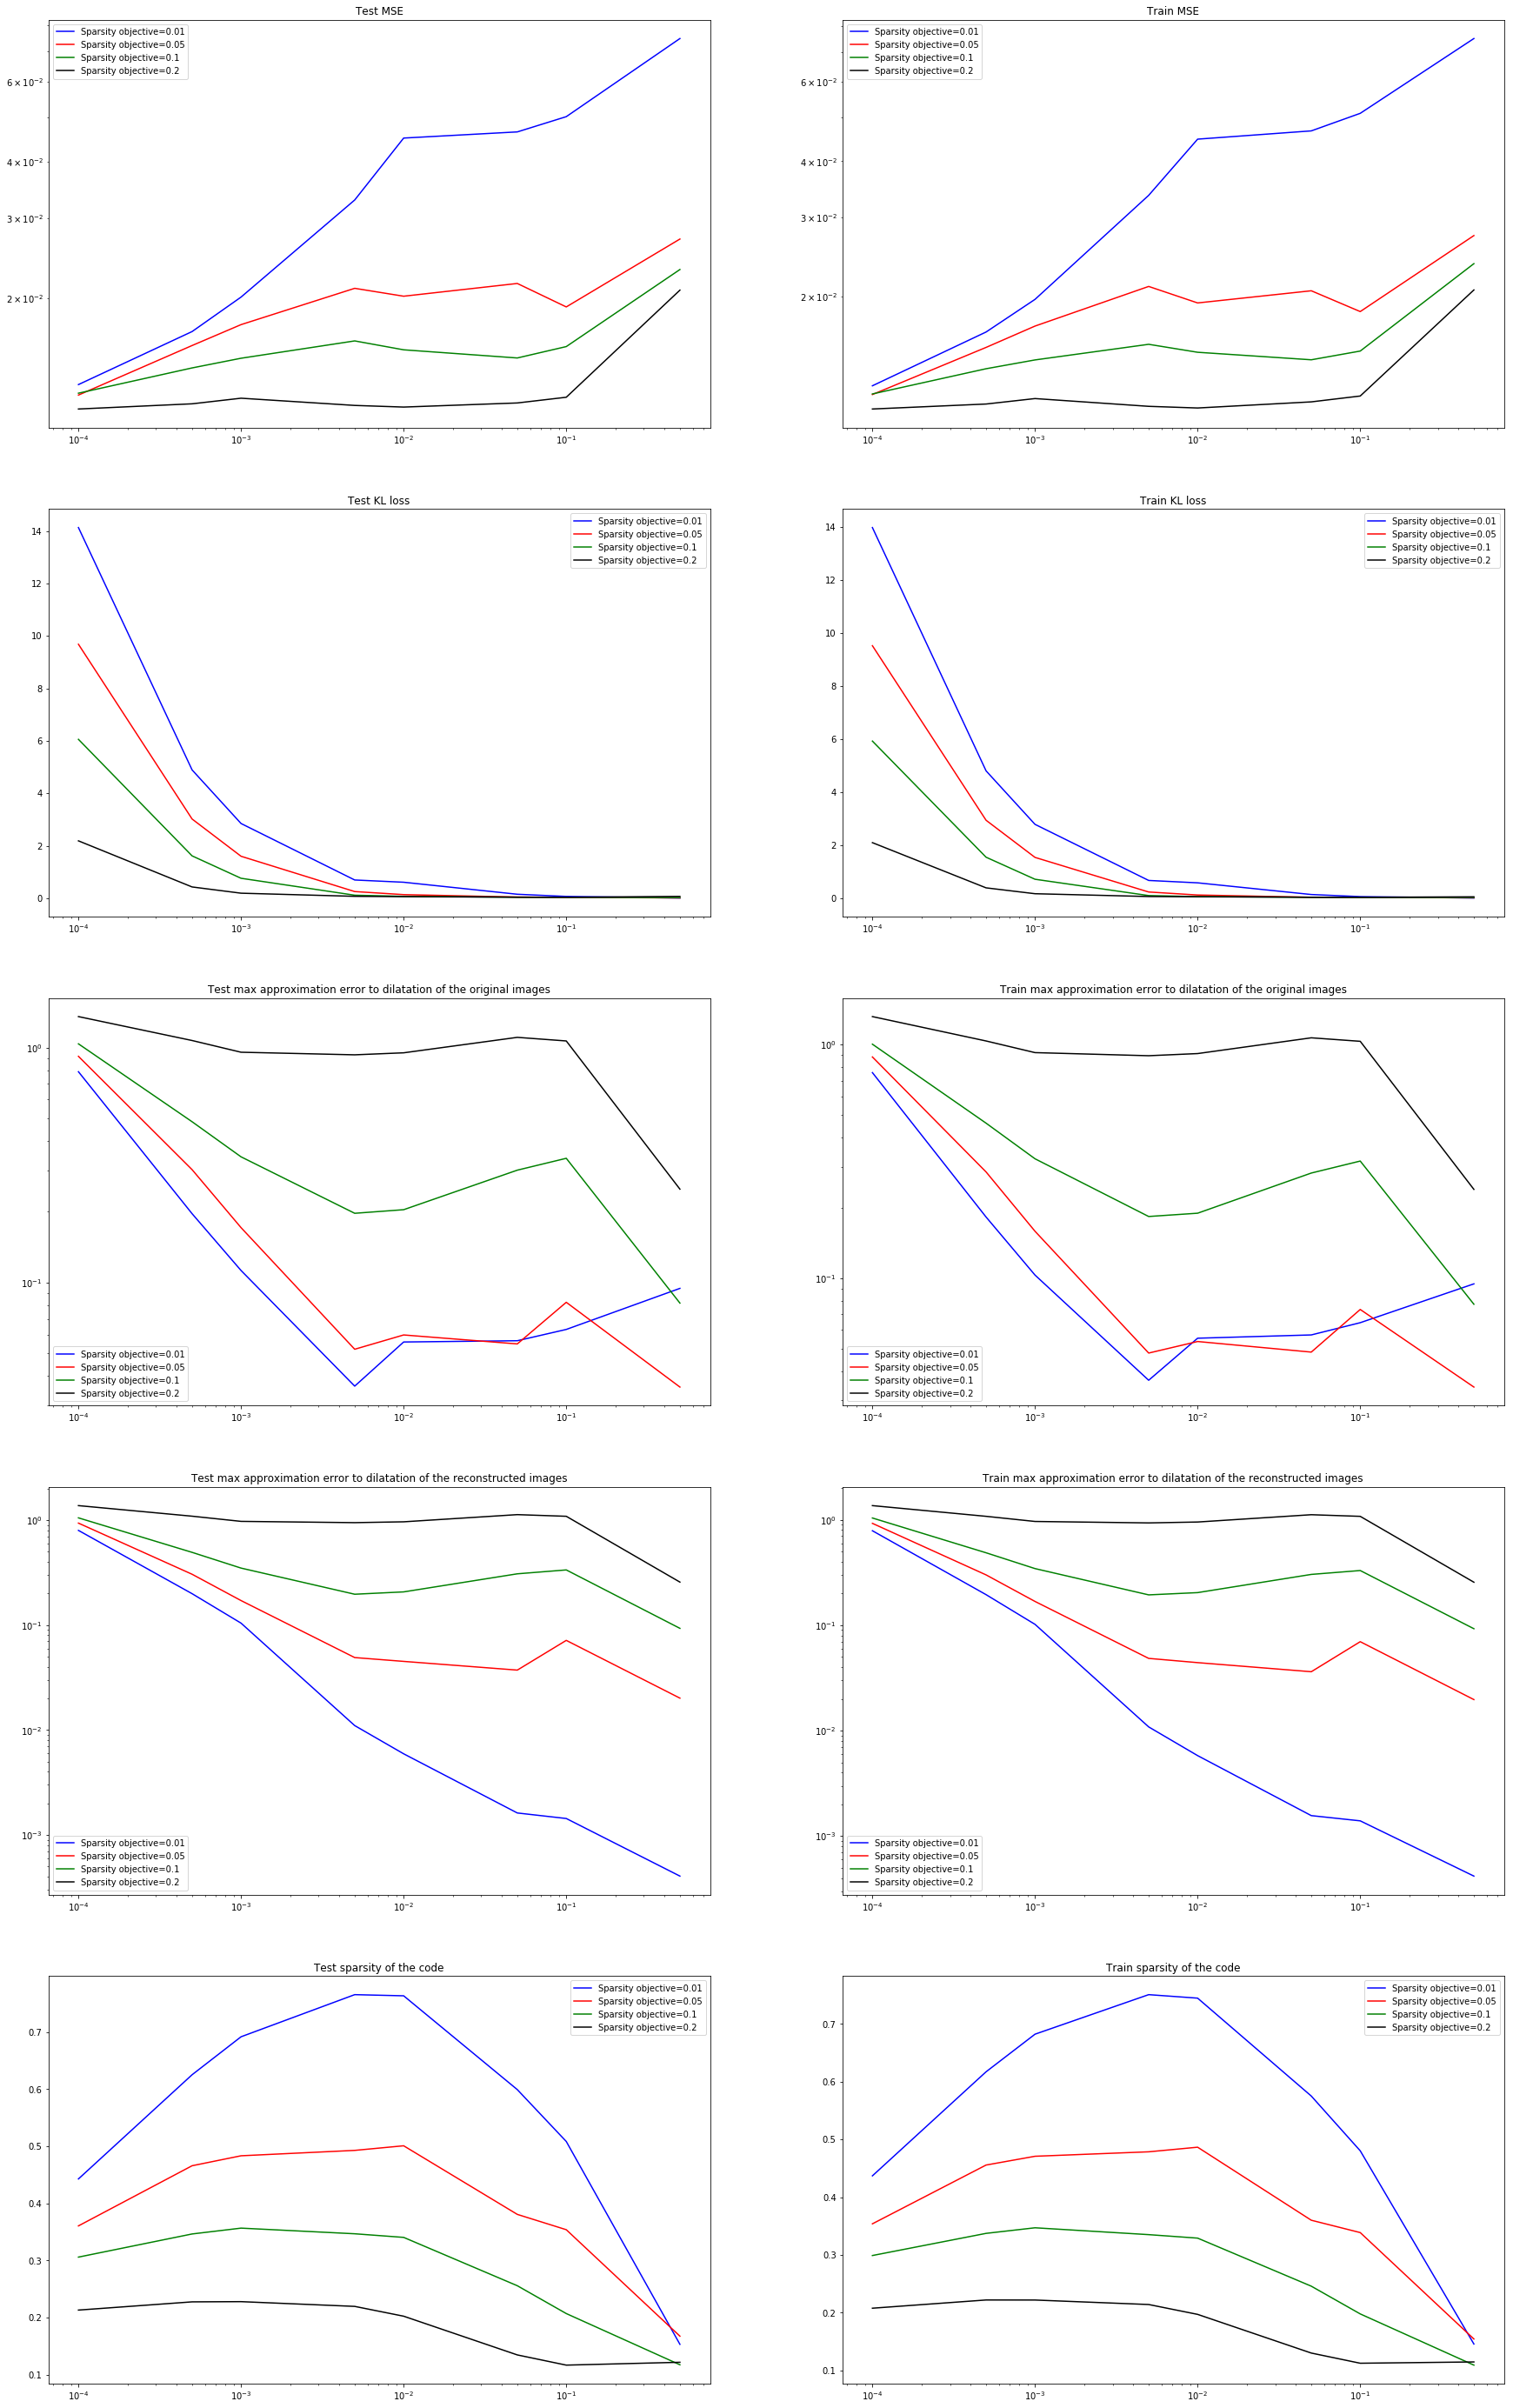

In [12]:
plt.figure(figsize=(30,50))

ax = plt.subplot(5, 2, 1)
ax.plot(sparsity_weights, test_mse[:,0], 'b')
ax.plot(sparsity_weights, test_mse[:,1], 'r')
ax.plot(sparsity_weights, test_mse[:,2], 'g')
ax.plot(sparsity_weights, test_mse[:,3], 'k')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Test MSE')

ax = plt.subplot(5, 2, 2)
ax.plot(sparsity_weights, train_mse[:,0], 'b')
ax.plot(sparsity_weights, train_mse[:,1], 'r')
ax.plot(sparsity_weights, train_mse[:,2], 'g')
ax.plot(sparsity_weights, train_mse[:,3], 'k')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Train MSE')

ax = plt.subplot(5, 2, 3)
ax.plot(sparsity_weights, test_kl_loss[:,0]/sparsity_weights, 'b')
ax.plot(sparsity_weights, test_kl_loss[:,1]/sparsity_weights, 'r')
ax.plot(sparsity_weights, test_kl_loss[:,2]/sparsity_weights, 'g')
ax.plot(sparsity_weights, test_kl_loss[:,3]/sparsity_weights, 'k')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Test KL loss')


ax = plt.subplot(5, 2, 4)
ax.plot(sparsity_weights, train_kl_loss[:,0]/sparsity_weights, 'b')
ax.plot(sparsity_weights, train_kl_loss[:,1]/sparsity_weights, 'r')
ax.plot(sparsity_weights, train_kl_loss[:,2]/sparsity_weights, 'g')
ax.plot(sparsity_weights, train_kl_loss[:,3]/sparsity_weights, 'k')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Train KL loss')

ax = plt.subplot(5, 2, 5)
ax.plot(sparsity_weights, test_max_approx_to_Original[:,0], 'b')
ax.plot(sparsity_weights, test_max_approx_to_Original[:,1], 'r')
ax.plot(sparsity_weights, test_max_approx_to_Original[:,2], 'g')
ax.plot(sparsity_weights, test_max_approx_to_Original[:,3], 'k')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Test max approximation error to dilatation of the original images')


ax = plt.subplot(5, 2, 6)
ax.plot(sparsity_weights, train_max_approx_to_Original[:,0], 'b')
ax.plot(sparsity_weights, train_max_approx_to_Original[:,1], 'r')
ax.plot(sparsity_weights, train_max_approx_to_Original[:,2], 'g')
ax.plot(sparsity_weights, train_max_approx_to_Original[:,3], 'k')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Train max approximation error to dilatation of the original images')


ax = plt.subplot(5, 2, 7)
ax.plot(sparsity_weights, test_max_approx_to_Rec[:,0], 'b')
ax.plot(sparsity_weights, test_max_approx_to_Rec[:,1], 'r')
ax.plot(sparsity_weights, test_max_approx_to_Rec[:,2], 'g')
ax.plot(sparsity_weights, test_max_approx_to_Rec[:,3], 'k')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Test max approximation error to dilatation of the reconstructed images')

ax = plt.subplot(5, 2, 8)
ax.plot(sparsity_weights, train_max_approx_to_Rec[:,0], 'b')
ax.plot(sparsity_weights, train_max_approx_to_Rec[:,1], 'r')
ax.plot(sparsity_weights, train_max_approx_to_Rec[:,2], 'g')
ax.plot(sparsity_weights, train_max_approx_to_Rec[:,3], 'k')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Train max approximation error to dilatation of the reconstructed images')


ax = plt.subplot(5, 2, 9)
ax.plot(sparsity_weights, test_sparsity[:,0], 'b')
ax.plot(sparsity_weights, test_sparsity[:,1], 'r')
ax.plot(sparsity_weights, test_sparsity[:,2], 'g')
ax.plot(sparsity_weights, test_sparsity[:,3], 'k')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Test sparsity of the code')


ax = plt.subplot(5, 2, 10)
ax.plot(sparsity_weights, train_sparsity[:,0], 'b')
ax.plot(sparsity_weights, train_sparsity[:,1], 'r')
ax.plot(sparsity_weights, train_sparsity[:,2], 'g')
ax.plot(sparsity_weights, train_sparsity[:,3], 'k')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Train sparsity of the code')

plt.show()

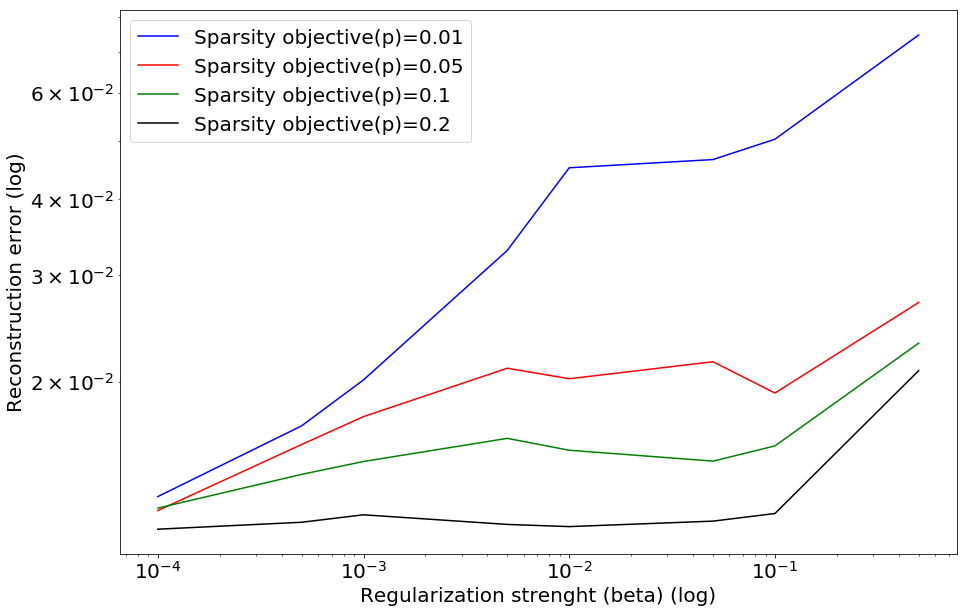

In [13]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20
plt.figure(figsize=(15,10))
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.plot(sparsity_weights, test_mse[:,0], 'b')
plt.plot(sparsity_weights, test_mse[:,1], 'r')
plt.plot(sparsity_weights, test_mse[:,2], 'g')
plt.plot(sparsity_weights, test_mse[:,3], 'k')
plt.xscale('log')
plt.yscale('log')
plt.legend(['Sparsity objective(p)=0.01', 'Sparsity objective(p)=0.05', 'Sparsity objective(p)=0.1', 'Sparsity objective(p)=0.2'])
plt.ylabel('Reconstruction error (log)')
plt.xlabel('Regularization strenght (beta) (log)')
plt.show()

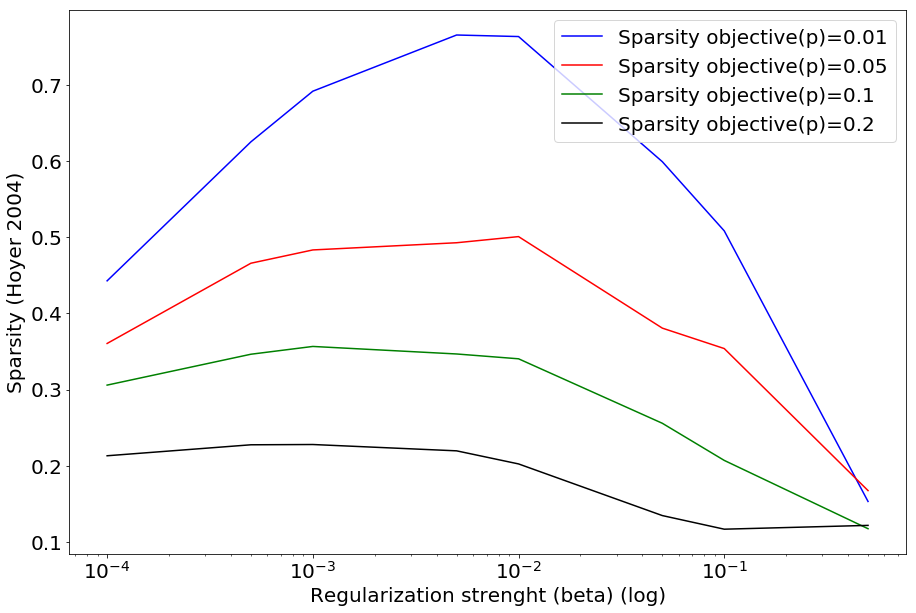

In [14]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20
plt.figure(figsize=(15,10))
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.plot(sparsity_weights, test_sparsity[:,0], 'b')
plt.plot(sparsity_weights, test_sparsity[:,1], 'r')
plt.plot(sparsity_weights, test_sparsity[:,2], 'g')
plt.plot(sparsity_weights, test_sparsity[:,3], 'k')
plt.xscale('log')
plt.legend(['Sparsity objective(p)=0.01', 'Sparsity objective(p)=0.05', 'Sparsity objective(p)=0.1', 'Sparsity objective(p)=0.2'])
plt.ylabel('Sparsity (Hoyer 2004)')
plt.xlabel('Regularization strenght (beta) (log)')
plt.show()

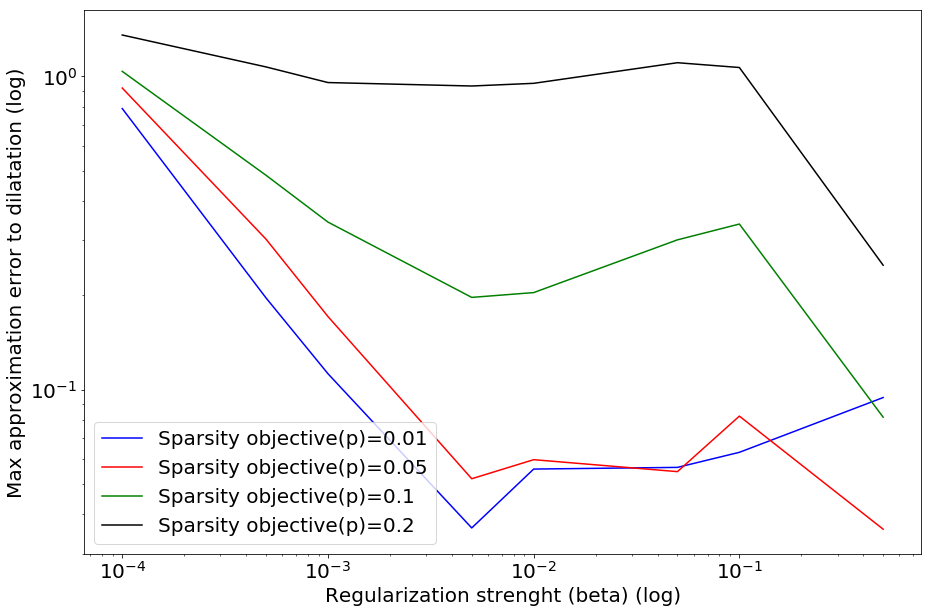

In [15]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20
plt.figure(figsize=(15,10))
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.plot(sparsity_weights, test_max_approx_to_Original[:,0], 'b')
plt.plot(sparsity_weights, test_max_approx_to_Original[:,1], 'r')
plt.plot(sparsity_weights, test_max_approx_to_Original[:,2], 'g')
plt.plot(sparsity_weights, test_max_approx_to_Original[:,3], 'k')
plt.xscale('log')
plt.yscale('log')
plt.legend(['Sparsity objective(p)=0.01', 'Sparsity objective(p)=0.05', 'Sparsity objective(p)=0.1', 'Sparsity objective(p)=0.2'])
plt.ylabel('Max approximation error to dilatation (log)')
plt.xlabel('Regularization strenght (beta) (log)')
plt.show()

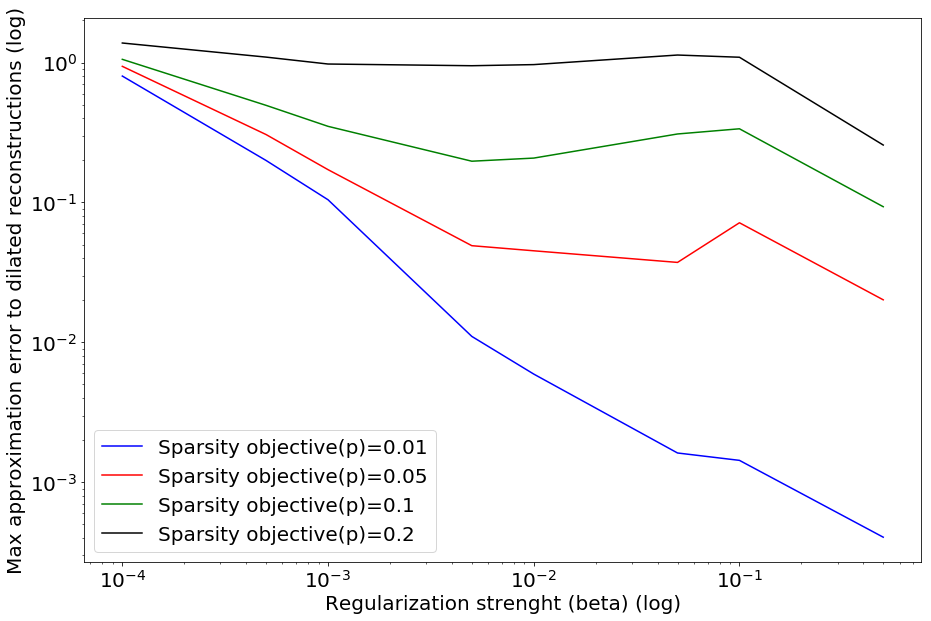

In [16]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20
plt.figure(figsize=(15,10))
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.plot(sparsity_weights, test_max_approx_to_Rec[:,0], 'b')
plt.plot(sparsity_weights, test_max_approx_to_Rec[:,1], 'r')
plt.plot(sparsity_weights, test_max_approx_to_Rec[:,2], 'g')
plt.plot(sparsity_weights, test_max_approx_to_Rec[:,3], 'k')
plt.xscale('log')
plt.yscale('log')
plt.legend(['Sparsity objective(p)=0.01', 'Sparsity objective(p)=0.05', 'Sparsity objective(p)=0.1', 'Sparsity objective(p)=0.2'])
plt.ylabel('Max approximation error to dilated reconstructions (log)')
plt.xlabel('Regularization strenght (beta) (log)')
plt.show()

# 1. Sparsity_Objective = 0.01

## 1.1 Sparsity_weight = 0.0001 (sp_o = 0.01)

Original images and reconstructions - Reconstruction error:  0.012925624704360962


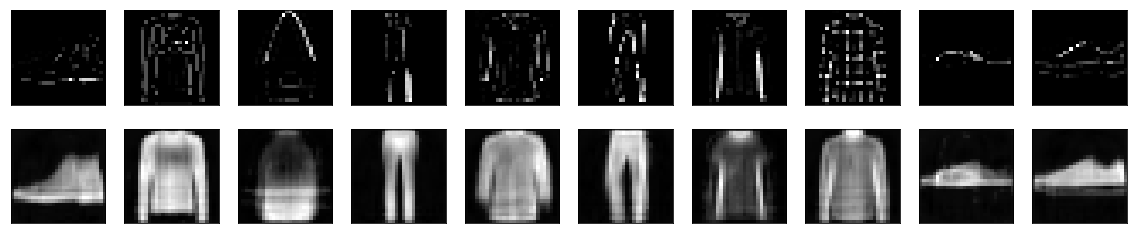

Histograms of the encodings - Sparsity (Hoyer):  0.4428093135356903


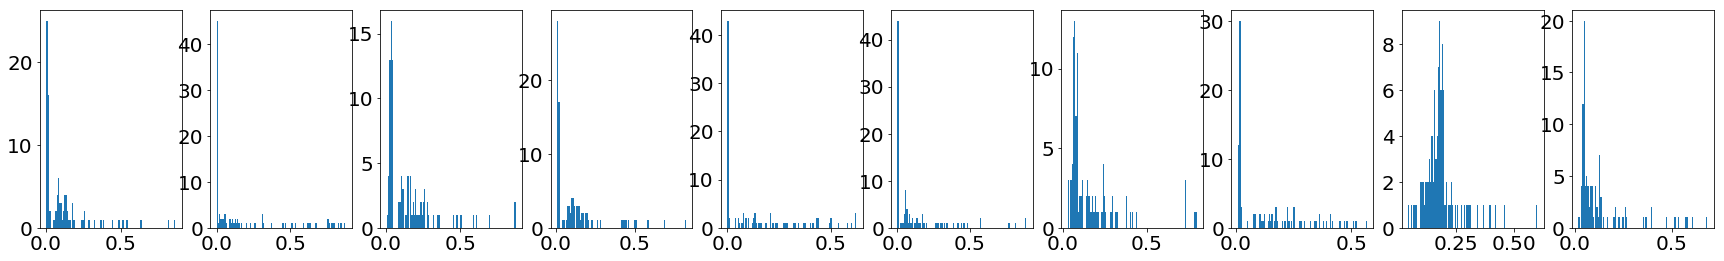

Atom images of the decoder


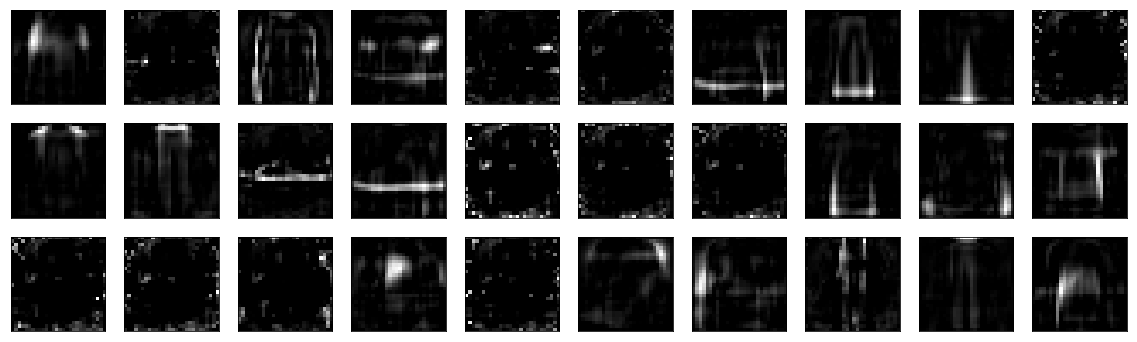

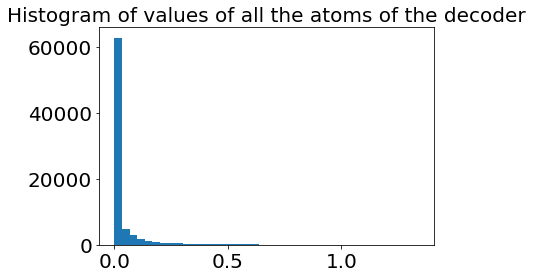

In [20]:
i = np.arange(8)[sparsity_weights==0.0001][0]
j = np.arange(4)[sparsity_objectives==0.01][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_09_dim100_KLdivSum_0.0001_0.01_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO_NoOriginals/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


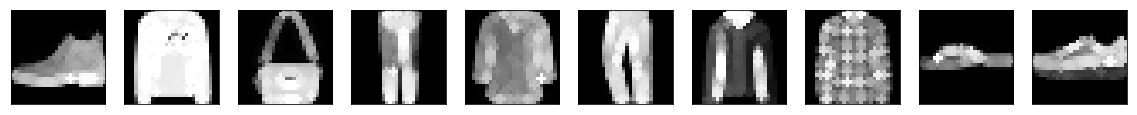

Dilatation of the reconstructions


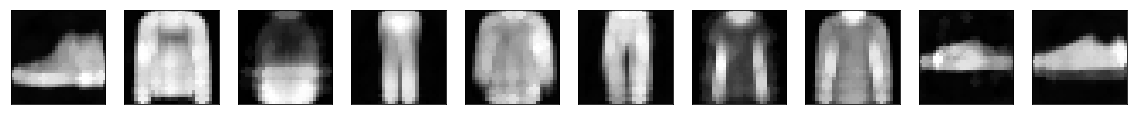

Original images and max-approximation to dilatation
Max-approx error to original:  0.7887392372131348  - Max-approx error to reconstruction:  0.8003366752624512


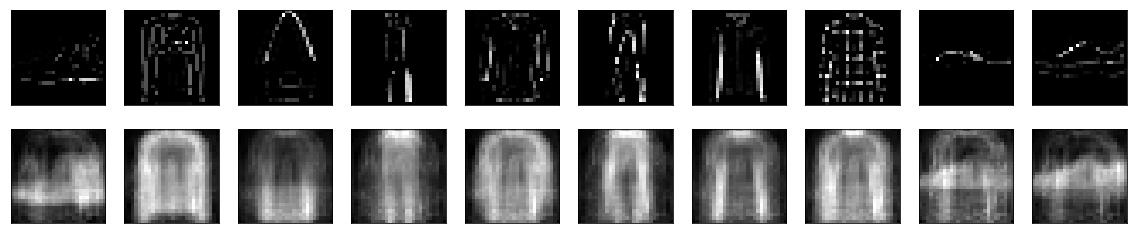

Dilated of the atom images of the decoder


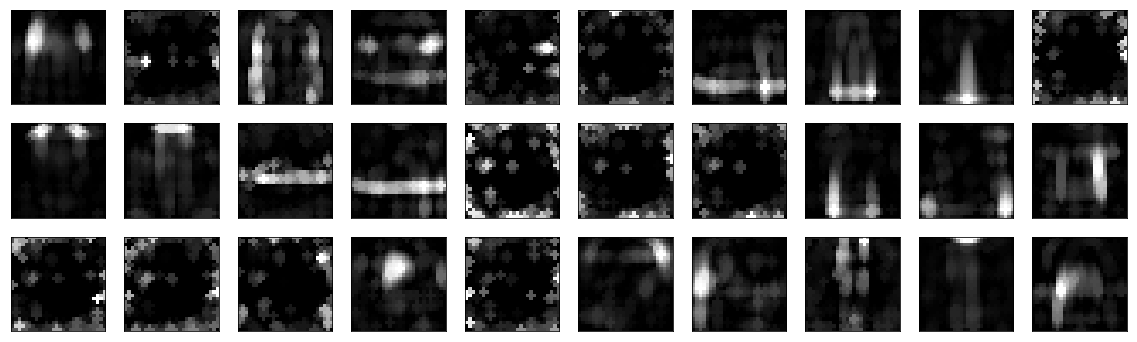

In [21]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 1.2 Sparsity_weight = 0.0005 (sp_o = 0.01)

Original images and reconstructions - Reconstruction error:  0.016910483035445213


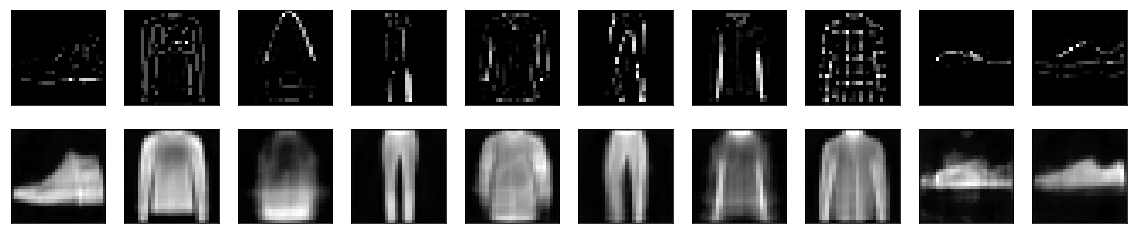

Histograms of the encodings - Sparsity (Hoyer):  0.6254060864448547


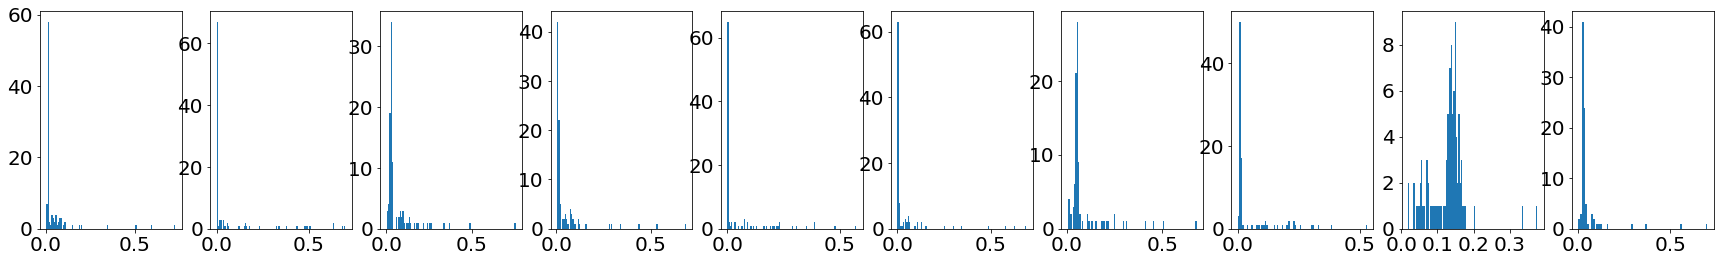

Atom images of the decoder


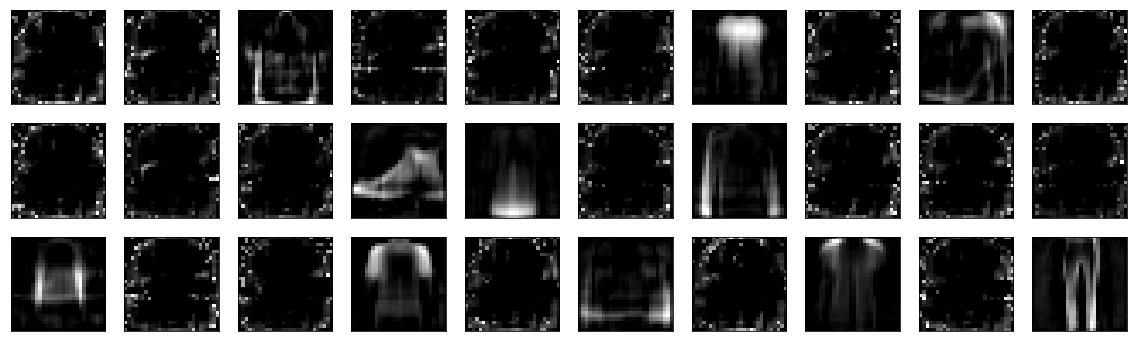

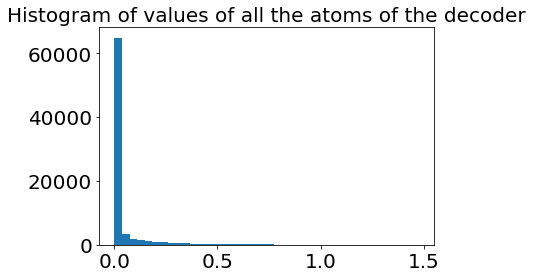

In [22]:
sp_o = 0.01
sp_w = 0.0005
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_09_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO_NoOriginals/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


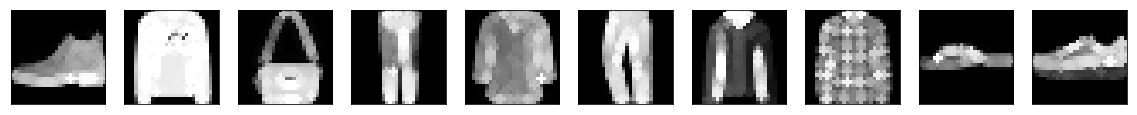

Dilatation of the reconstructions


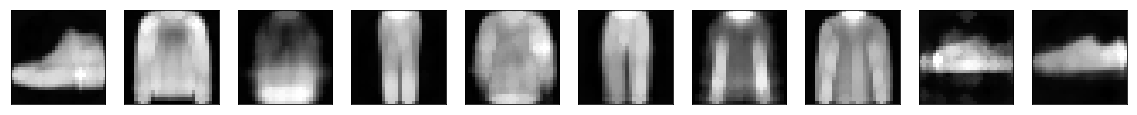

Original images and max-approximation to dilatation
Max-approx error to original:  0.19625582559108734  - Max-approx error to reconstruction:  0.199483713555336


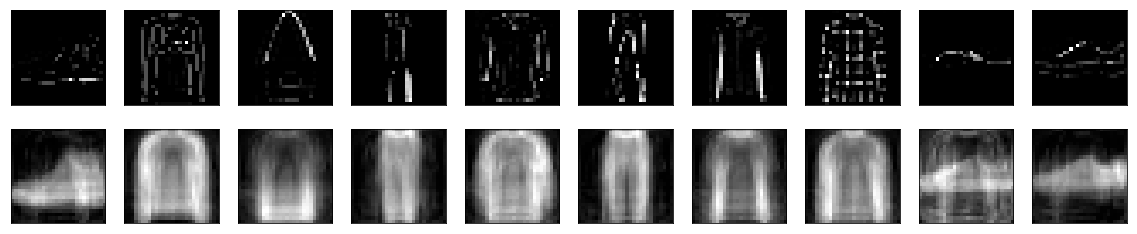

Dilated of the atom images of the decoder


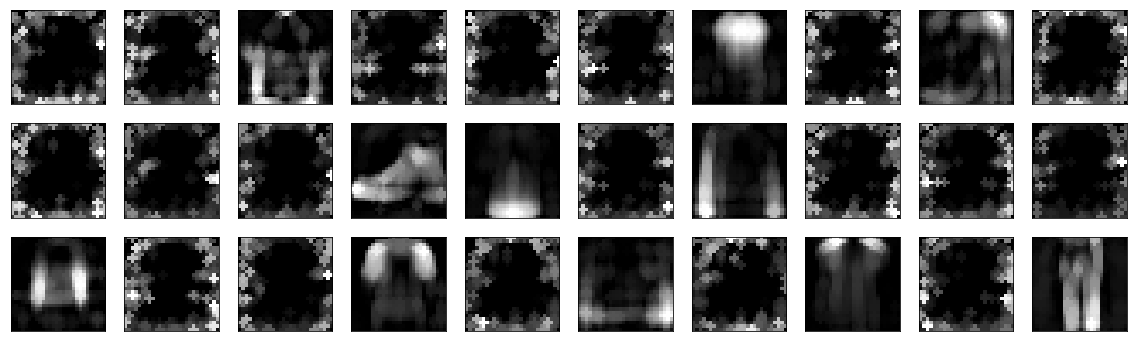

In [23]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 1.3 Sparsity_weight = 0.001 (sp_o = 0.01)

Original images and reconstructions - Reconstruction error:  0.02013721327483654


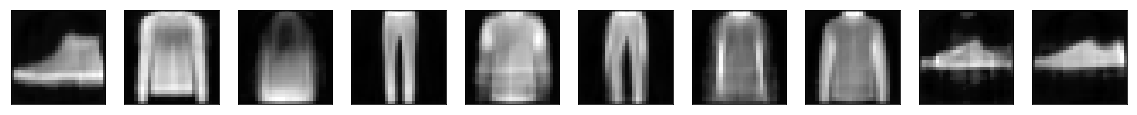

Histograms of the encodings - Sparsity (Hoyer):  0.691941499710083


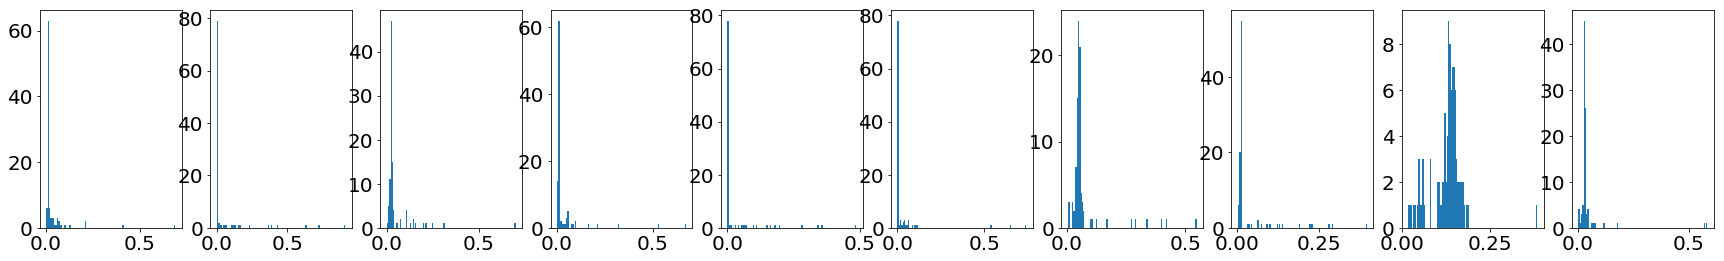

Atom images of the decoder


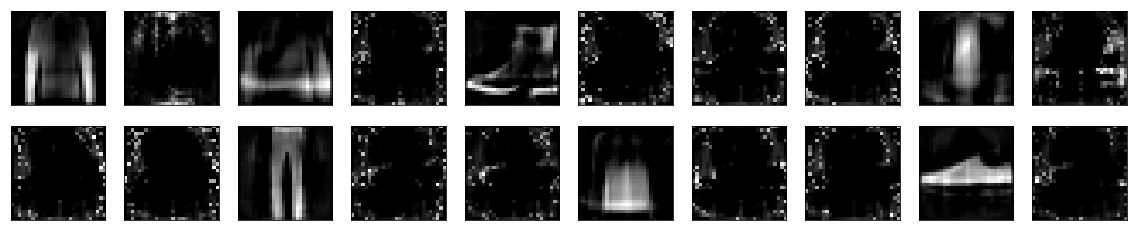

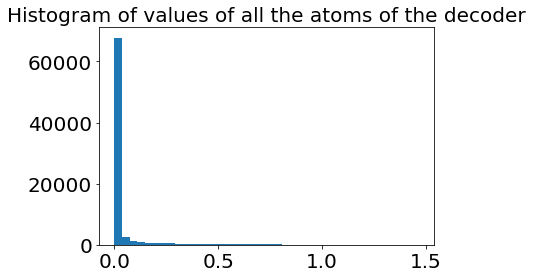

In [27]:
sp_o = 0.01
sp_w = 0.001
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_09_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO_NoOriginals/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO, plot_input=False)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=20)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


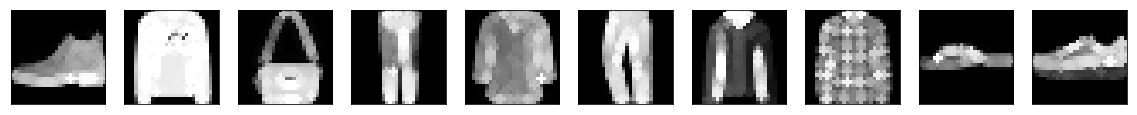

Dilatation of the reconstructions


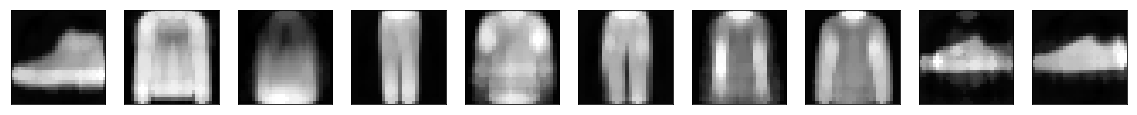

Original images and max-approximation to dilatation
Max-approx error to original:  0.11249939583539963  - Max-approx error to reconstruction:  0.10452381011247634


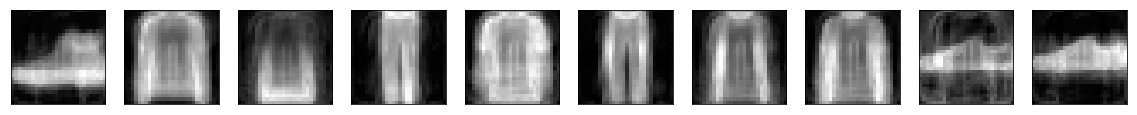

Dilated of the atom images of the decoder


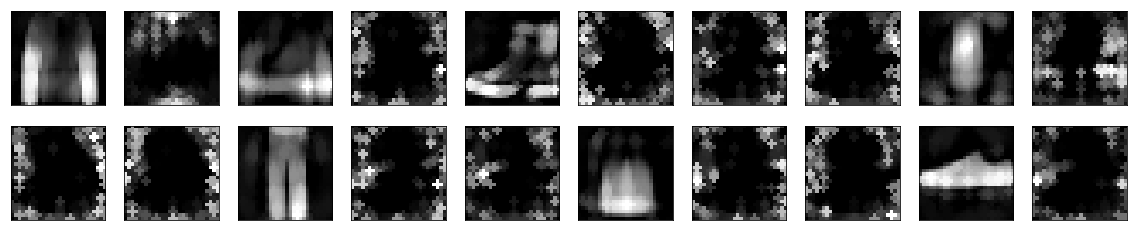

In [28]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO, plot_input=False)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=20)

## 1.4 Sparsity_weight = 0.005 (sp_o = 0.01)

Original images and reconstructions - Reconstruction error:  0.032937309765815735


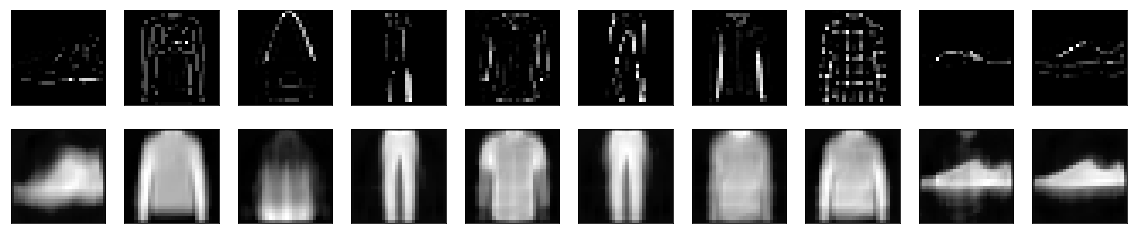

Histograms of the encodings - Sparsity (Hoyer):  0.7657609581947327


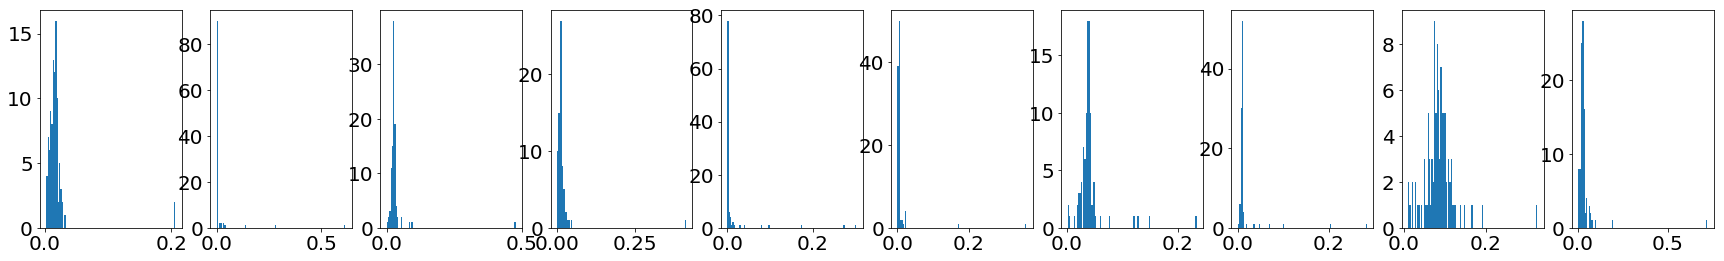

Atom images of the decoder


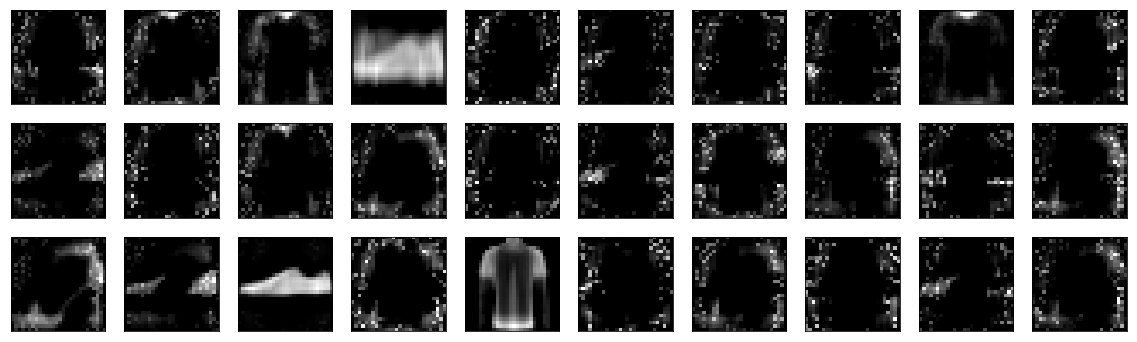

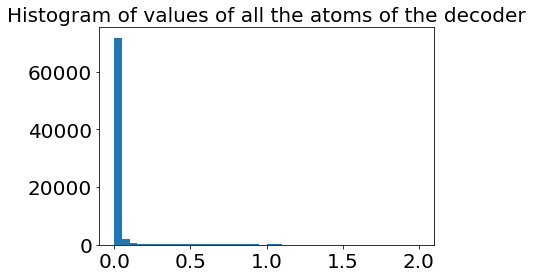

In [29]:
sp_o = 0.01
sp_w = 0.005
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_09_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO_NoOriginals/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


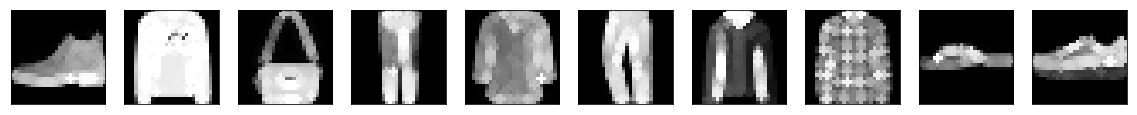

Dilatation of the reconstructions


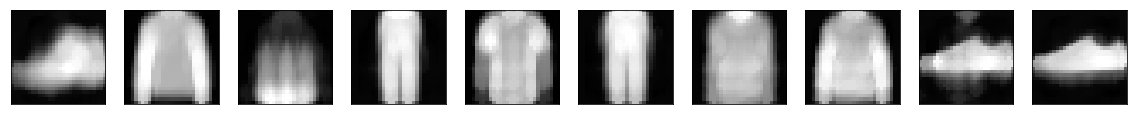

Original images and max-approximation to dilatation
Max-approx error to original:  0.036238448476791384  - Max-approx error to reconstruction:  0.011031158398091793


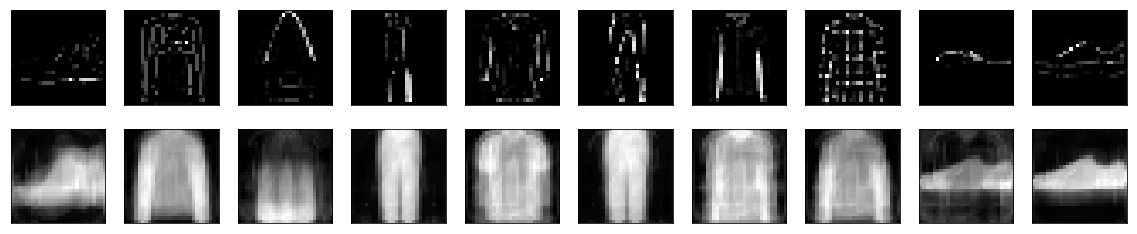

Dilated of the atom images of the decoder


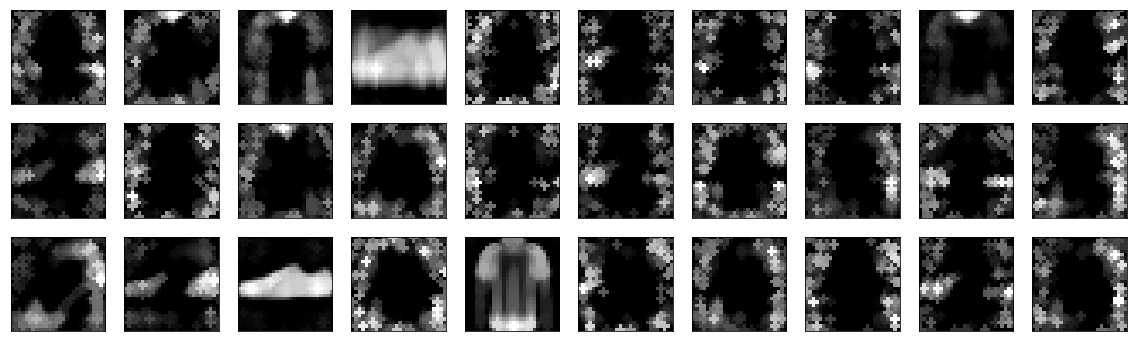

In [30]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 1.5 Sparsity_weight = 0.01 (sp_o = 0.01)

Original images and reconstructions - Reconstruction error:  0.045078334444761274


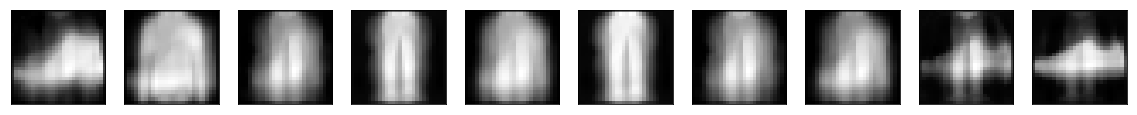

Histograms of the encodings - Sparsity (Hoyer):  0.7637394666671753


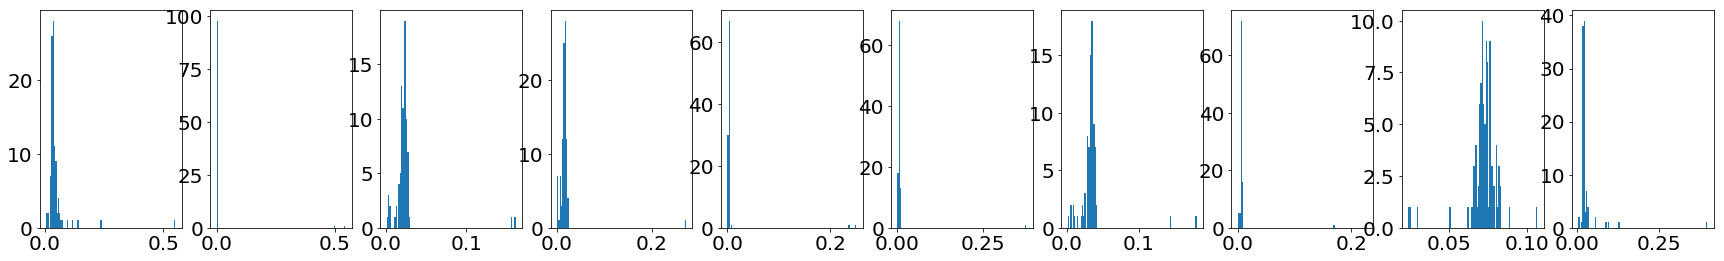

Atom images of the decoder


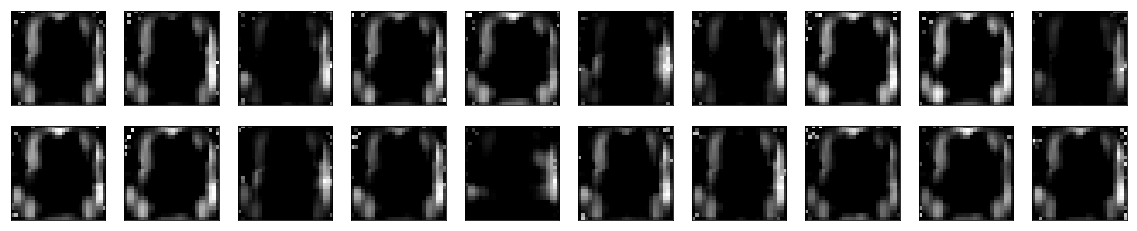

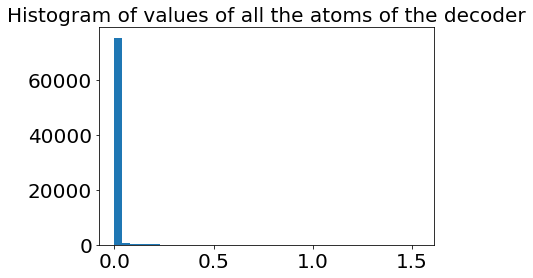

In [31]:
sp_o = 0.01
sp_w = 0.01
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_09_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO_NoOriginals/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO, plot_input=False)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=20)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


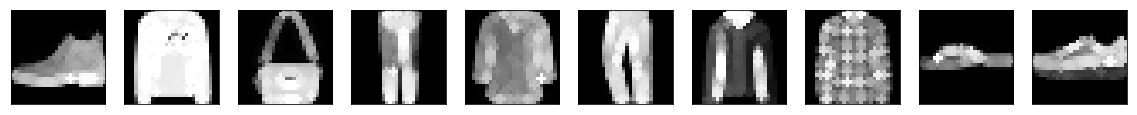

Dilatation of the reconstructions


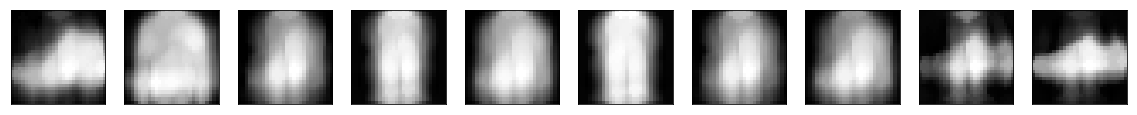

Original images and max-approximation to dilatation
Max-approx error to original:  0.05584102714061737  - Max-approx error to reconstruction:  0.005936387229710818


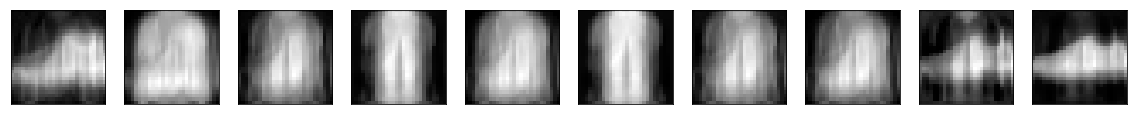

Dilated of the atom images of the decoder


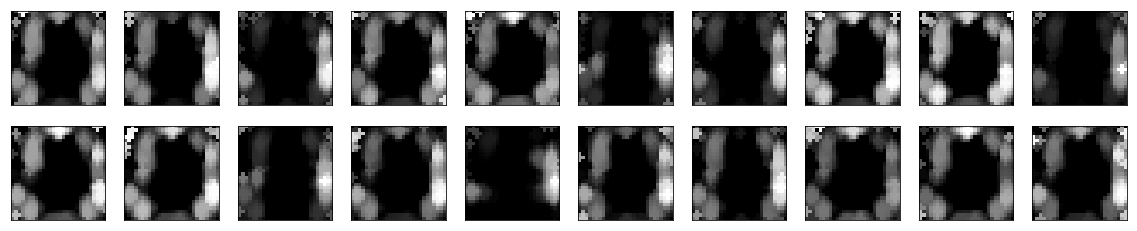

In [32]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO, plot_input=False)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=20)

## 1.6 Sparsity_weight = 0.05 (sp_o = 0.01)

Original images and reconstructions - Reconstruction error:  0.046508506554365156


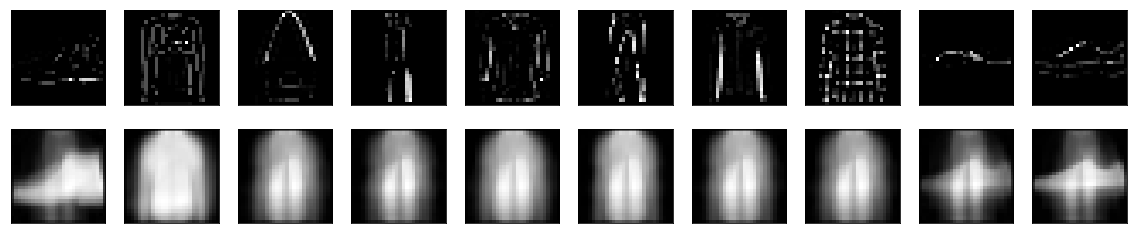

Histograms of the encodings - Sparsity (Hoyer):  0.5993359088897705


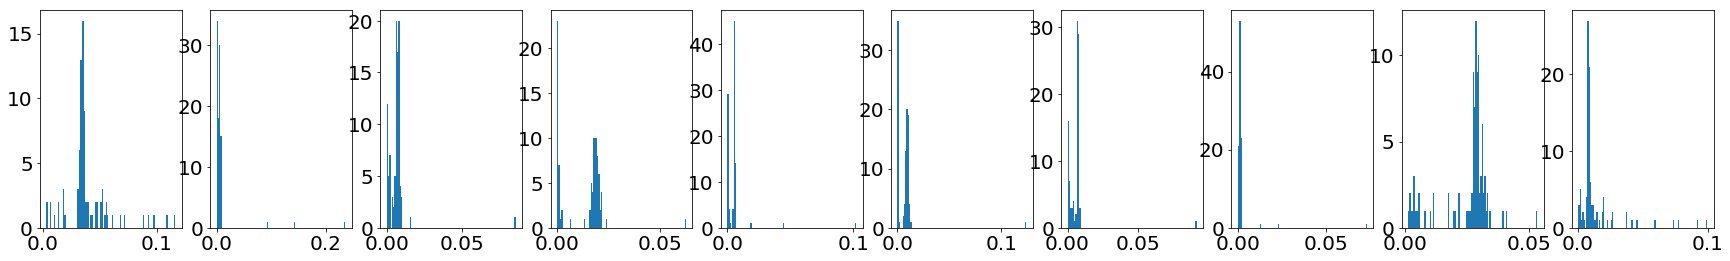

Atom images of the decoder


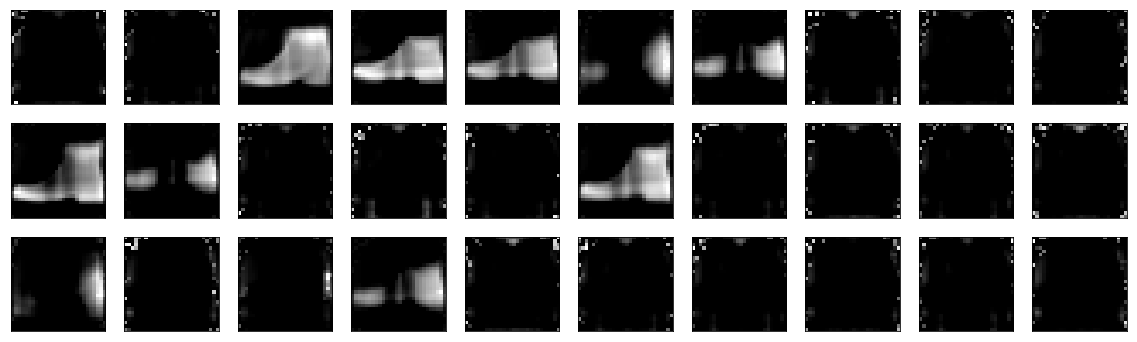

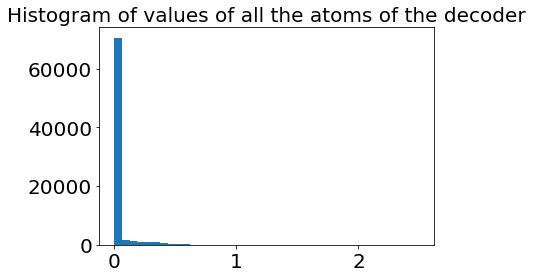

In [34]:
sp_o = 0.01
sp_w = 0.05
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_10_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO_NoOriginals/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


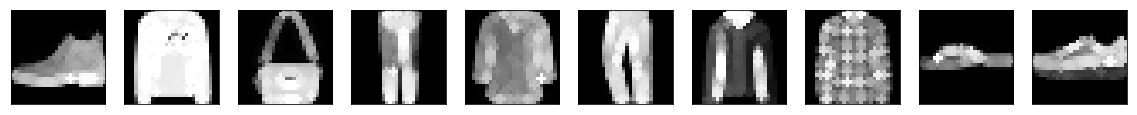

Dilatation of the reconstructions


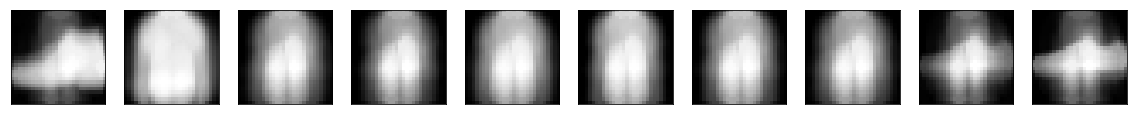

Original images and max-approximation to dilatation
Max-approx error to original:  0.05653683798313141  - Max-approx error to reconstruction:  0.0016199857315048576


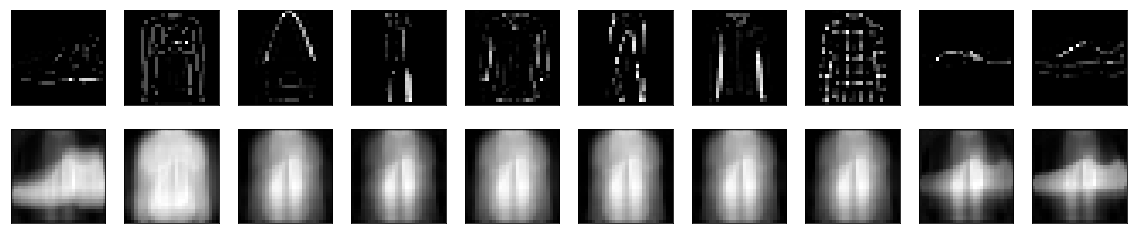

Dilated of the atom images of the decoder


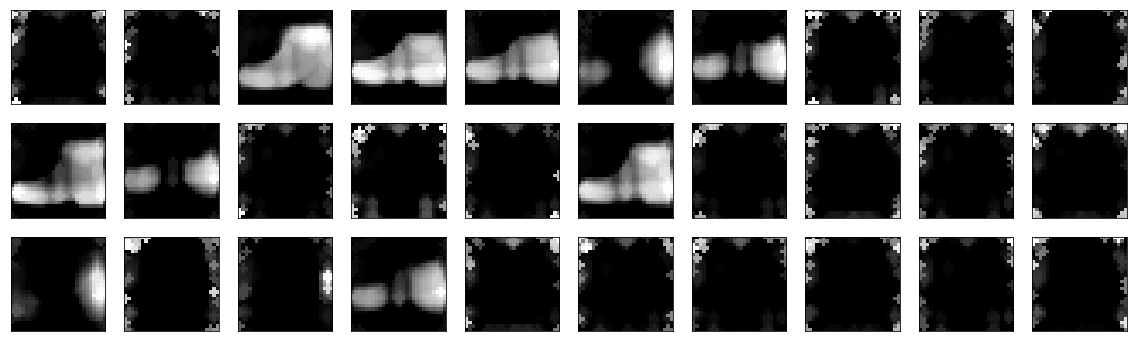

In [35]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 1.7 Sparsity_weight = 0.1 (sp_o = 0.01)

Original images and reconstructions - Reconstruction error:  0.05024350061416626


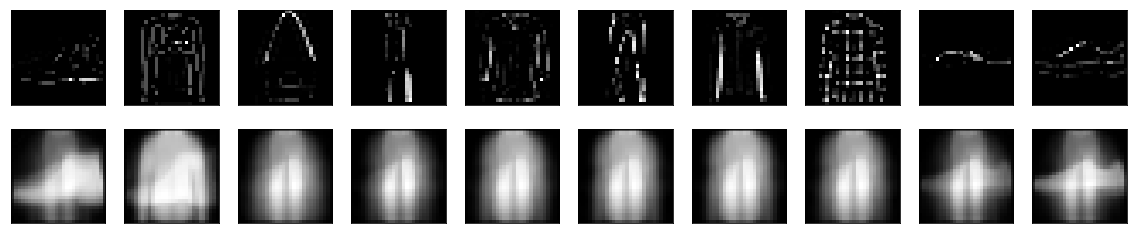

Histograms of the encodings - Sparsity (Hoyer):  0.5084545016288757


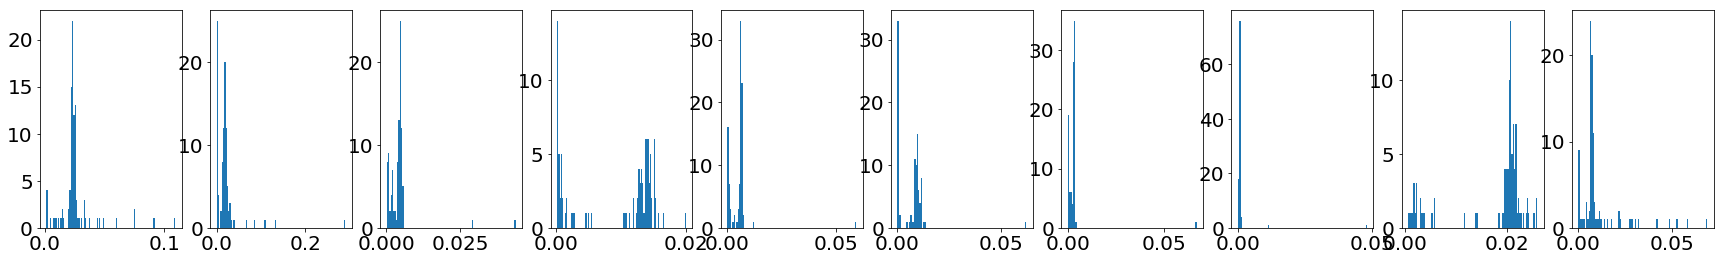

Atom images of the decoder


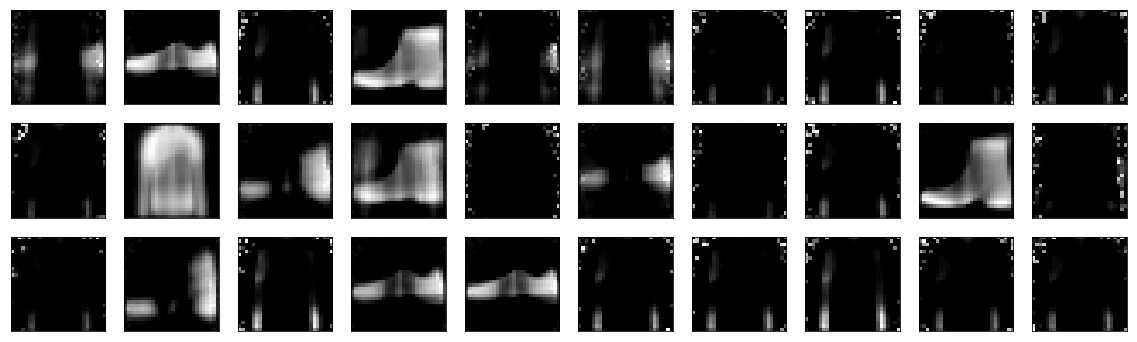

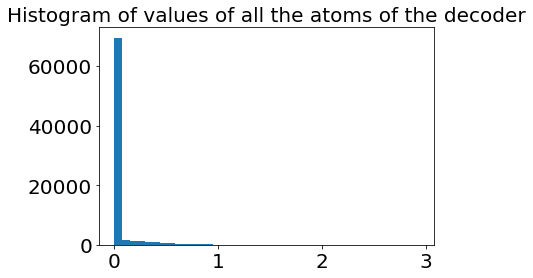

In [36]:
sp_o = 0.01
sp_w = 0.1
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_10_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO_NoOriginals/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


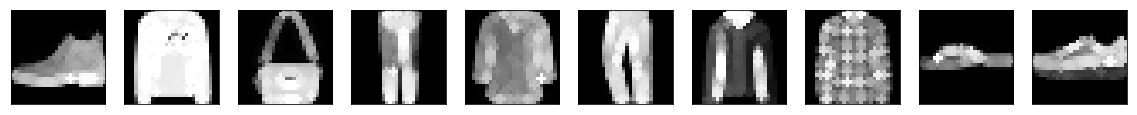

Dilatation of the reconstructions


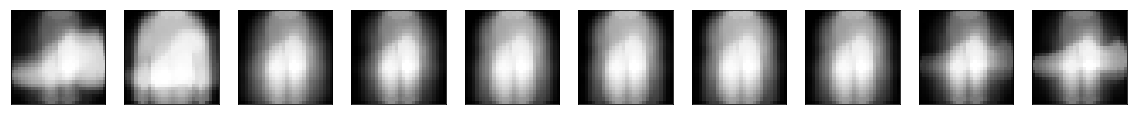

Original images and max-approximation to dilatation
Max-approx error to original:  0.06315150640010833  - Max-approx error to reconstruction:  0.0014347649136558175


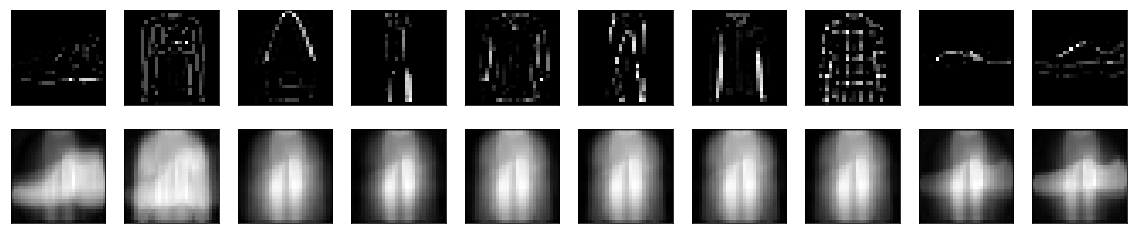

Dilated of the atom images of the decoder


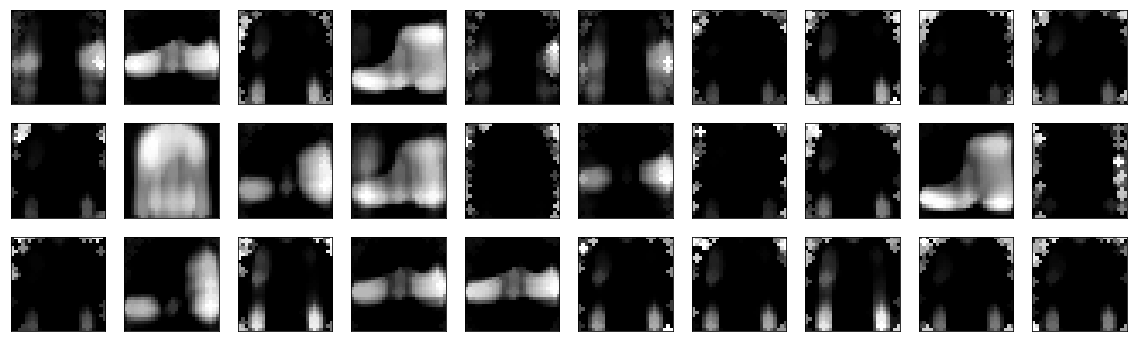

In [37]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 1.8 Sparsity_weight = 0.5 (sp_o = 0.01)

Original images and reconstructions - Reconstruction error:  0.07465011274814606


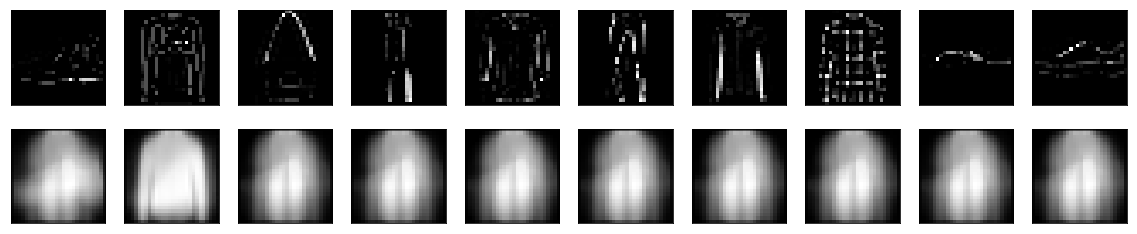

Histograms of the encodings - Sparsity (Hoyer):  0.15294943749904633


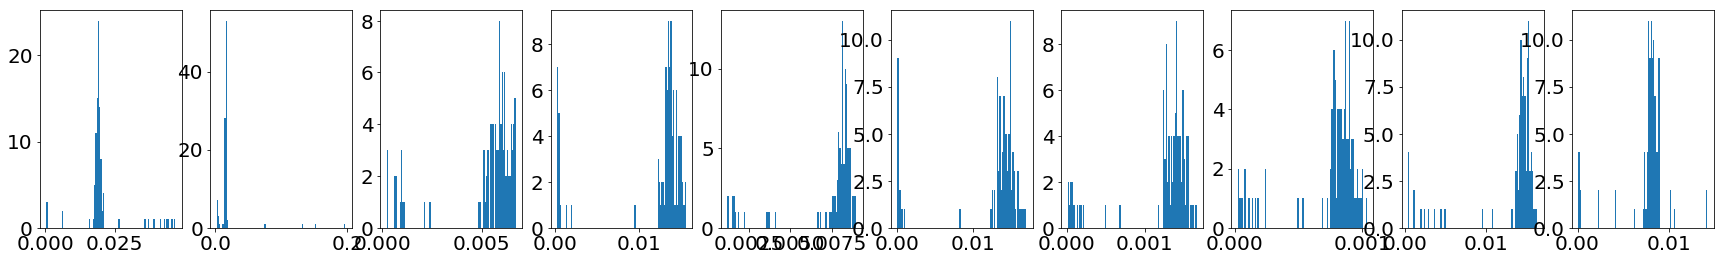

Atom images of the decoder


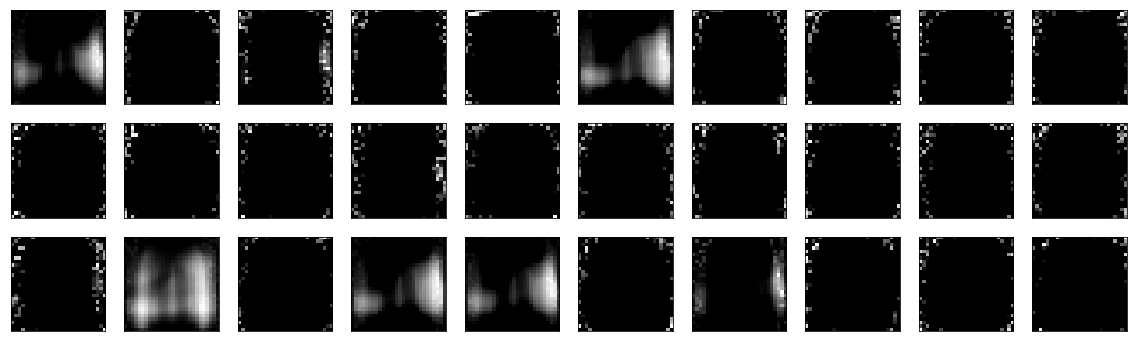

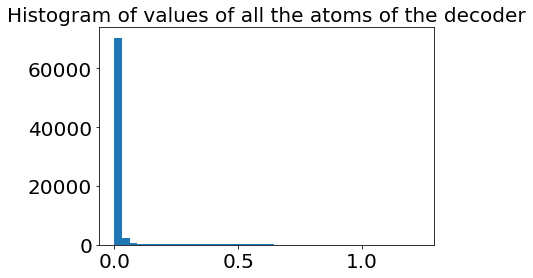

In [38]:
sp_o = 0.01
sp_w = 0.5
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_10_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO_NoOriginals/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


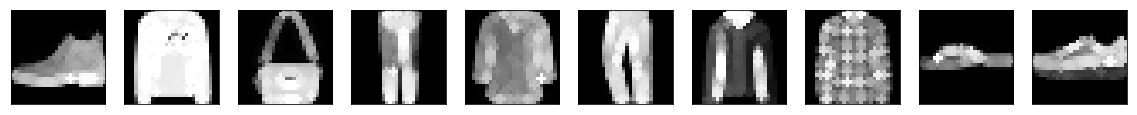

Dilatation of the reconstructions


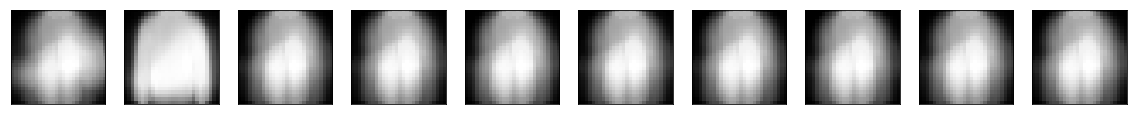

Original images and max-approximation to dilatation
Max-approx error to original:  0.09442890914678574  - Max-approx error to reconstruction:  0.00040524757415987553


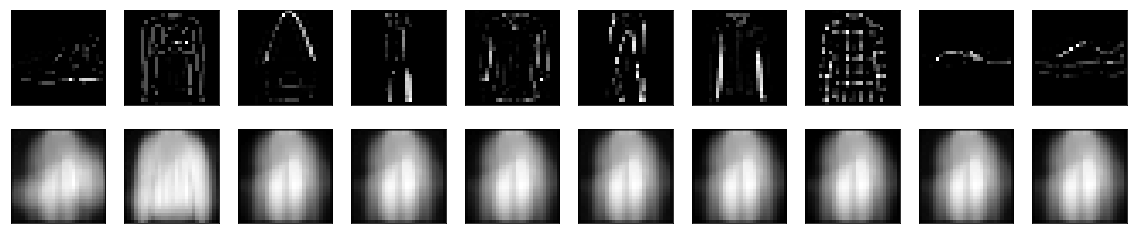

Dilated of the atom images of the decoder


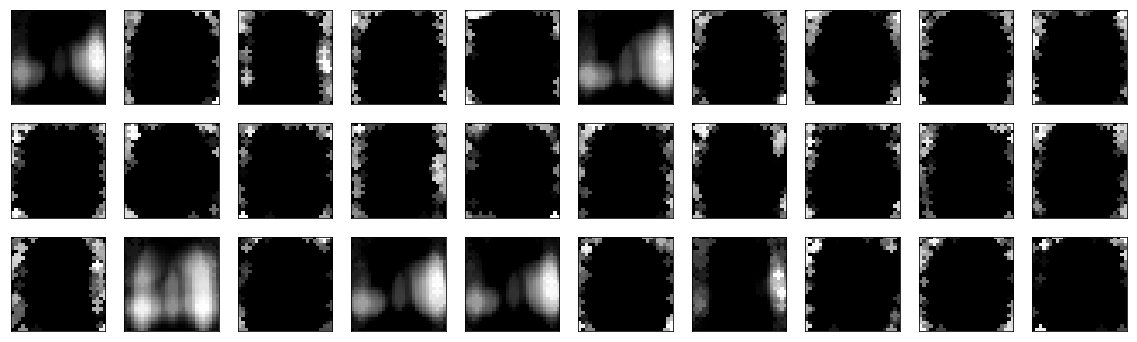

In [39]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

# 2. Sparsity_Objective = 0.05

## 2.1 Sparsity_weight = 0.0001 (sp_o = 0.05)

Original images and reconstructions - Reconstruction error:  0.01225579574406147


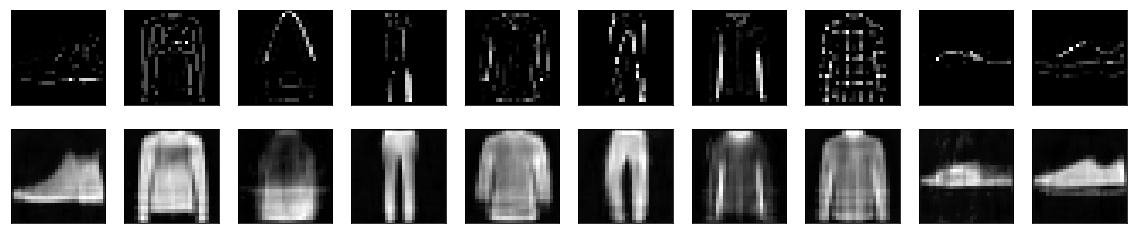

Histograms of the encodings - Sparsity (Hoyer):  0.360523521900177


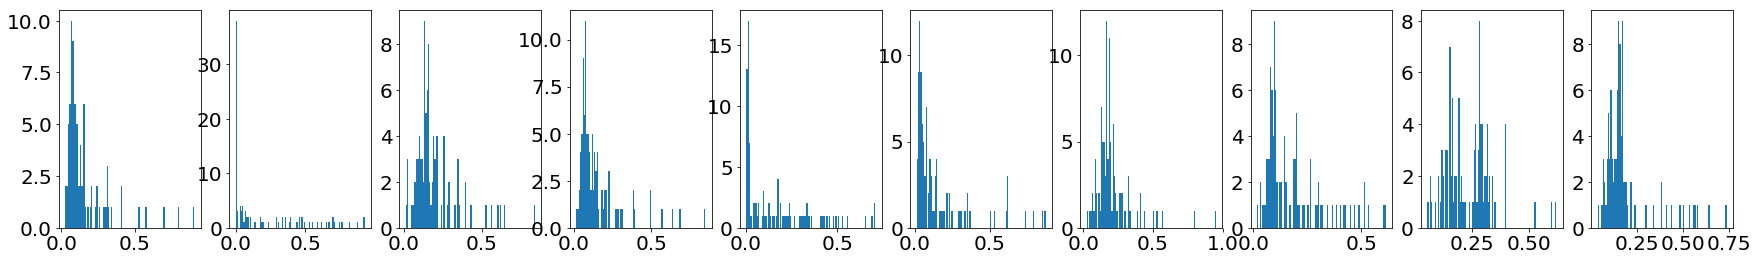

Atom images of the decoder


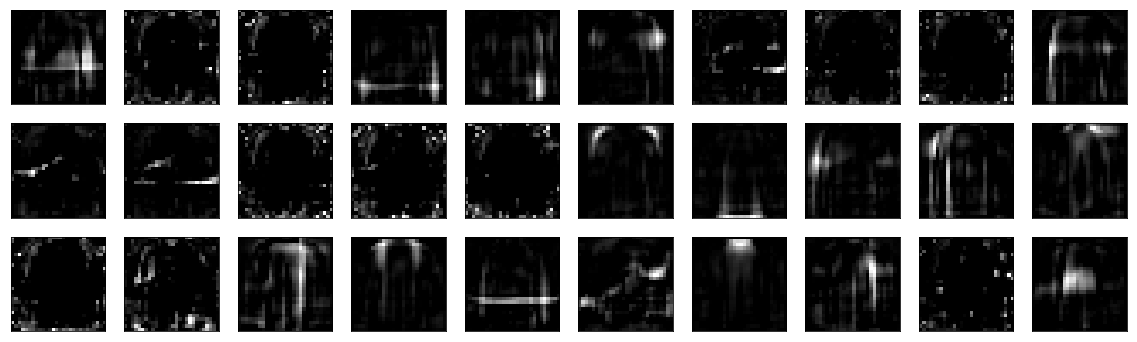

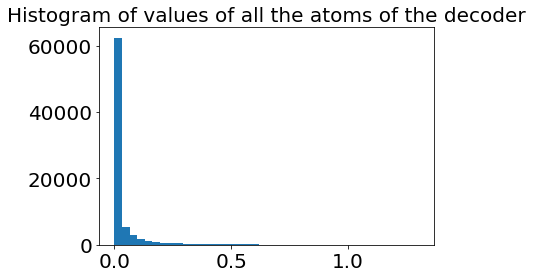

In [40]:
sp_o = 0.05
sp_w = 0.0001
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_09_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO_NoOriginals/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


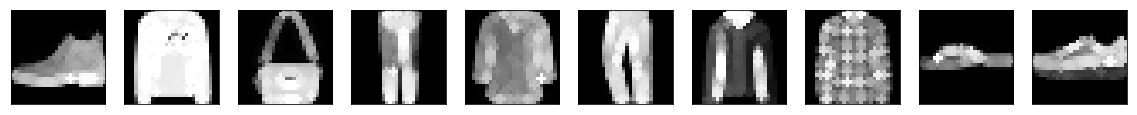

Dilatation of the reconstructions


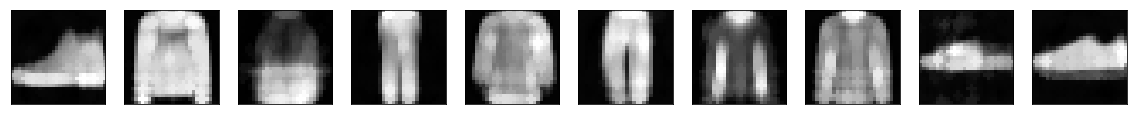

Original images and max-approximation to dilatation
Max-approx error to original:  0.9170534726142884  - Max-approx error to reconstruction:  0.9392055911064148


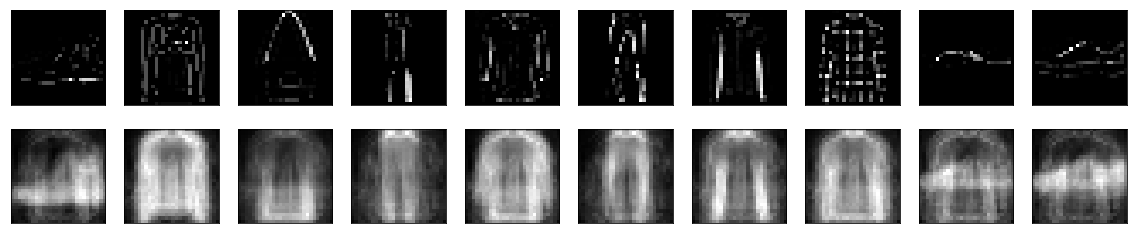

Dilated of the atom images of the decoder


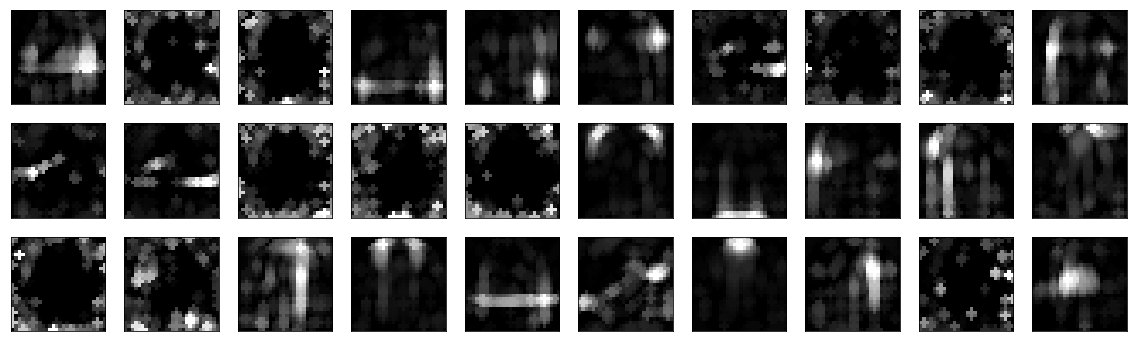

In [41]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 2.2 Sparsity_weight = 0.0005 (sp_o = 0.05)

Original images and reconstructions - Reconstruction error:  0.01575476862192154


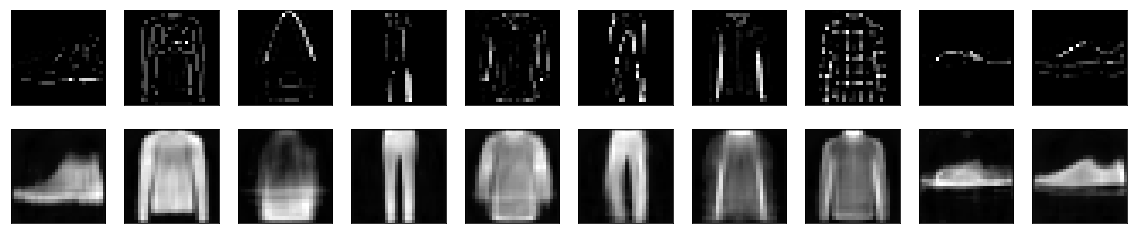

Histograms of the encodings - Sparsity (Hoyer):  0.46593672037124634


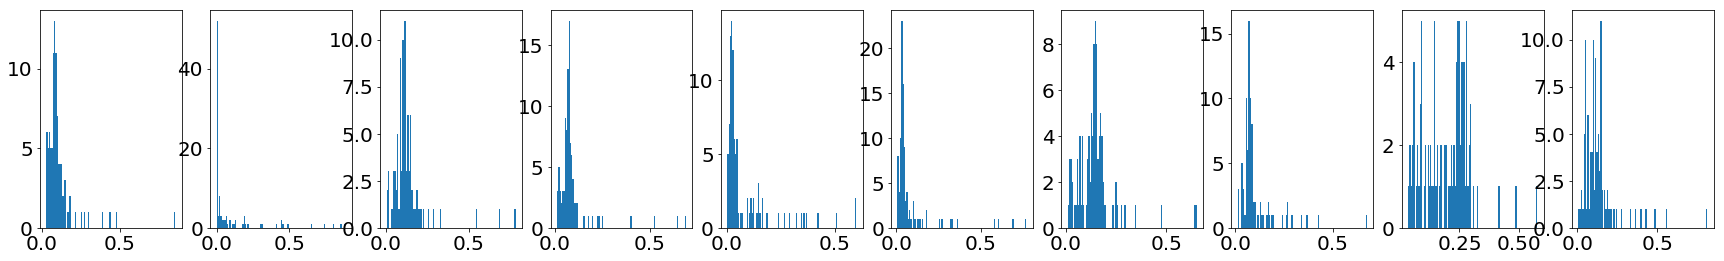

Atom images of the decoder


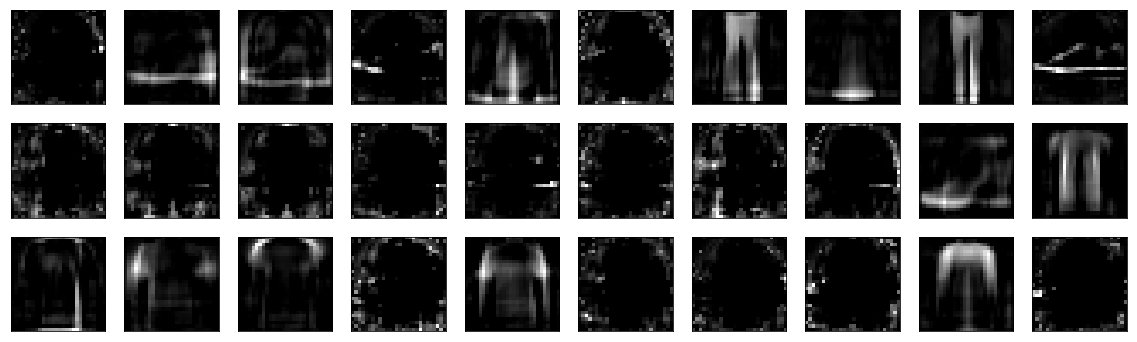

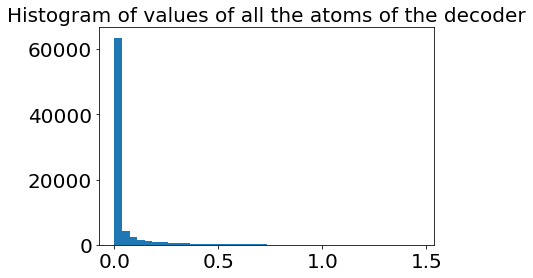

In [42]:
sp_o = 0.05
sp_w = 0.0005
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_09_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO_NoOriginals/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


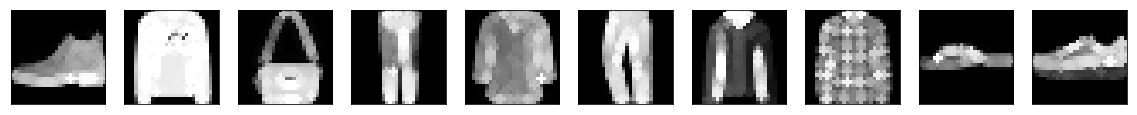

Dilatation of the reconstructions


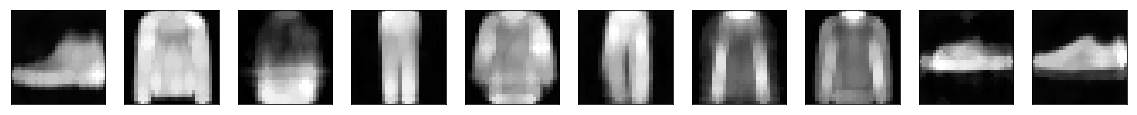

Original images and max-approximation to dilatation
Max-approx error to original:  0.3021358847618103  - Max-approx error to reconstruction:  0.3056222241401672


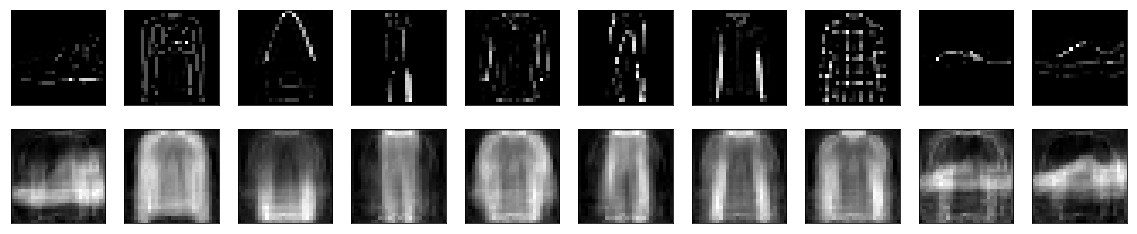

Dilated of the atom images of the decoder


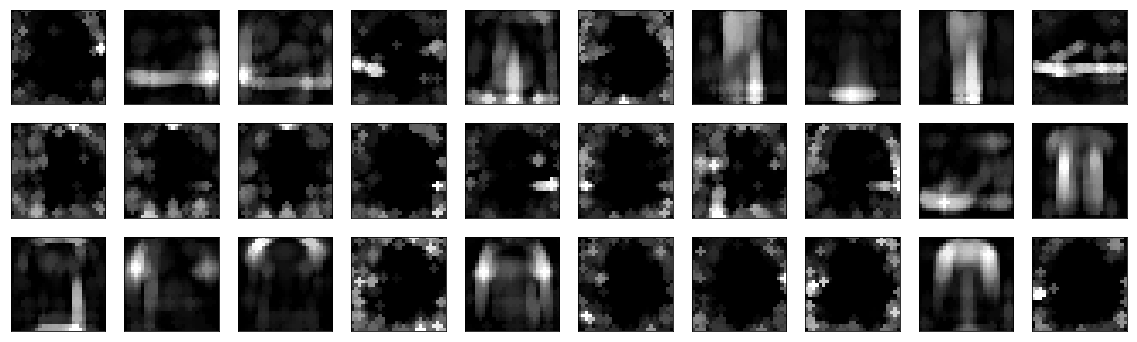

In [43]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 2.3 Sparsity_weight = 0.001 (sp_o = 0.05)

Original images and reconstructions - Reconstruction error:  0.01751445453763008


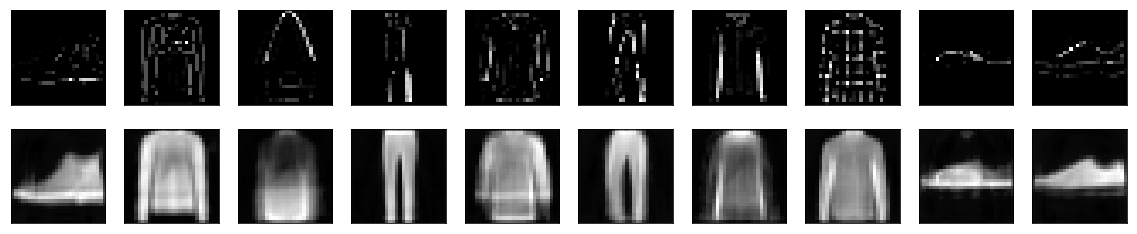

Histograms of the encodings - Sparsity (Hoyer):  0.48338964581489563


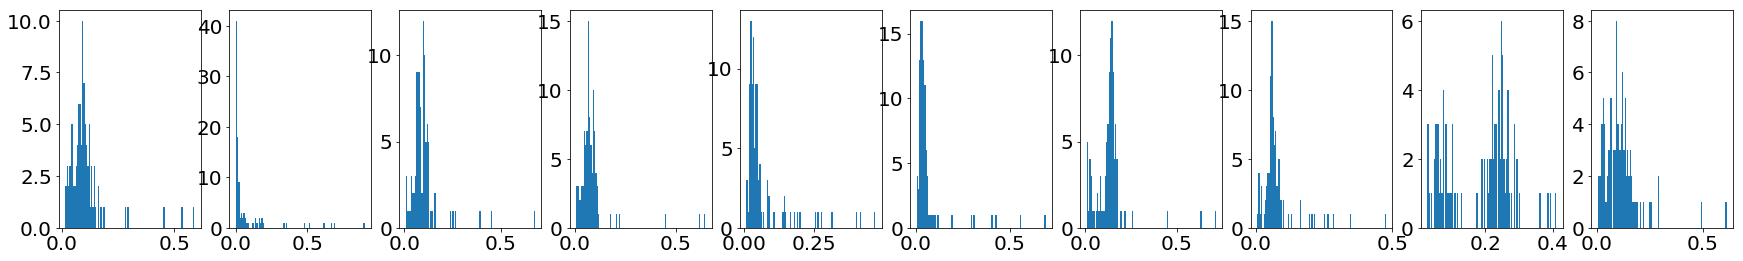

Atom images of the decoder


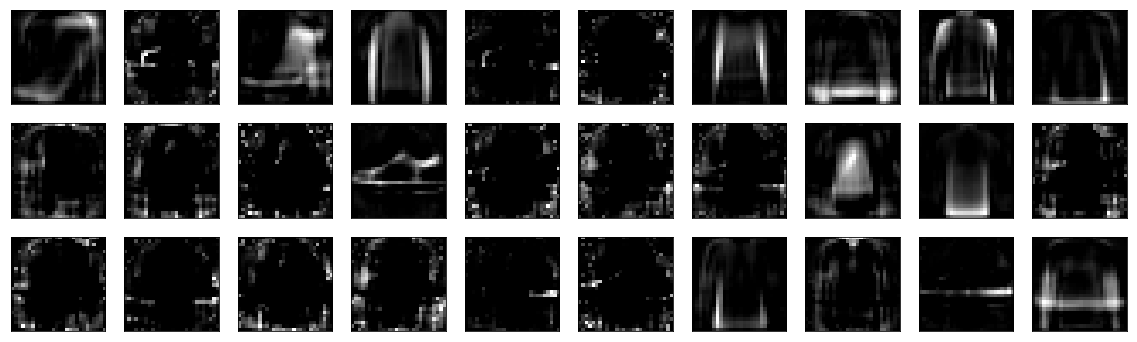

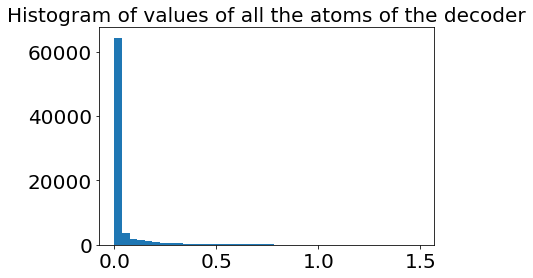

In [44]:
sp_o = 0.05
sp_w = 0.001
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_09_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO_NoOriginals/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


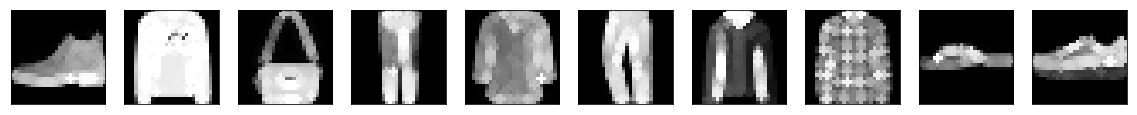

Dilatation of the reconstructions


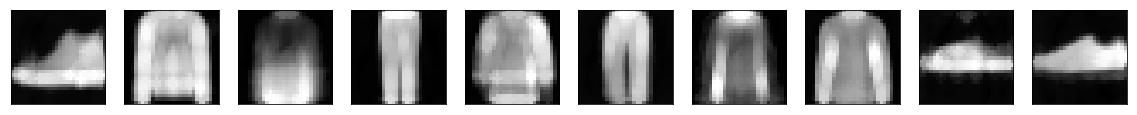

Original images and max-approximation to dilatation
Max-approx error to original:  0.17120665037631988  - Max-approx error to reconstruction:  0.17153655121326447


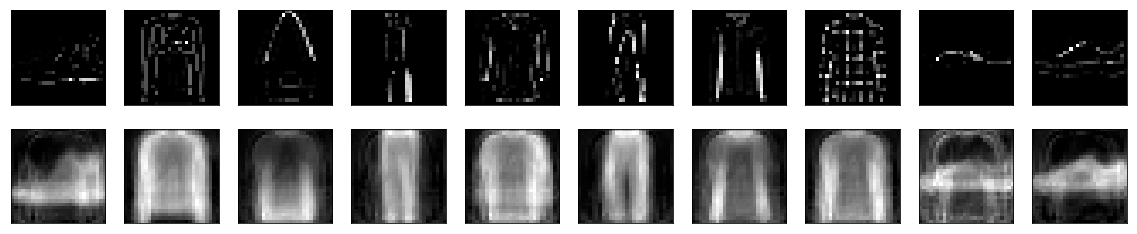

Dilated of the atom images of the decoder


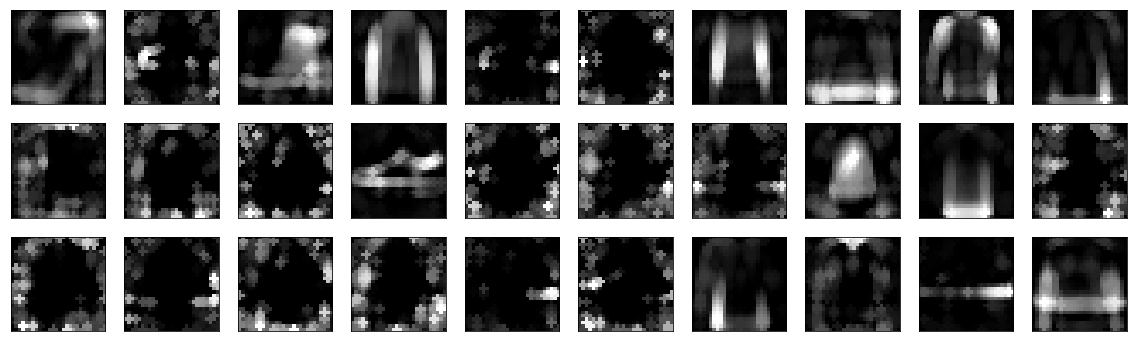

In [45]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 2.4 Sparsity_weight = 0.005 (sp_o = 0.05)

Original images and reconstructions - Reconstruction error:  0.02105194488763809


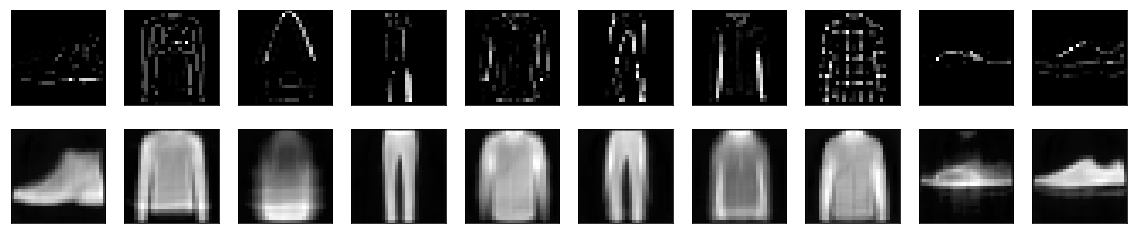

Histograms of the encodings - Sparsity (Hoyer):  0.49284228682518005


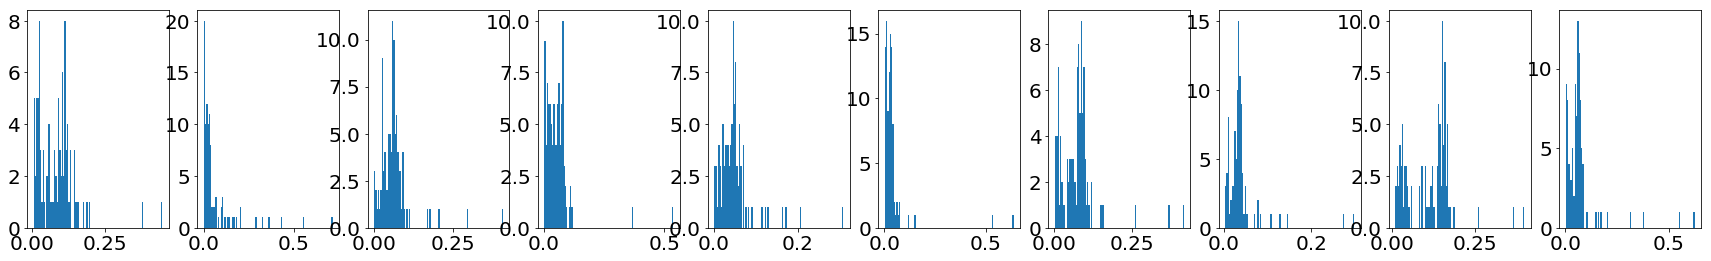

Atom images of the decoder


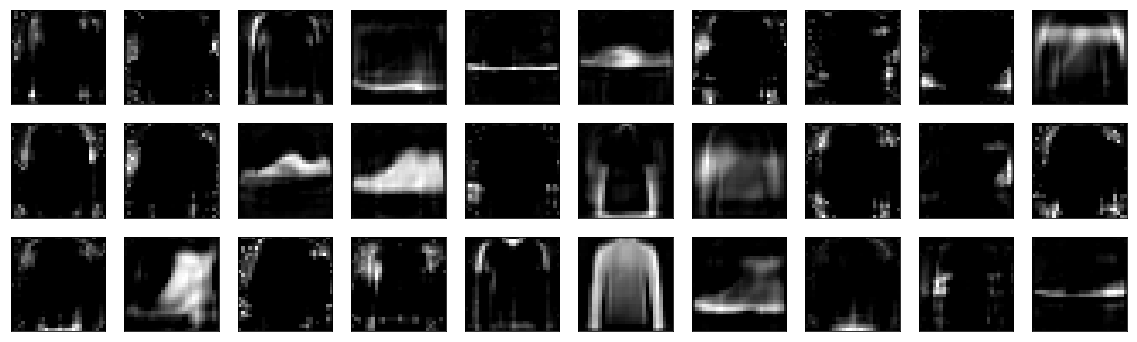

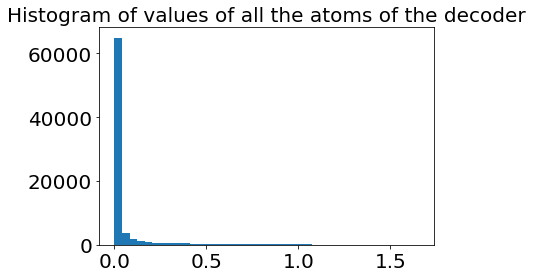

In [46]:
sp_o = 0.05
sp_w = 0.005
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_09_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO_NoOriginals/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


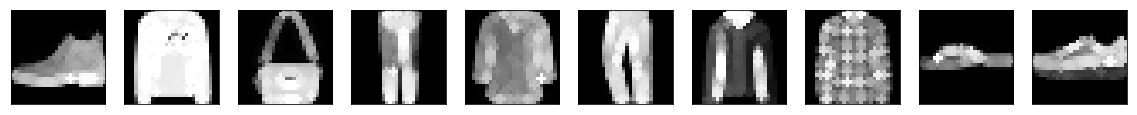

Dilatation of the reconstructions


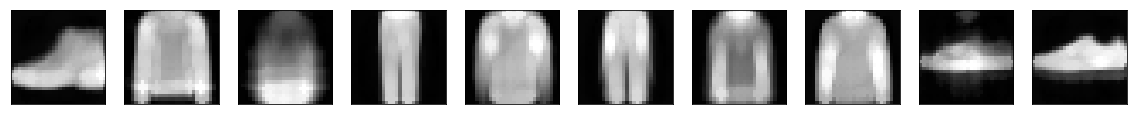

Original images and max-approximation to dilatation
Max-approx error to original:  0.05200970271229744  - Max-approx error to reconstruction:  0.049090272670984265


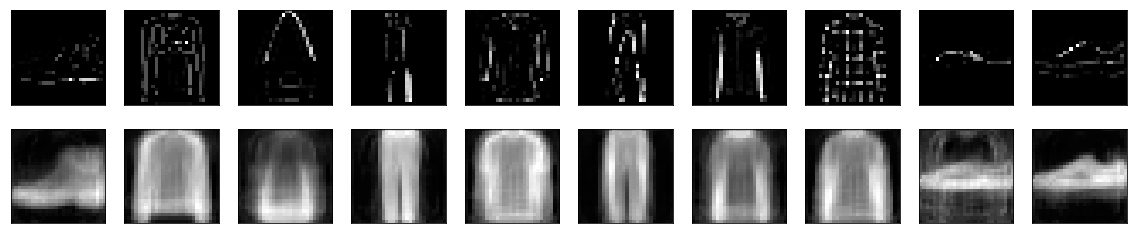

Dilated of the atom images of the decoder


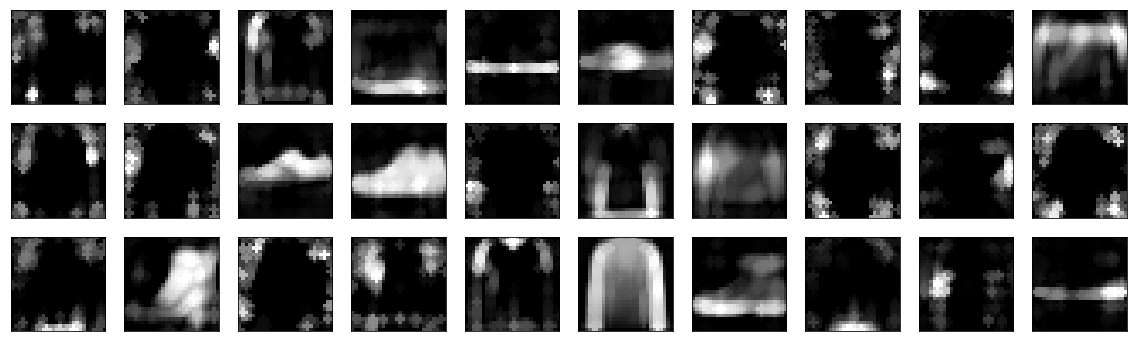

In [47]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 2.5 Sparsity_weight = 0.01 (sp_o = 0.05)

Original images and reconstructions - Reconstruction error:  0.02022662046253681


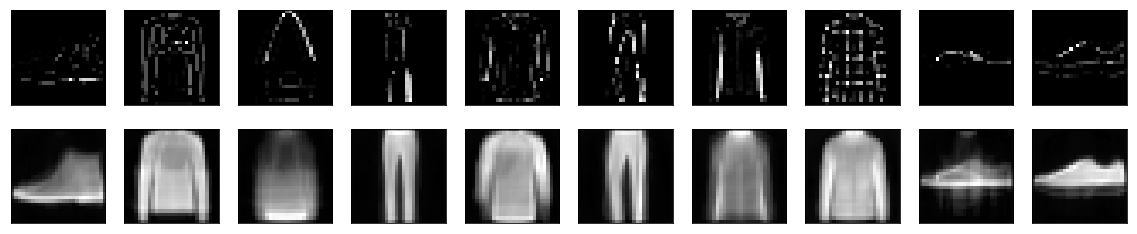

Histograms of the encodings - Sparsity (Hoyer):  0.5009106397628784


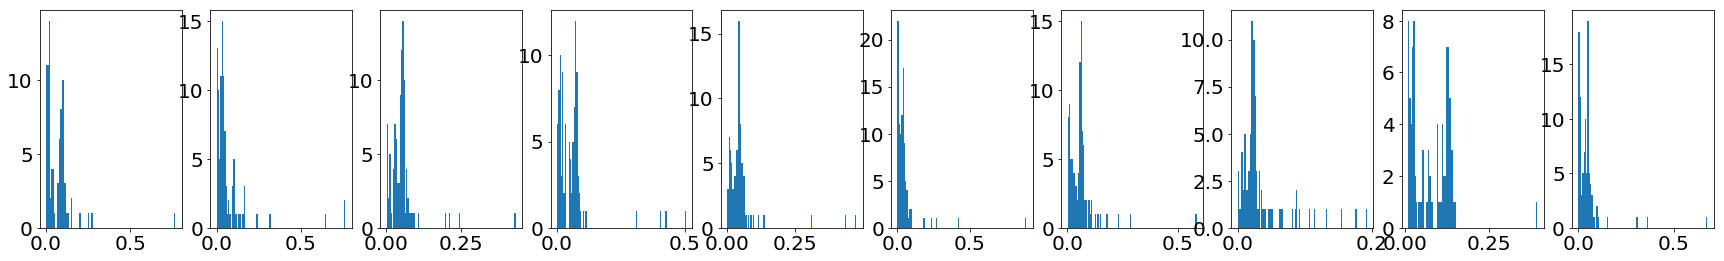

Atom images of the decoder


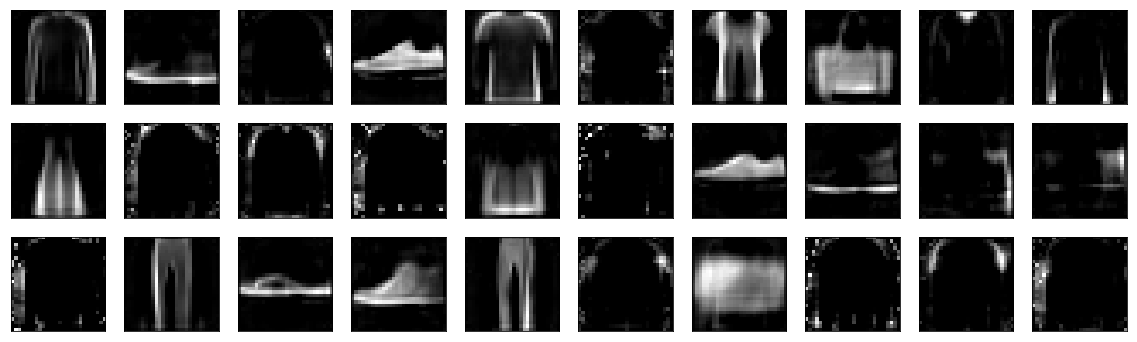

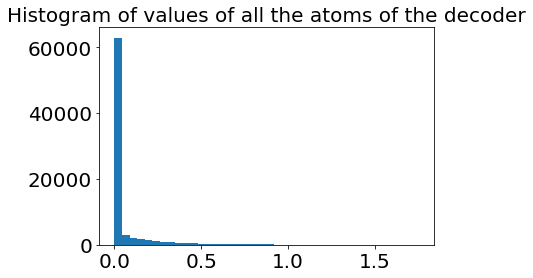

In [49]:
sp_o = 0.05
sp_w = 0.01
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_10_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO_NoOriginals/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


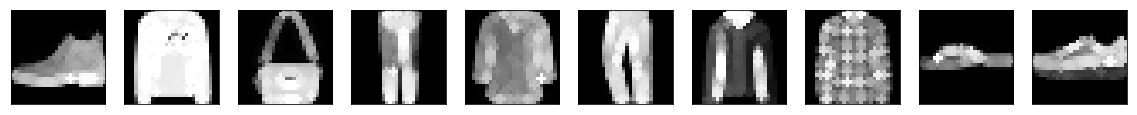

Dilatation of the reconstructions


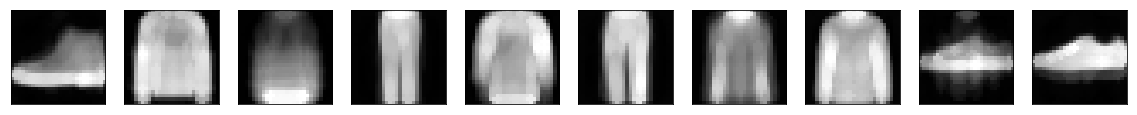

Original images and max-approximation to dilatation
Max-approx error to original:  0.05982655118107796  - Max-approx error to reconstruction:  0.04513587672114372


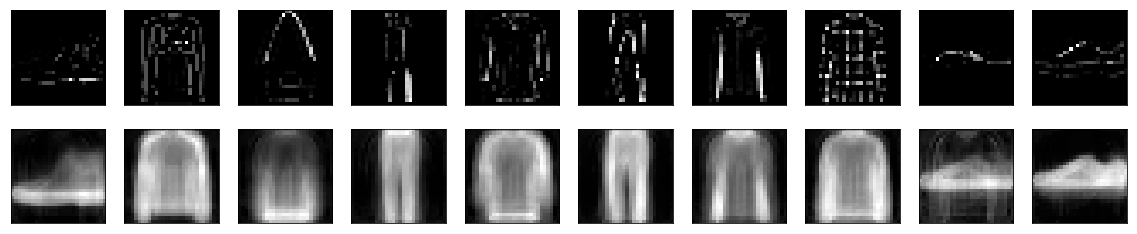

Dilated of the atom images of the decoder


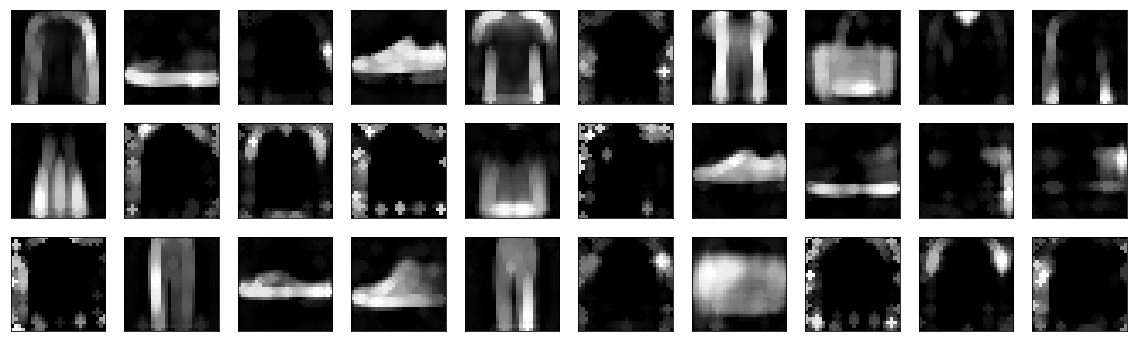

In [50]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 2.6 Sparsity_weight = 0.05 (sp_o = 0.05)

Original images and reconstructions - Reconstruction error:  0.02157548439204693


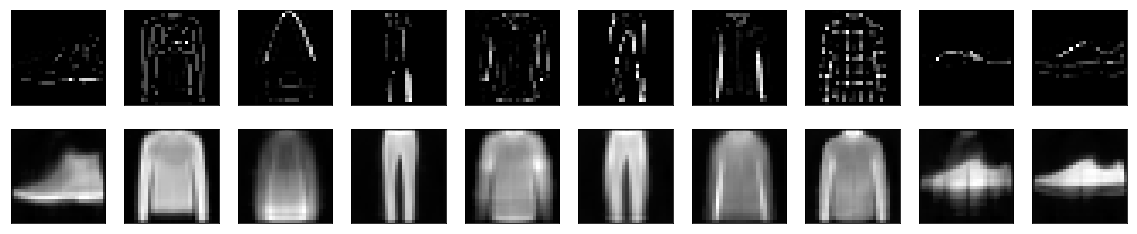

Histograms of the encodings - Sparsity (Hoyer):  0.38067641854286194


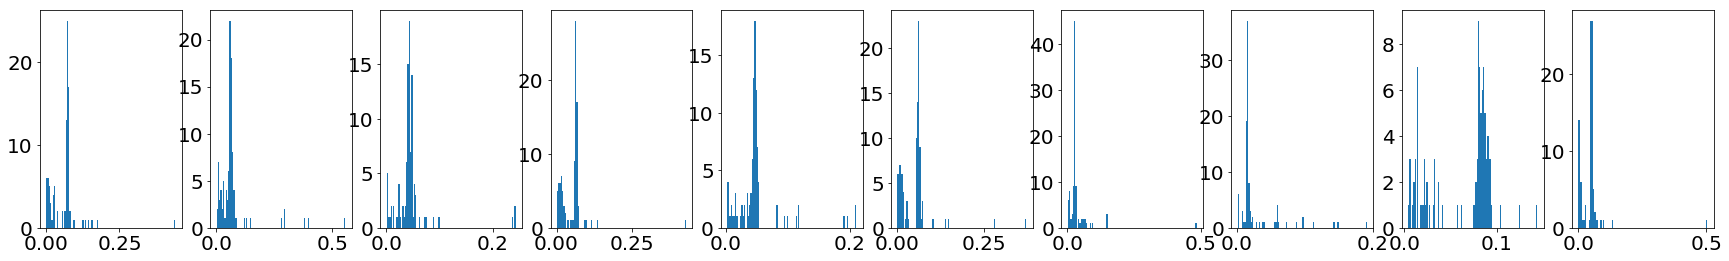

Atom images of the decoder


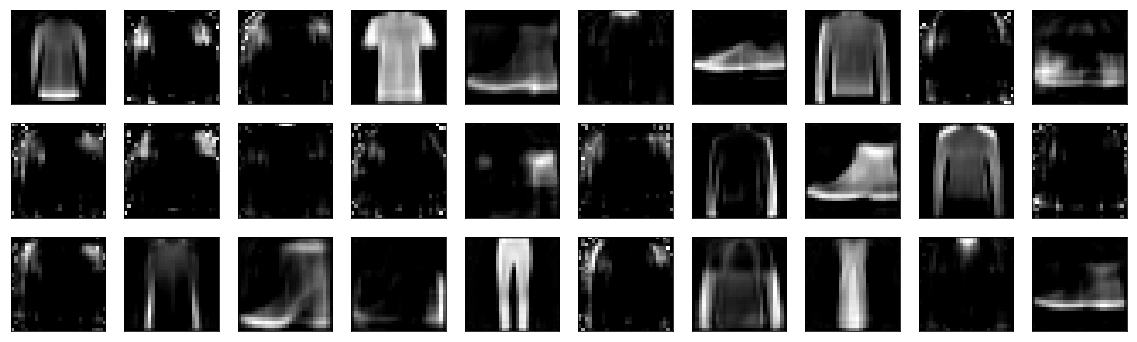

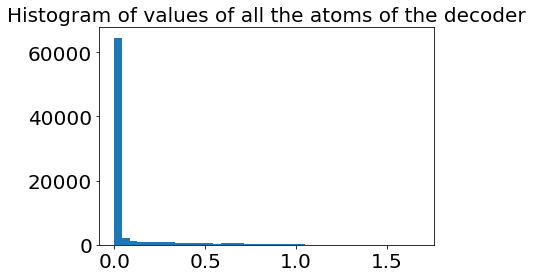

In [51]:
sp_o = 0.05
sp_w = 0.05
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_10_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO_NoOriginals/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


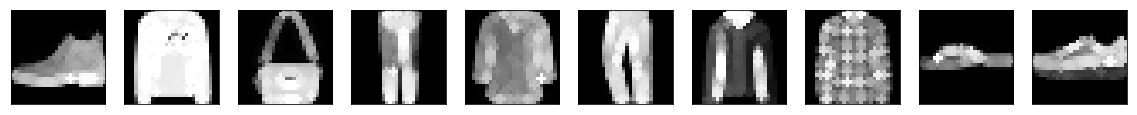

Dilatation of the reconstructions


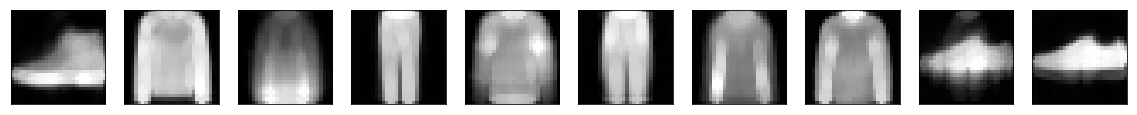

Original images and max-approximation to dilatation
Max-approx error to original:  0.0547964762032032  - Max-approx error to reconstruction:  0.037280893111228945


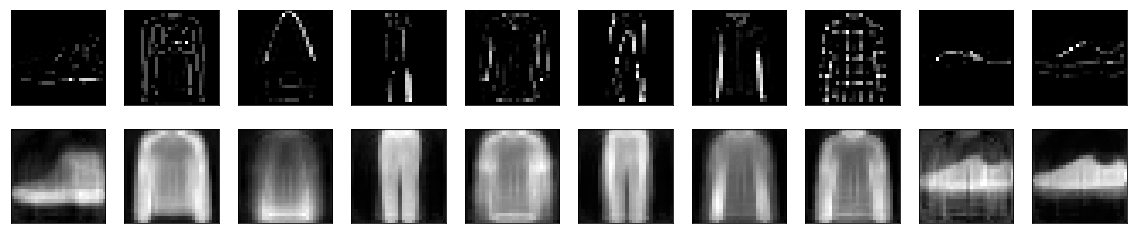

Dilated of the atom images of the decoder


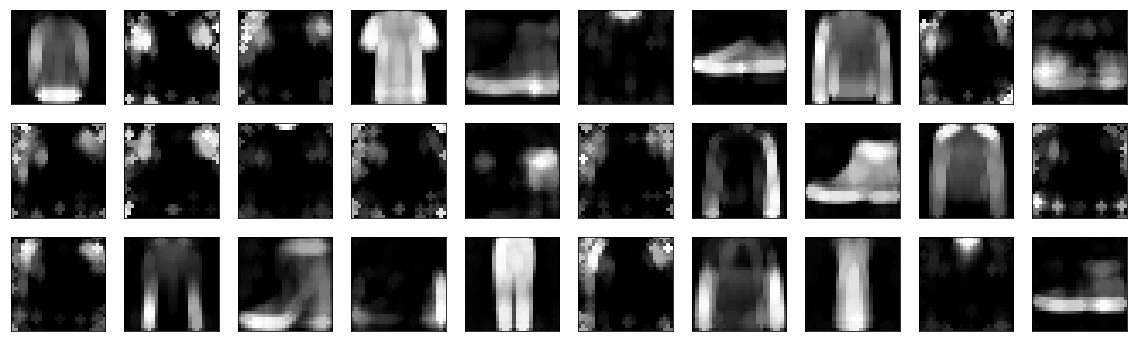

In [52]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 2.7 Sparsity_weight = 0.1 (sp_o = 0.05)

Original images and reconstructions - Reconstruction error:  0.019158067467808723


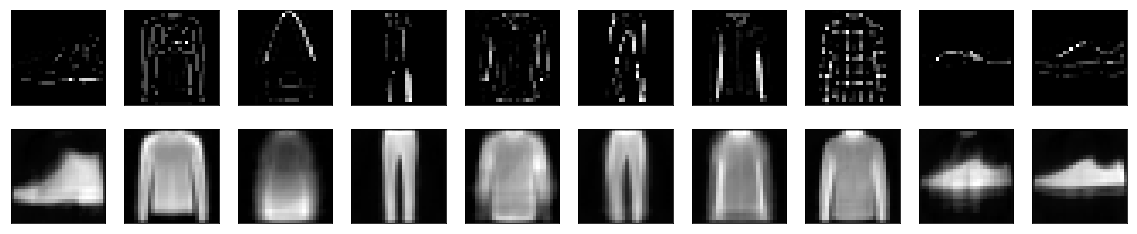

Histograms of the encodings - Sparsity (Hoyer):  0.3538423776626587


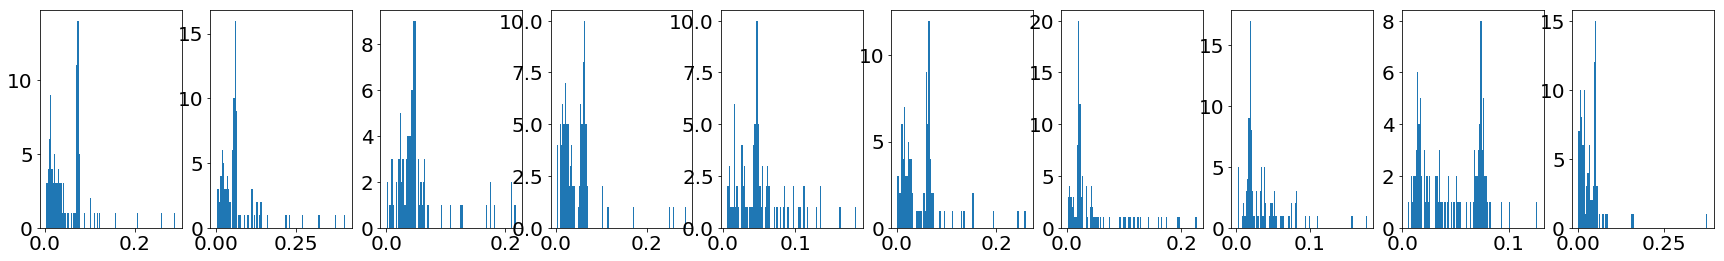

Atom images of the decoder


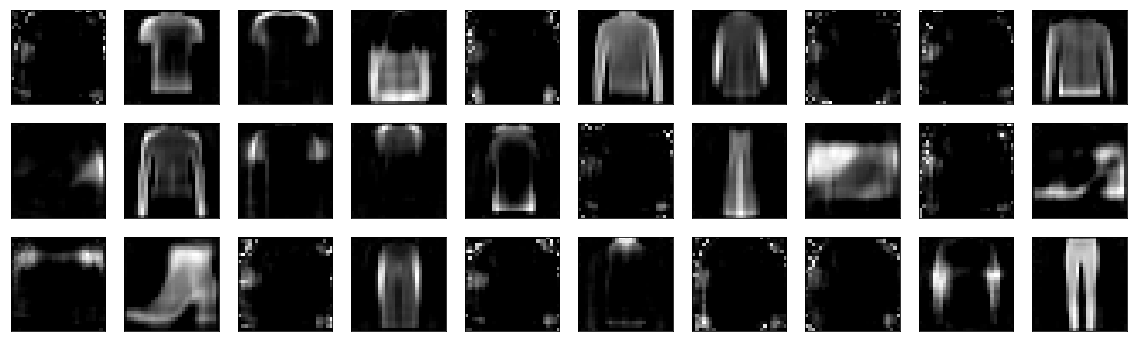

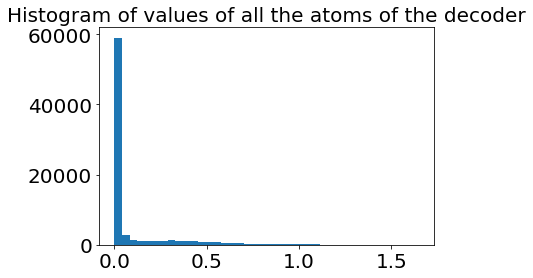

In [53]:
sp_o = 0.05
sp_w = 0.1
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_10_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO_NoOriginals/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


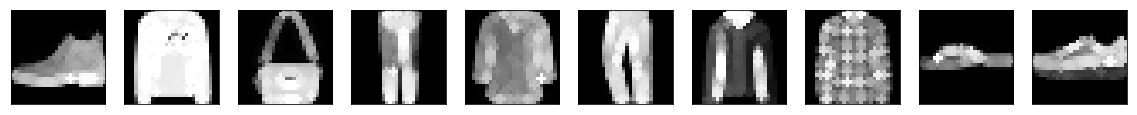

Dilatation of the reconstructions


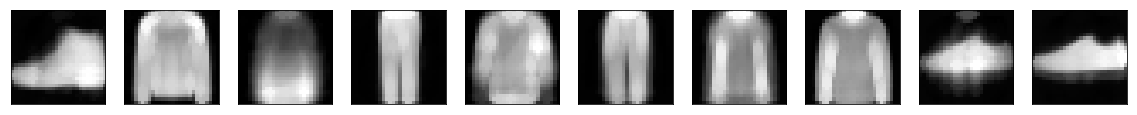

Original images and max-approximation to dilatation
Max-approx error to original:  0.08238664350509643  - Max-approx error to reconstruction:  0.0715833581328392


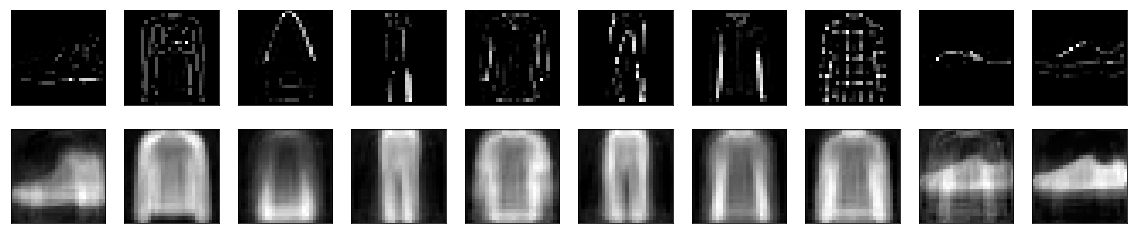

Dilated of the atom images of the decoder


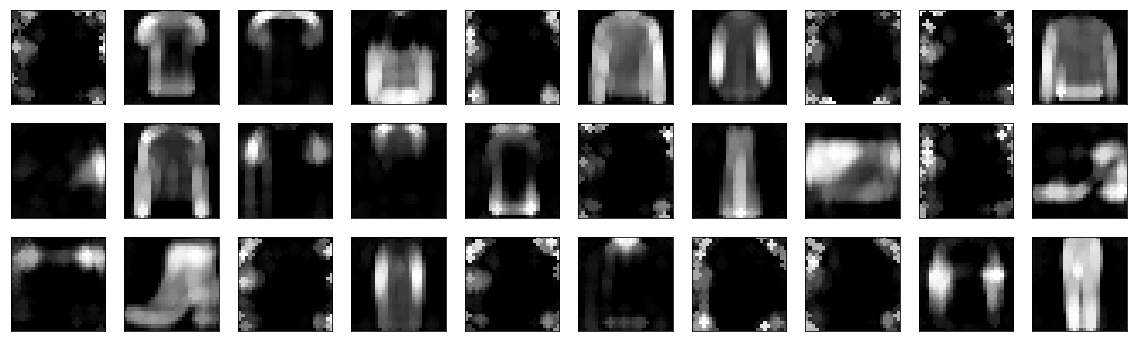

In [54]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 2.8 Sparsity_weight = 0.5 (sp_o = 0.05)

Original images and reconstructions - Reconstruction error:  0.027024339592456818


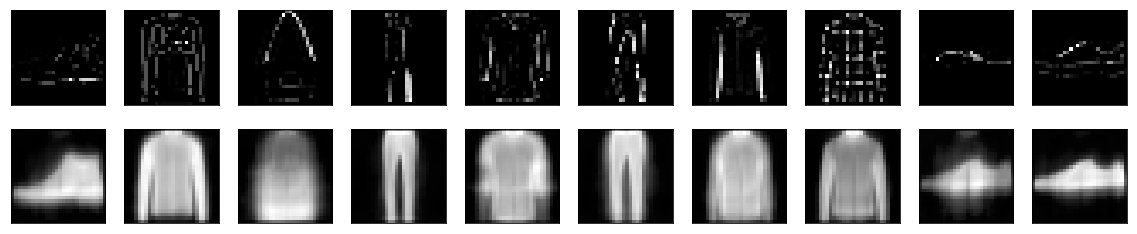

Histograms of the encodings - Sparsity (Hoyer):  0.16723904013633728


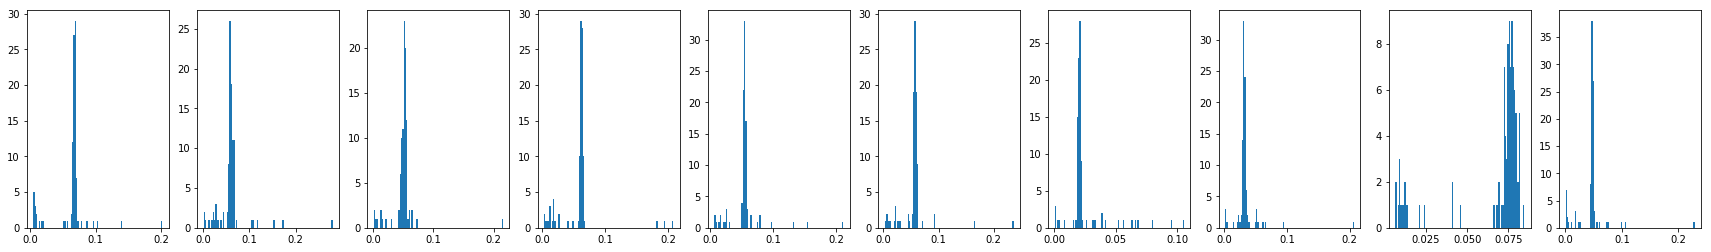

Atom images of the decoder


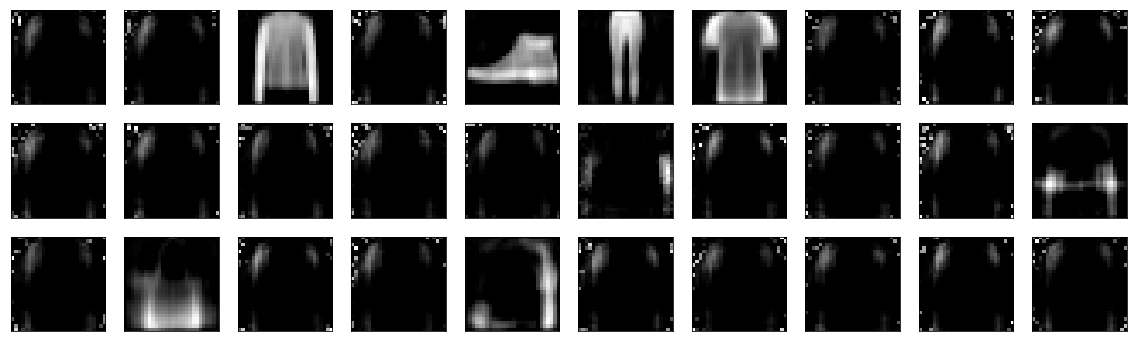

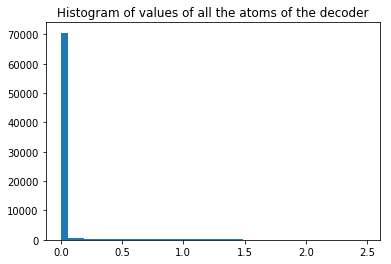

In [5]:
sp_o = 0.05
sp_w = 0.5
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_10_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO_NoOriginals/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


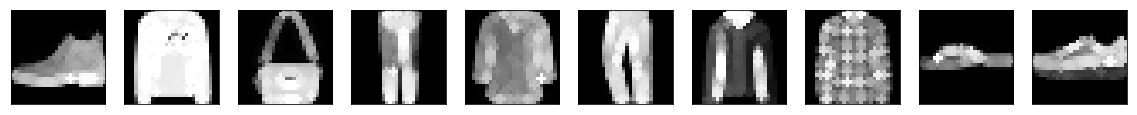

Dilatation of the reconstructions


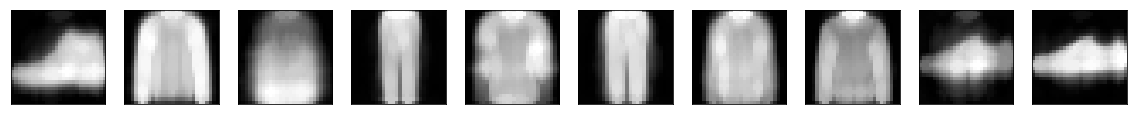

Original images and max-approximation to dilatation
Max-approx error to original:  0.03590723103284836  - Max-approx error to reconstruction:  0.020143861746788026


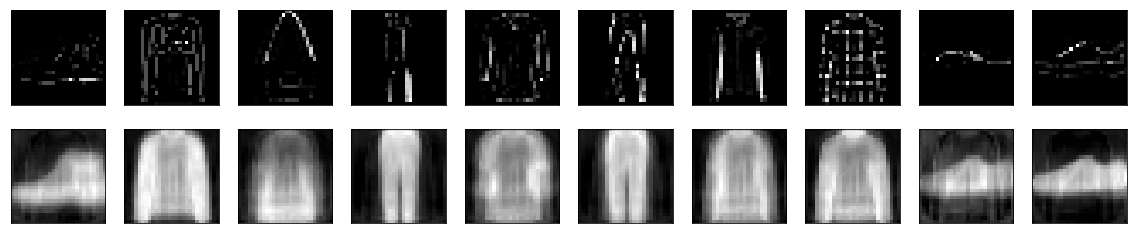

Dilated of the atom images of the decoder


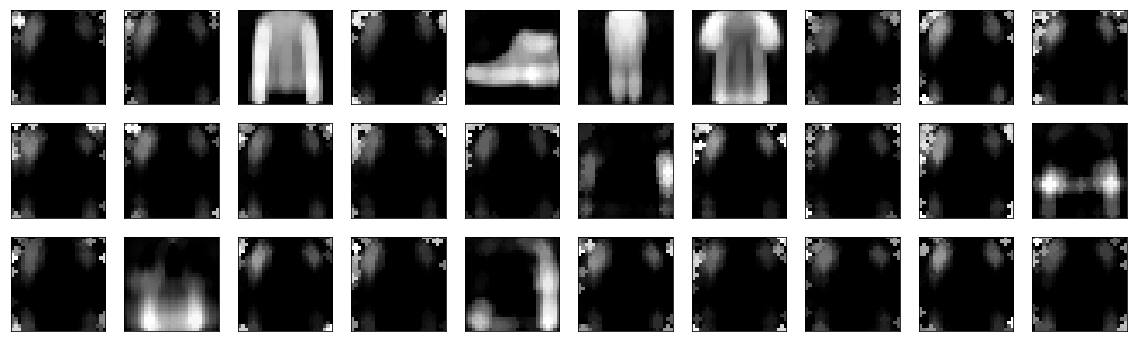

In [6]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

In [9]:
x_test_PADO = morphoMaths.positive_decomposition_by_openings_by_rec(x_test[:,:,:,0], levels=5, step=1, init_step=1, add_original_images=False)
x_test_PADO.shape

/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:143: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  selem[[slice(d, d + 1) for d in offset]] = False
/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:161: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  images[[0] + inside_slices] = seed
/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:162: FutureWarning: Using a non-tuple sequence for mult

(10000, 28, 28, 6)

In [11]:
x_test_PADO_rec_dil = AE_dil.reconstruction(x_test_PADO)

In [12]:
np.mean(np.square(x_test_PADO_rec_dil - x_test))

0.04859964

# 3. Sparsity_Objective = 0.1

## 3.1 Sparsity_weight = 0.0001 (sp_o = 0.1)

Original images and reconstructions - Reconstruction error:  0.01237320049405098


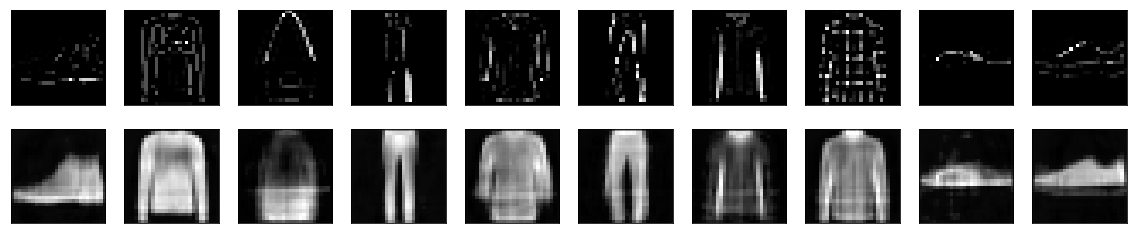

Histograms of the encodings - Sparsity (Hoyer):  0.3058058023452759


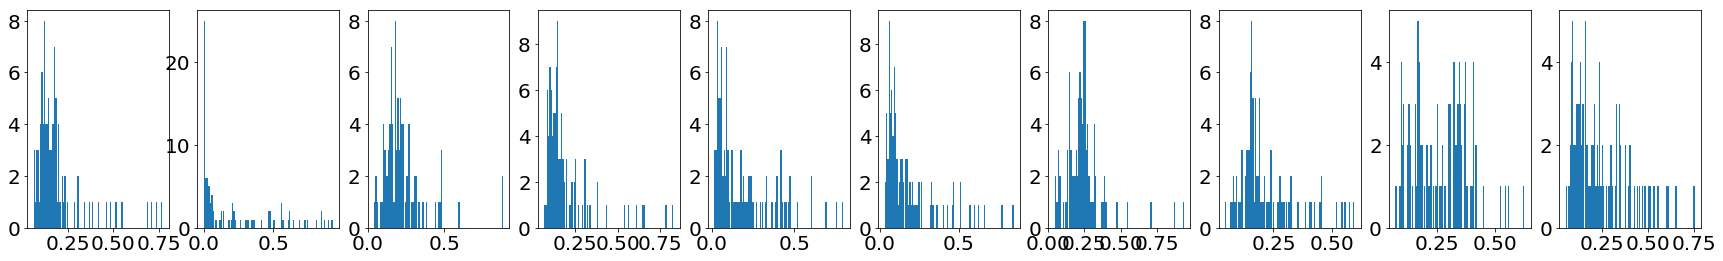

Atom images of the decoder


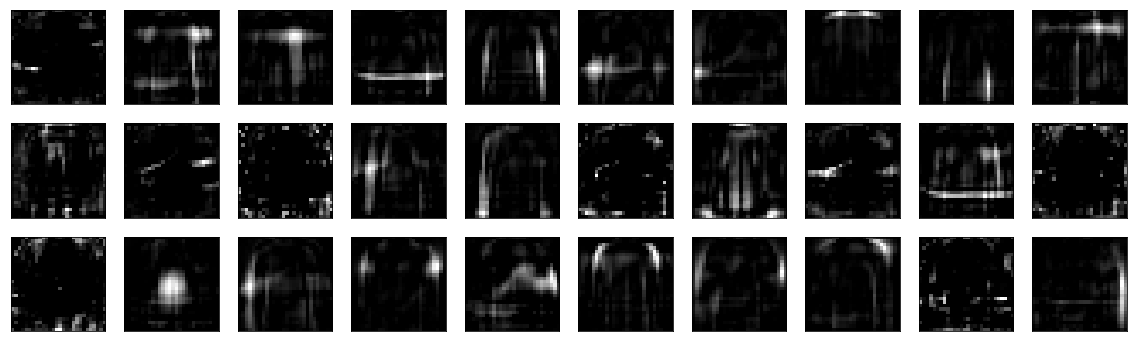

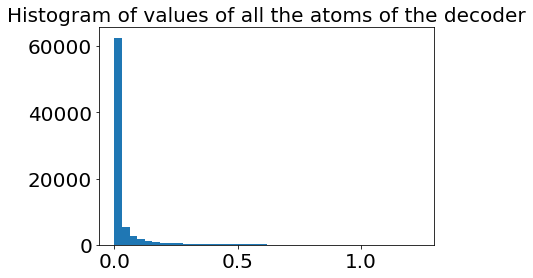

In [57]:
sp_o = 0.1
sp_w = 0.0001
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_09_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO_NoOriginals/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


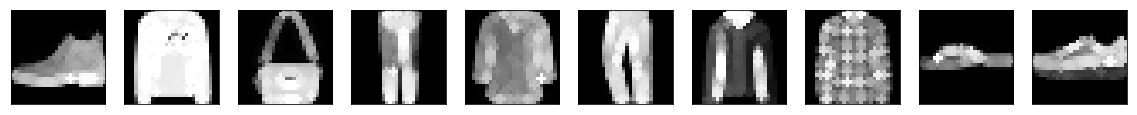

Dilatation of the reconstructions


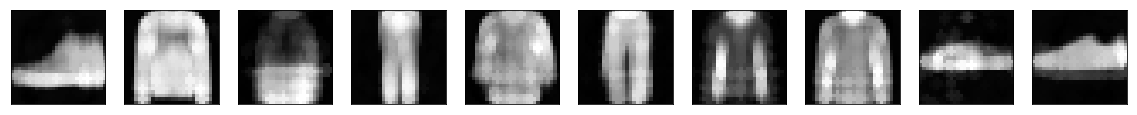

Original images and max-approximation to dilatation
Max-approx error to original:  1.0364421413421632  - Max-approx error to reconstruction:  1.0539915693283082


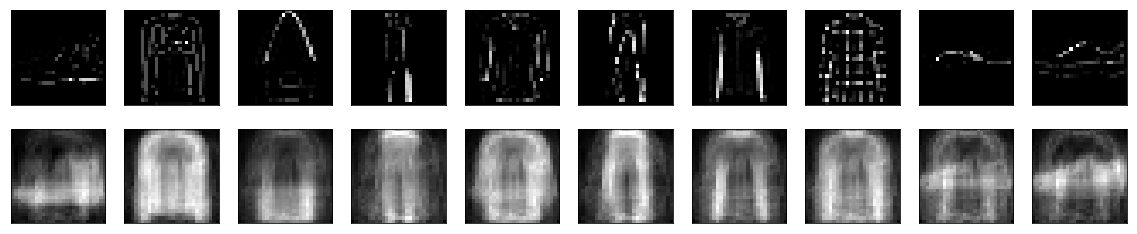

Dilated of the atom images of the decoder


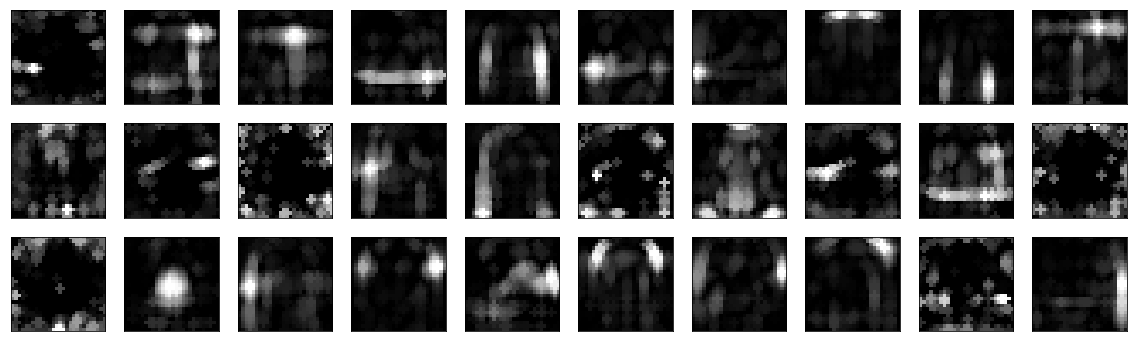

In [58]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 3.2 Sparsity_weight = 0.0005 (sp_o = 0.1)

Original images and reconstructions - Reconstruction error:  0.014064090937376022


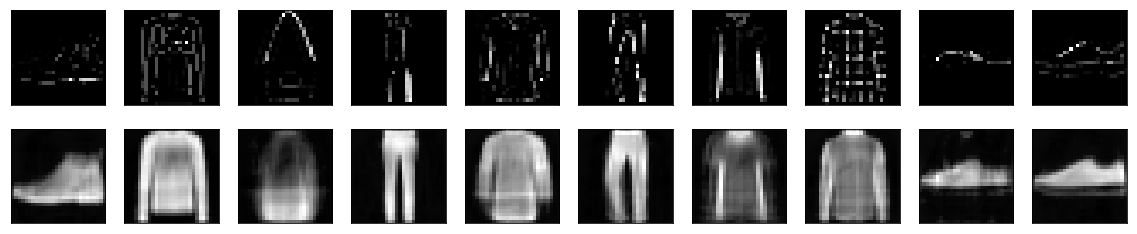

Histograms of the encodings - Sparsity (Hoyer):  0.34637364745140076


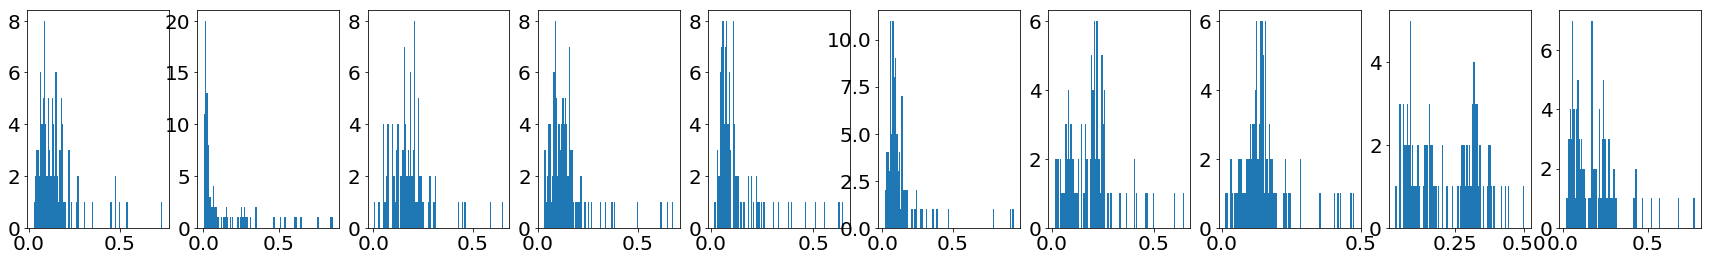

Atom images of the decoder


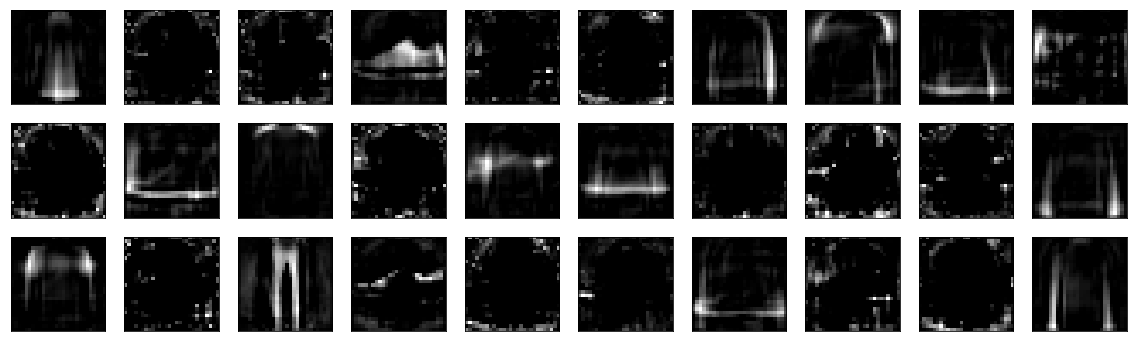

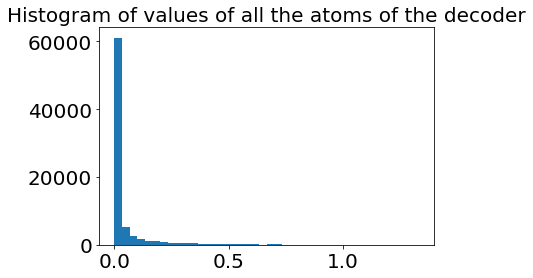

In [59]:
sp_o = 0.1
sp_w = 0.0005
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_09_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO_NoOriginals/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


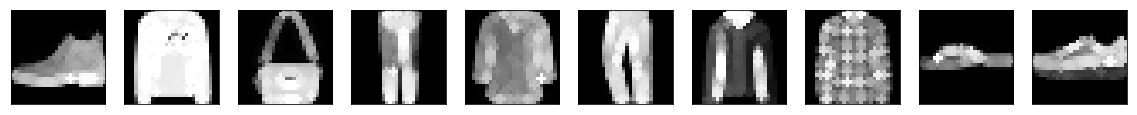

Dilatation of the reconstructions


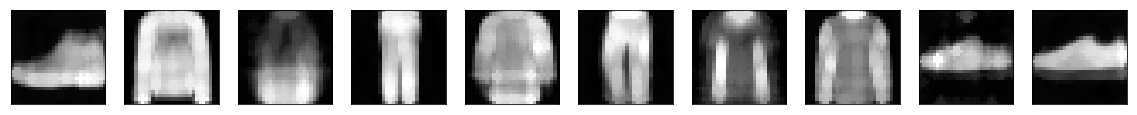

Original images and max-approximation to dilatation
Max-approx error to original:  0.4831583957195282  - Max-approx error to reconstruction:  0.49423799829483034


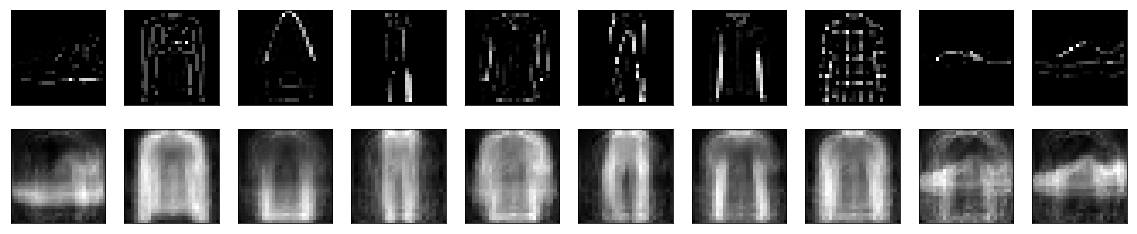

Dilated of the atom images of the decoder


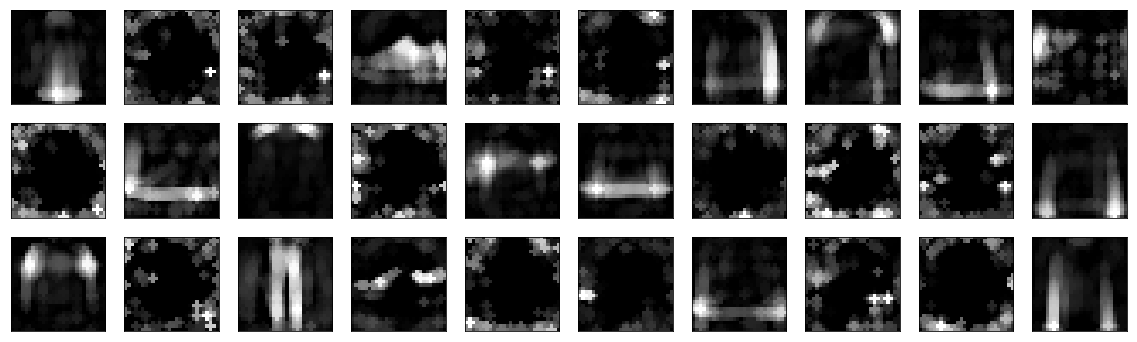

In [60]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 3.3 Sparsity_weight = 0.001 (sp_o = 0.1)

Original images and reconstructions - Reconstruction error:  0.014771046659350395


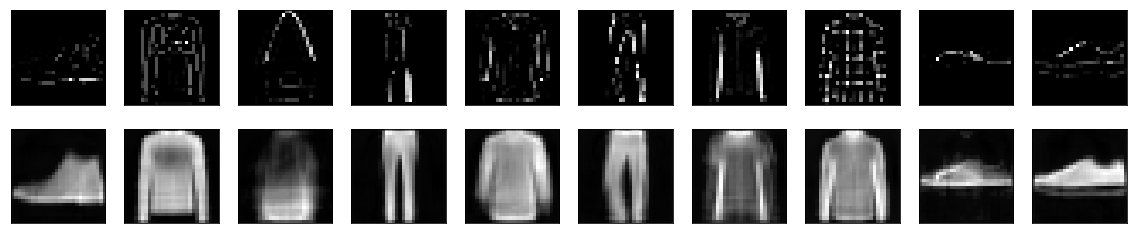

Histograms of the encodings - Sparsity (Hoyer):  0.35660845041275024


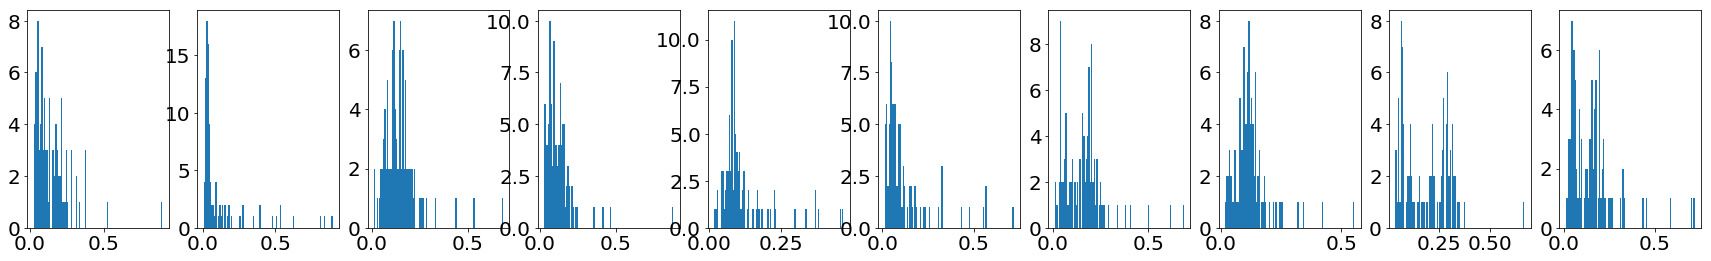

Atom images of the decoder


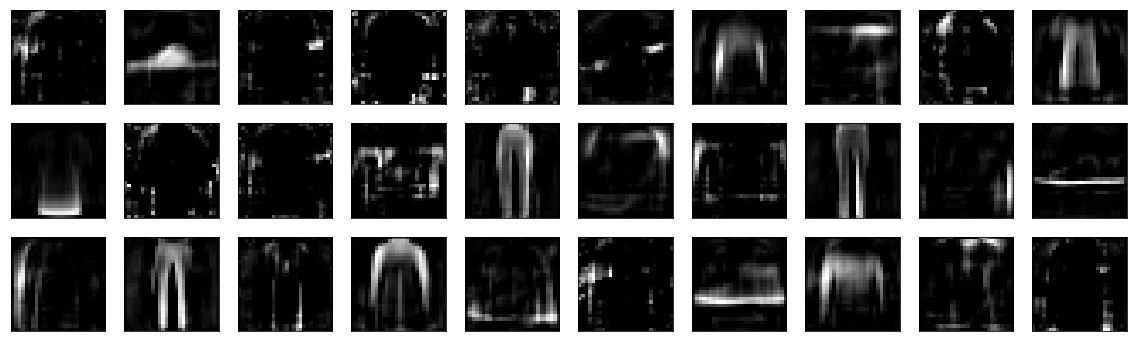

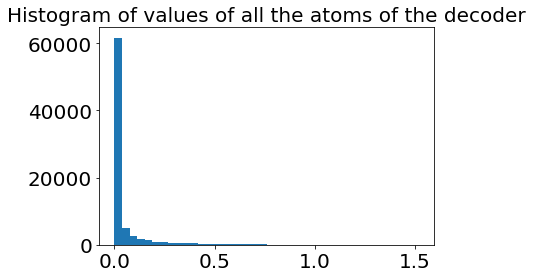

In [61]:
sp_o = 0.1
sp_w = 0.001
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_09_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO_NoOriginals/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


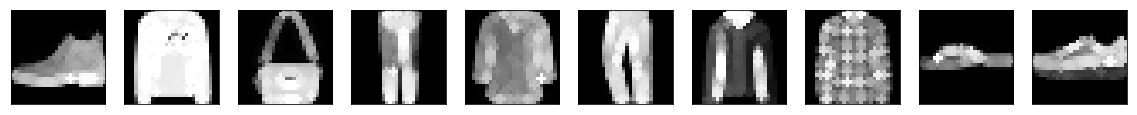

Dilatation of the reconstructions


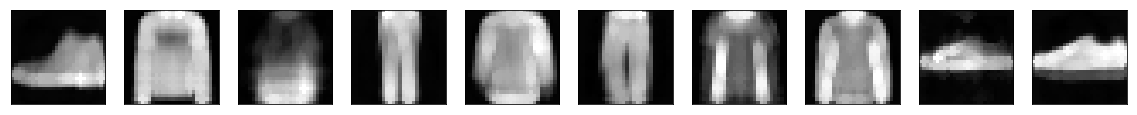

Original images and max-approximation to dilatation
Max-approx error to original:  0.3425858941078186  - Max-approx error to reconstruction:  0.34991701397895814


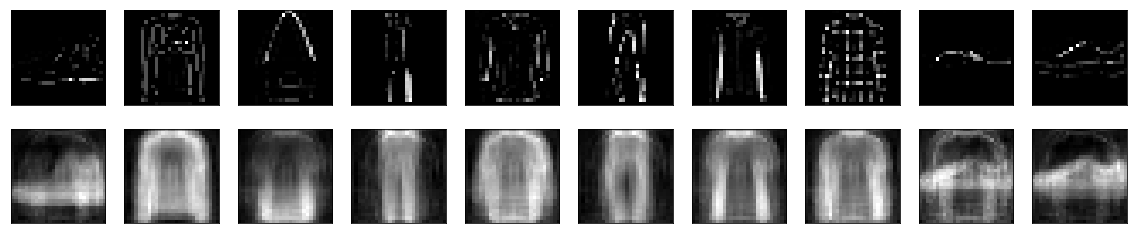

Dilated of the atom images of the decoder


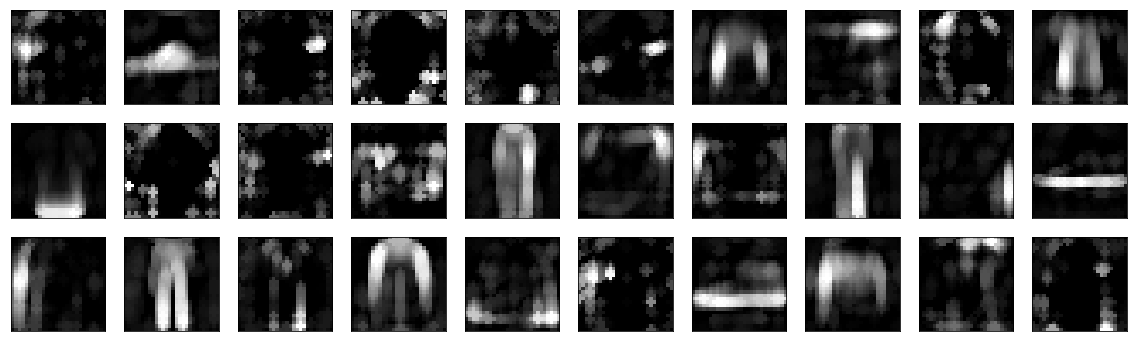

In [62]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 3.4 Sparsity_weight = 0.005 (sp_o = 0.1)

Original images and reconstructions - Reconstruction error:  0.01612690960764885


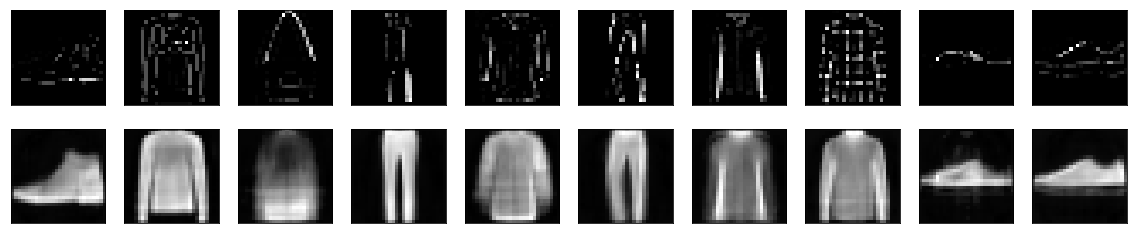

Histograms of the encodings - Sparsity (Hoyer):  0.3467131555080414


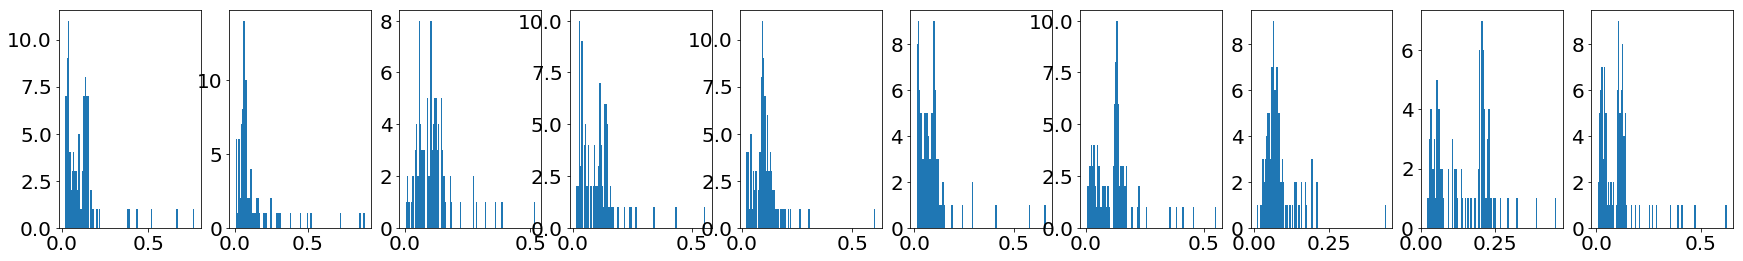

Atom images of the decoder


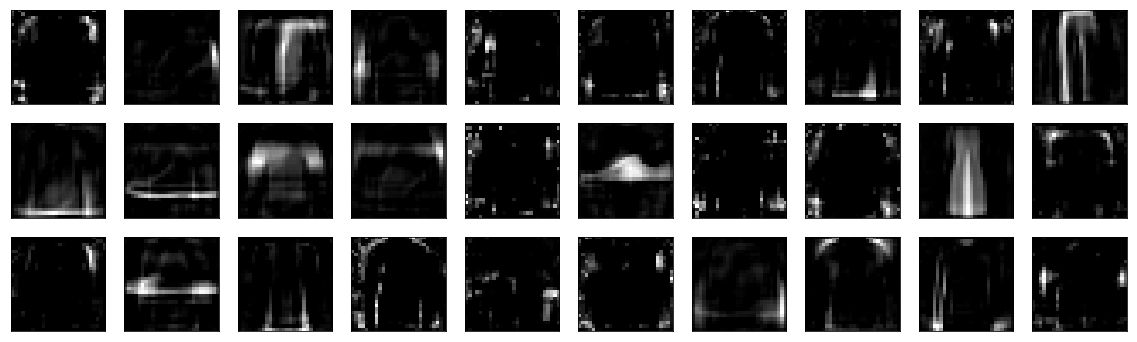

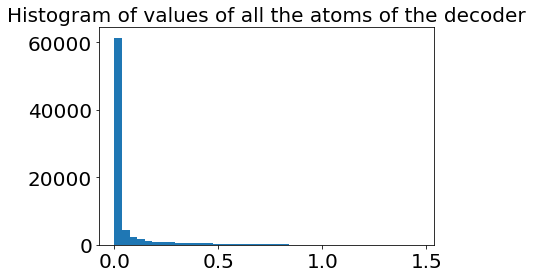

In [63]:
sp_o = 0.1
sp_w = 0.005
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_09_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO_NoOriginals/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


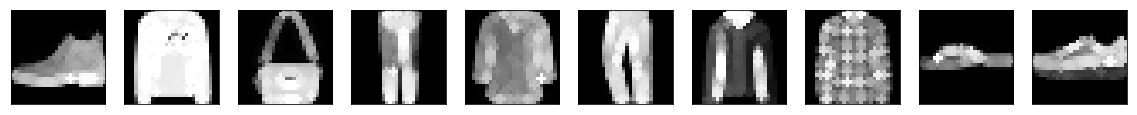

Dilatation of the reconstructions


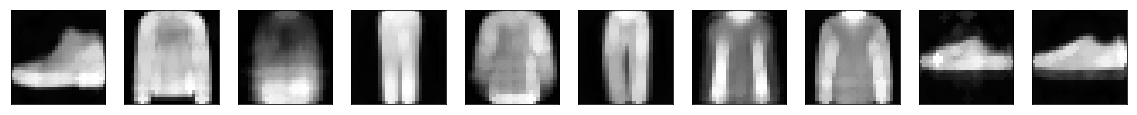

Original images and max-approximation to dilatation
Max-approx error to original:  0.19703514845371245  - Max-approx error to reconstruction:  0.19712319955825805


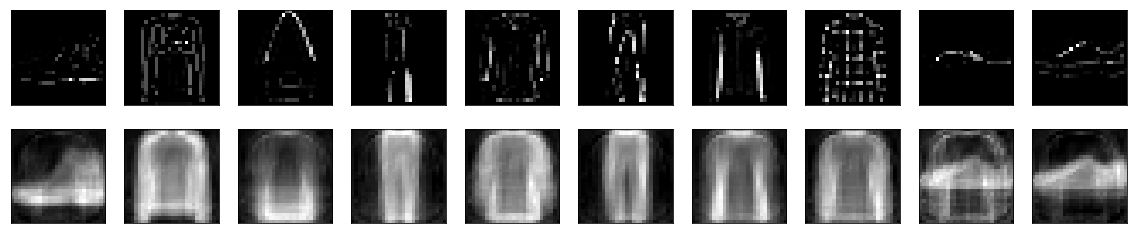

Dilated of the atom images of the decoder


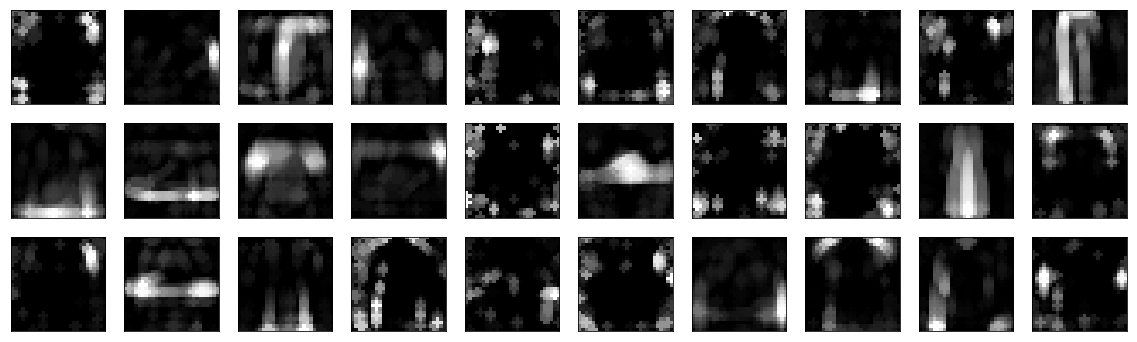

In [64]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 3.5 Sparsity_weight = 0.01 (sp_o = 0.1)

Original images and reconstructions - Reconstruction error:  0.015415928256511688


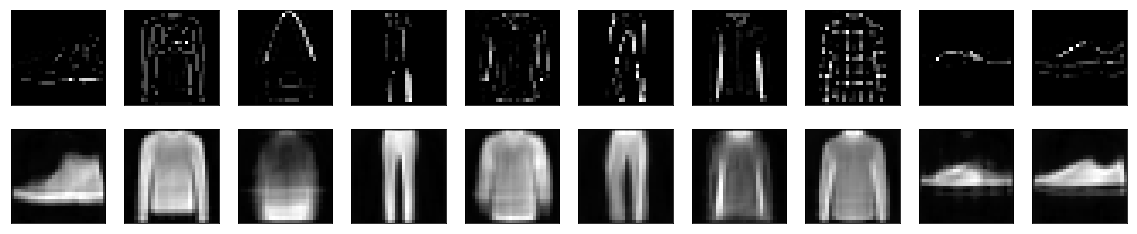

Histograms of the encodings - Sparsity (Hoyer):  0.3403763473033905


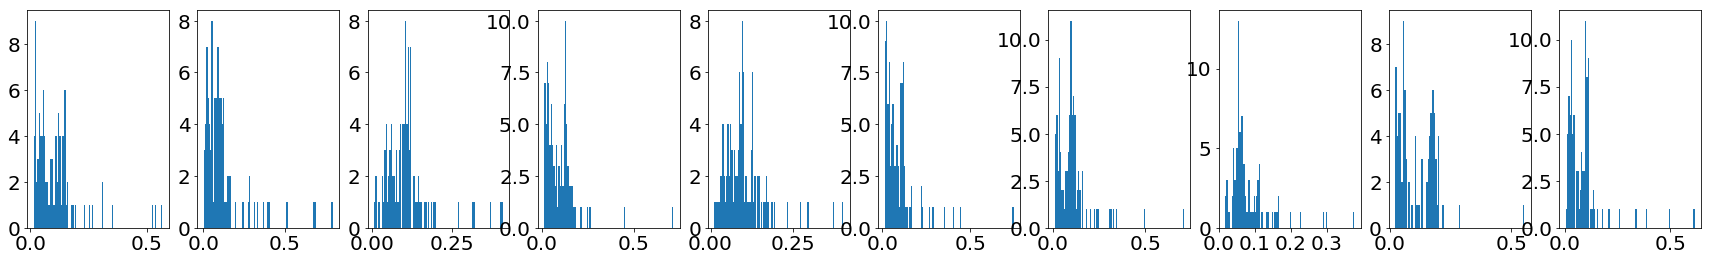

Atom images of the decoder


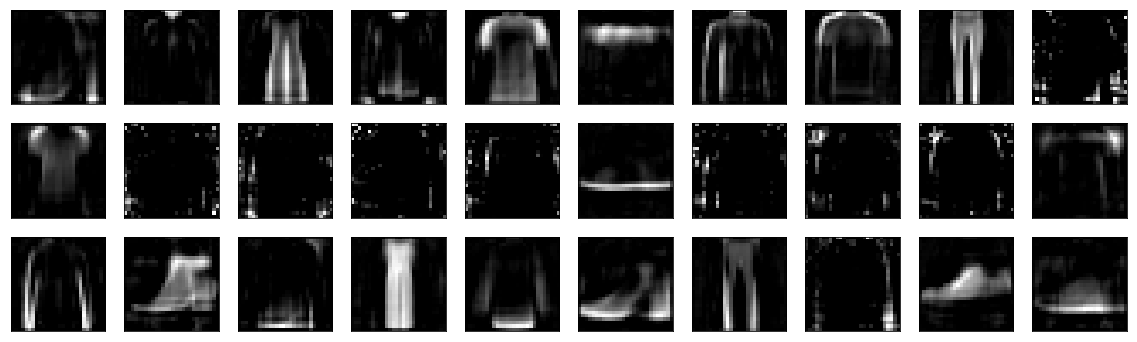

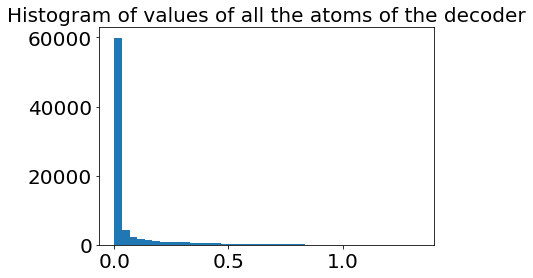

In [65]:
sp_o = 0.1
sp_w = 0.01
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_10_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO_NoOriginals/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


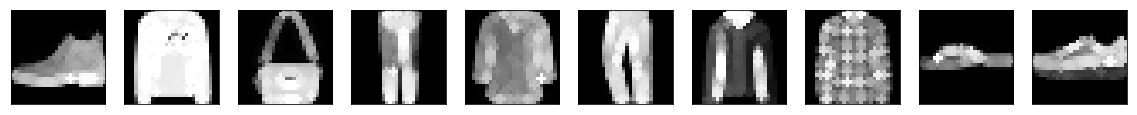

Dilatation of the reconstructions


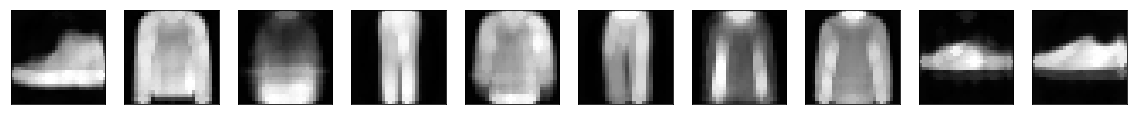

Original images and max-approximation to dilatation
Max-approx error to original:  0.20411146459579468  - Max-approx error to reconstruction:  0.20752017798423766


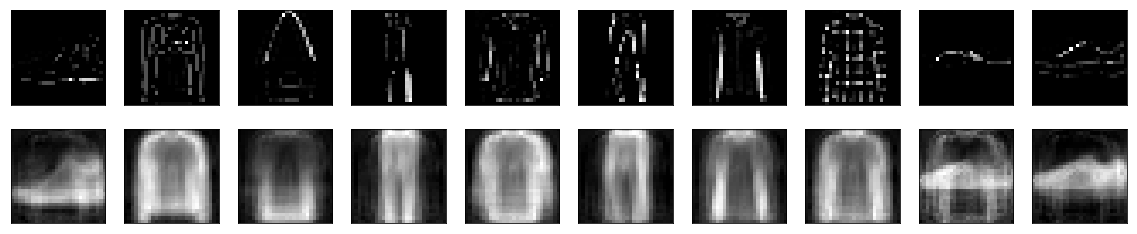

Dilated of the atom images of the decoder


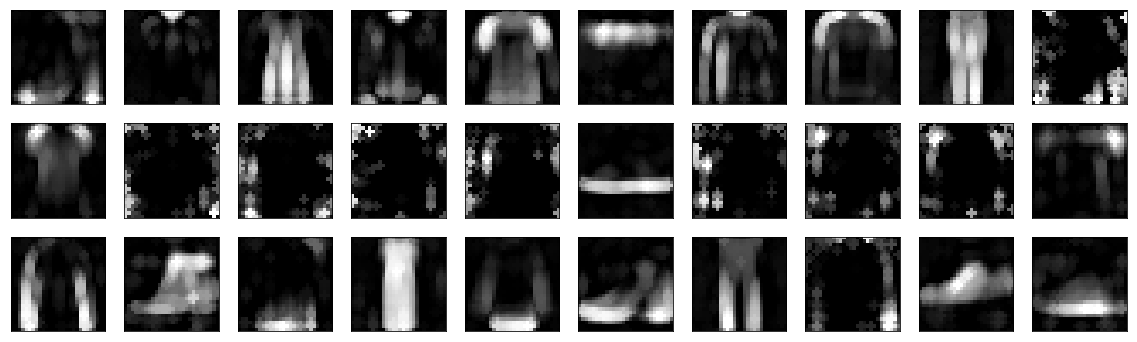

In [66]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 3.6 Sparsity_weight = 0.05 (sp_o = 0.1)

Original images and reconstructions - Reconstruction error:  0.014791335201263427


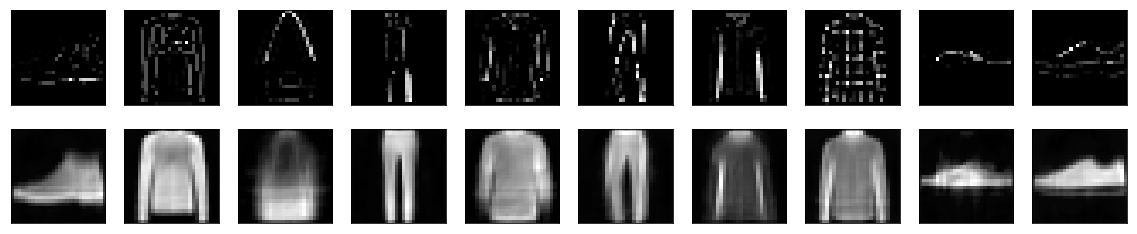

Histograms of the encodings - Sparsity (Hoyer):  0.2556609511375427


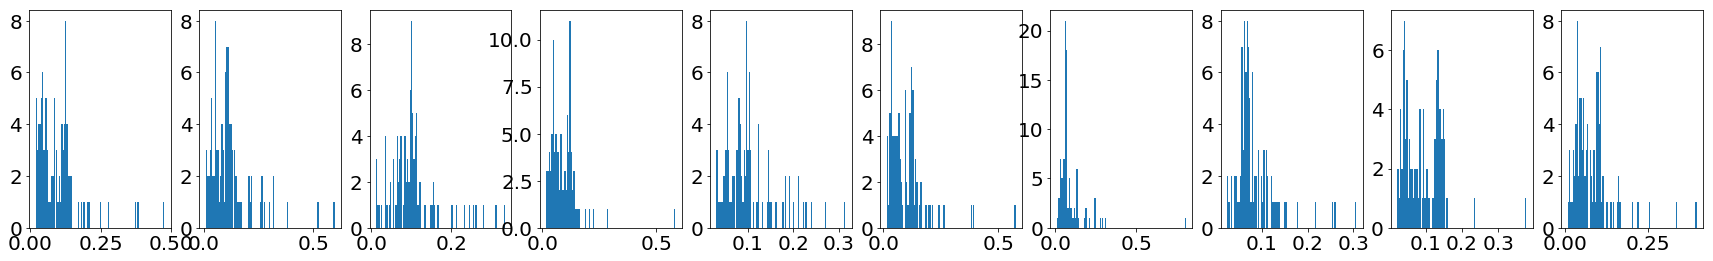

Atom images of the decoder


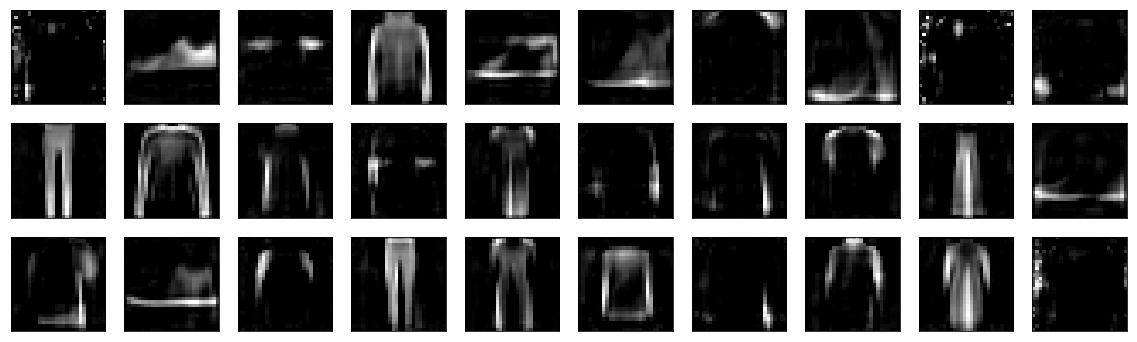

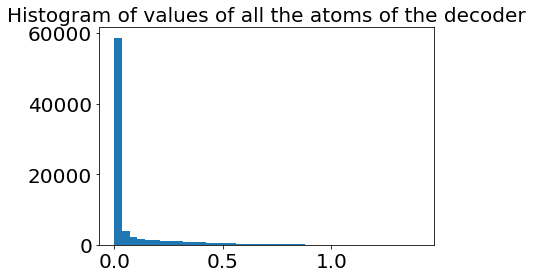

In [67]:
sp_o = 0.1
sp_w = 0.05
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_10_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO_NoOriginals/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


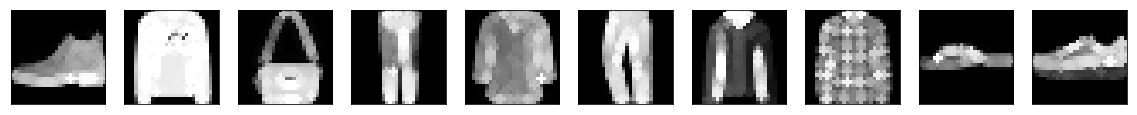

Dilatation of the reconstructions


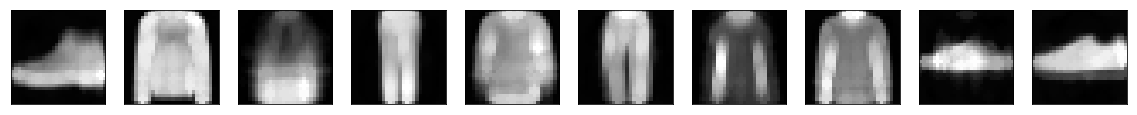

Original images and max-approximation to dilatation
Max-approx error to original:  0.3006722888946533  - Max-approx error to reconstruction:  0.3085905183792114


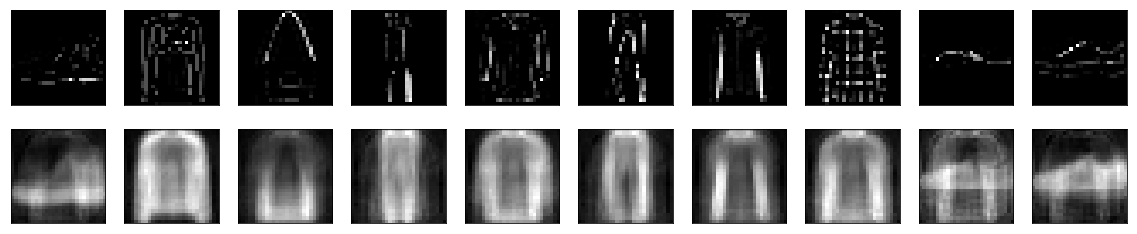

Dilated of the atom images of the decoder


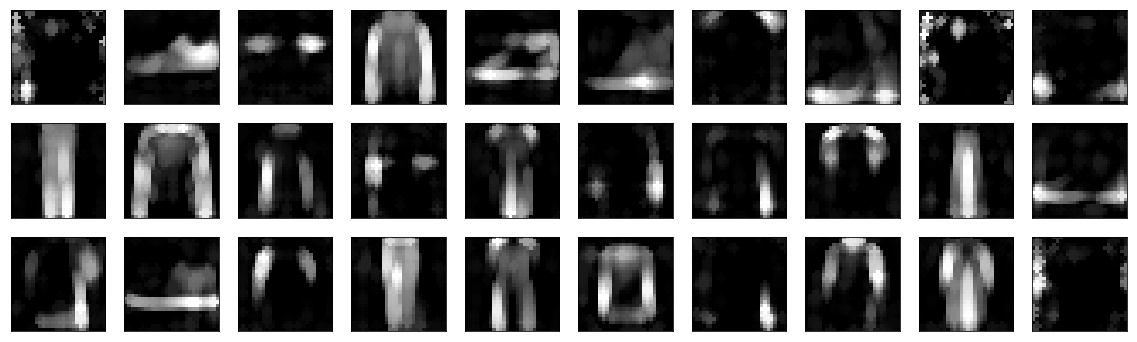

In [68]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 3.7 Sparsity_weight = 0.1 (sp_o = 0.1)

Original images and reconstructions - Reconstruction error:  0.015670316392183303


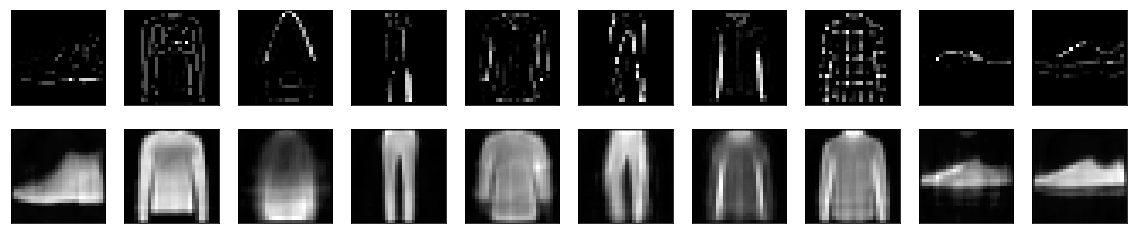

Histograms of the encodings - Sparsity (Hoyer):  0.20689044892787933


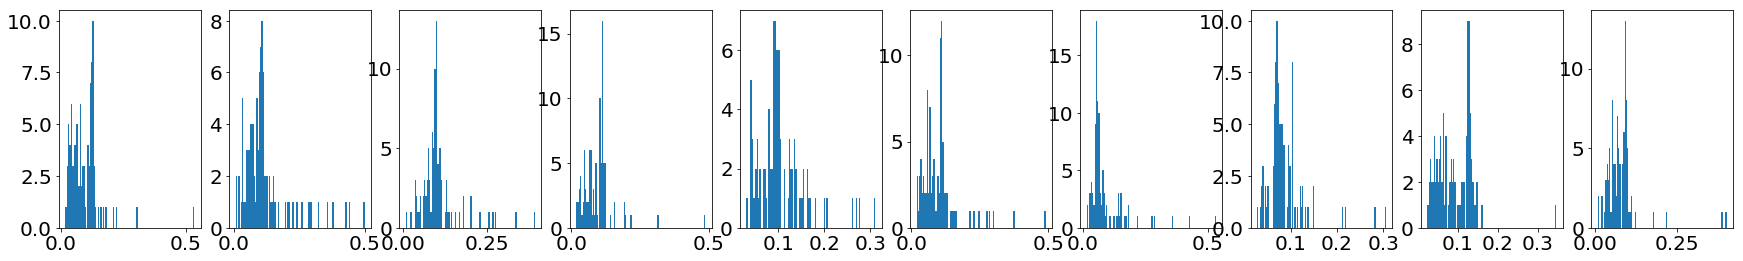

Atom images of the decoder


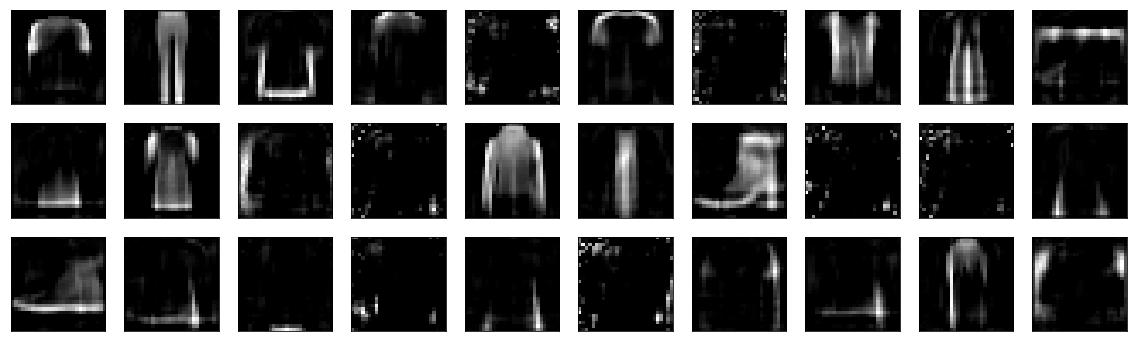

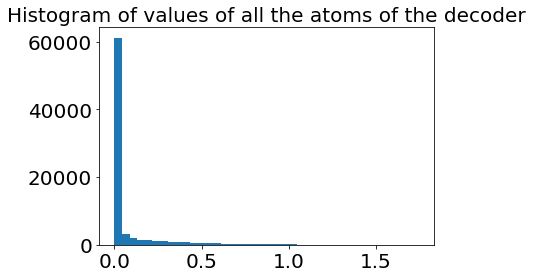

In [69]:
sp_o = 0.1
sp_w = 0.1
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_10_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO_NoOriginals/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


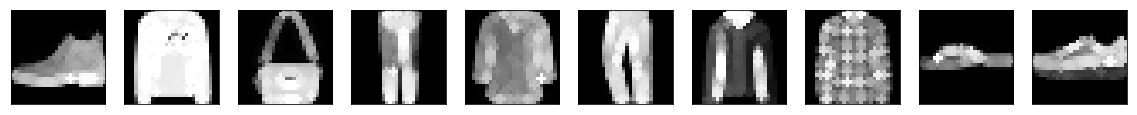

Dilatation of the reconstructions


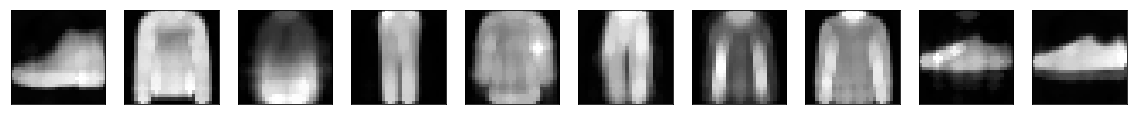

Original images and max-approximation to dilatation
Max-approx error to original:  0.33769979372024533  - Max-approx error to reconstruction:  0.33608656759262084


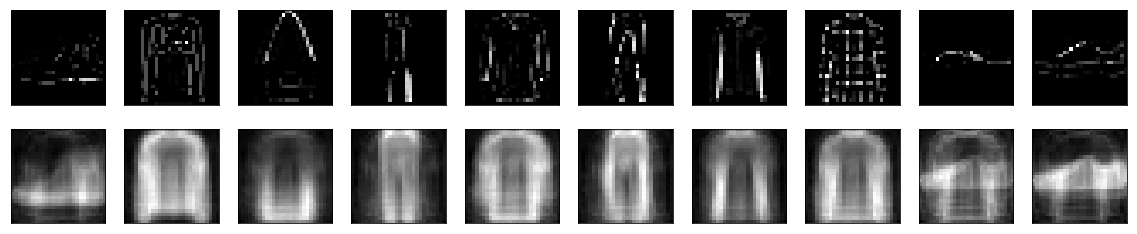

Dilated of the atom images of the decoder


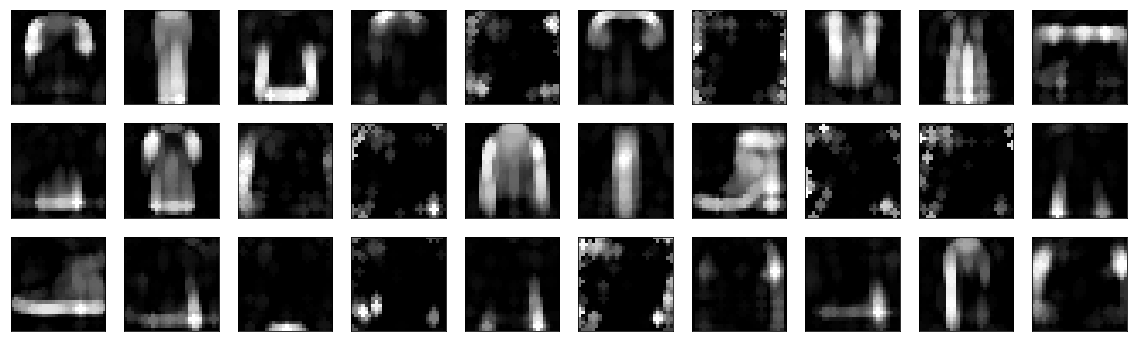

In [70]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 3.8 Sparsity_weight = 0.5 (sp_o = 0.1)

Original images and reconstructions - Reconstruction error:  0.02315669749677181


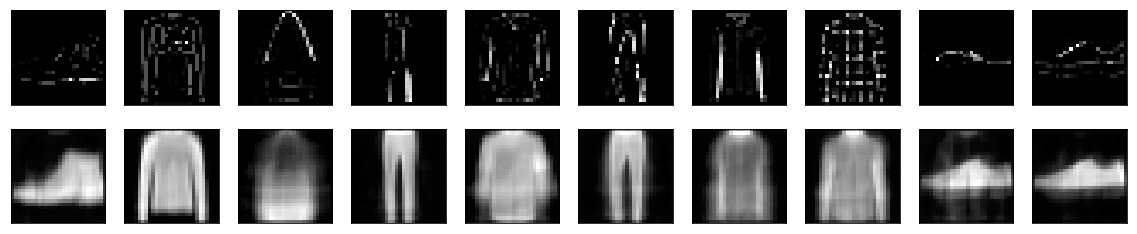

Histograms of the encodings - Sparsity (Hoyer):  0.11714214086532593


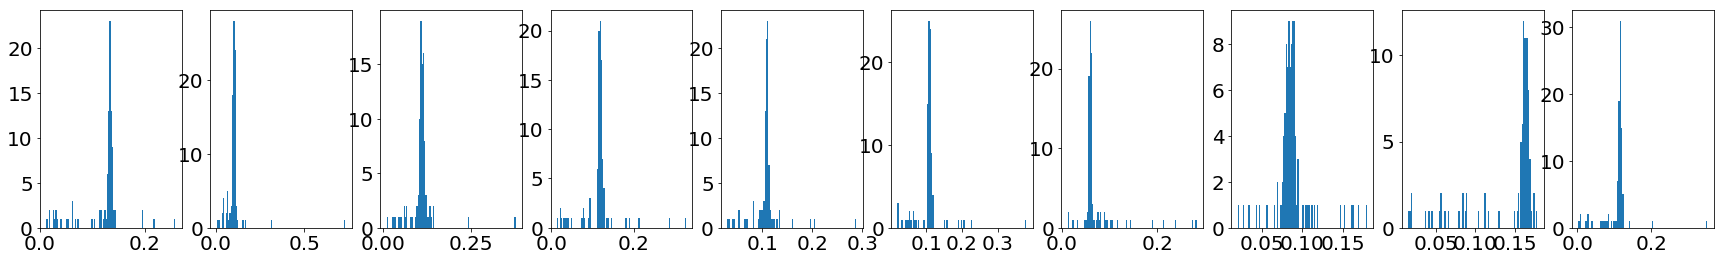

Atom images of the decoder


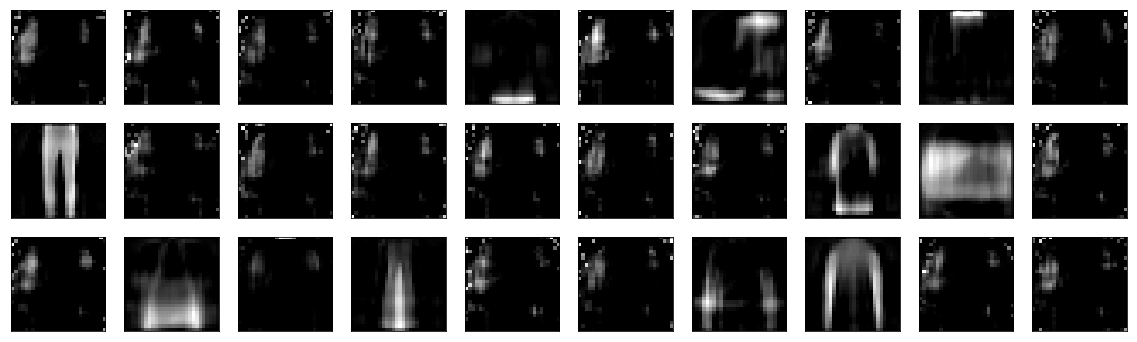

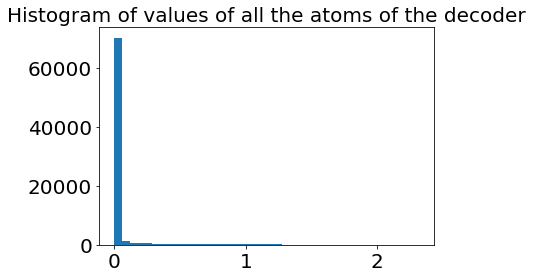

In [71]:
sp_o = 0.1
sp_w = 0.5
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_10_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO_NoOriginals/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


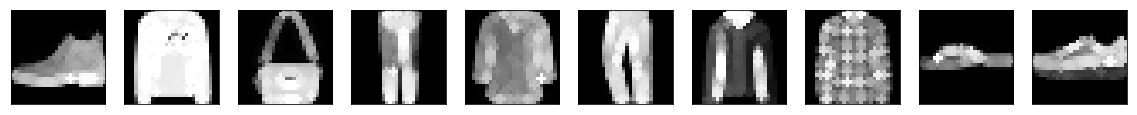

Dilatation of the reconstructions


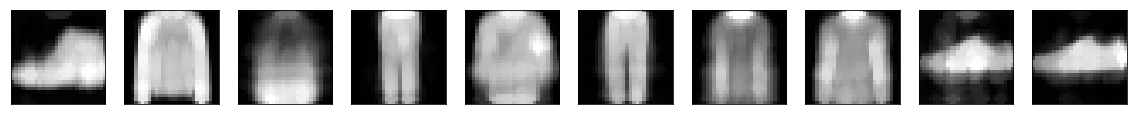

Original images and max-approximation to dilatation
Max-approx error to original:  0.08173132226467132  - Max-approx error to reconstruction:  0.09322856621742248


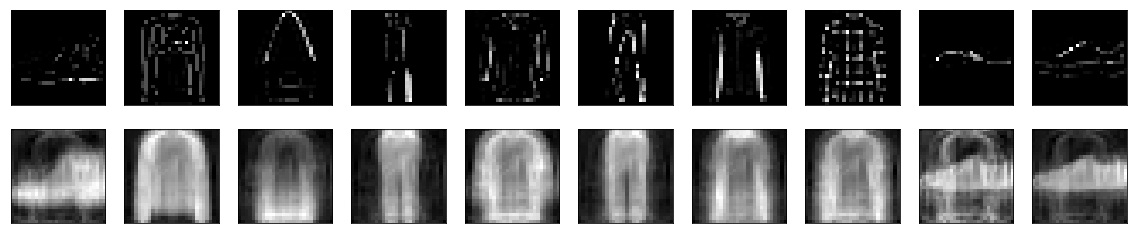

Dilated of the atom images of the decoder


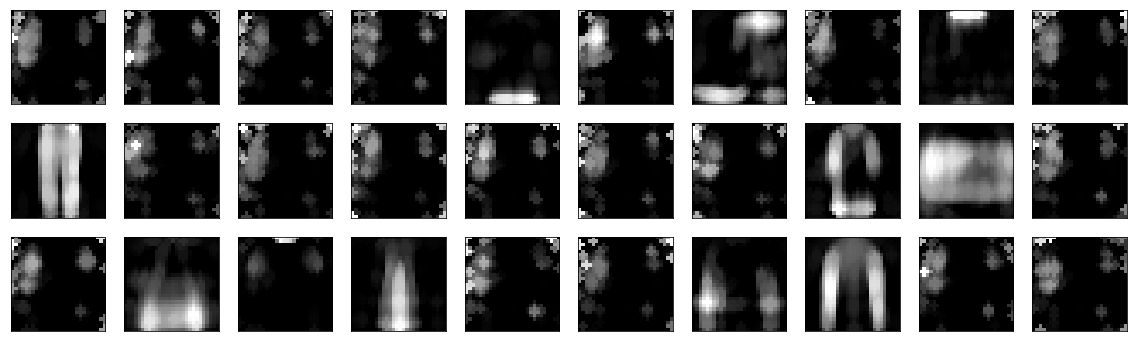

In [72]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

# 4. Sparsity_Objective = 0.2

## 4.1 Sparsity_weight = 0.0001 (sp_o = 0.2)

Original images and reconstructions - Reconstruction error:  0.011420832553505898


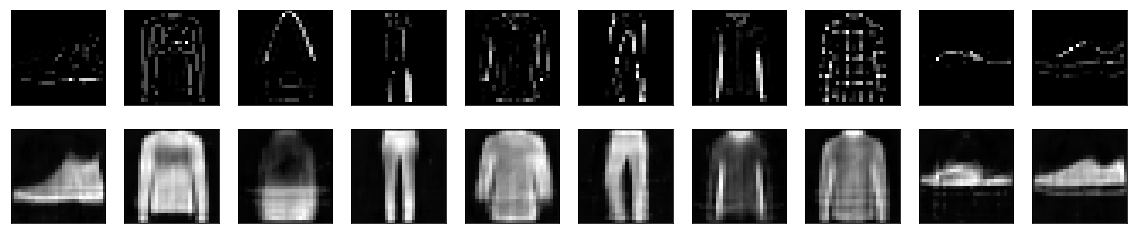

Histograms of the encodings - Sparsity (Hoyer):  0.2129853069782257


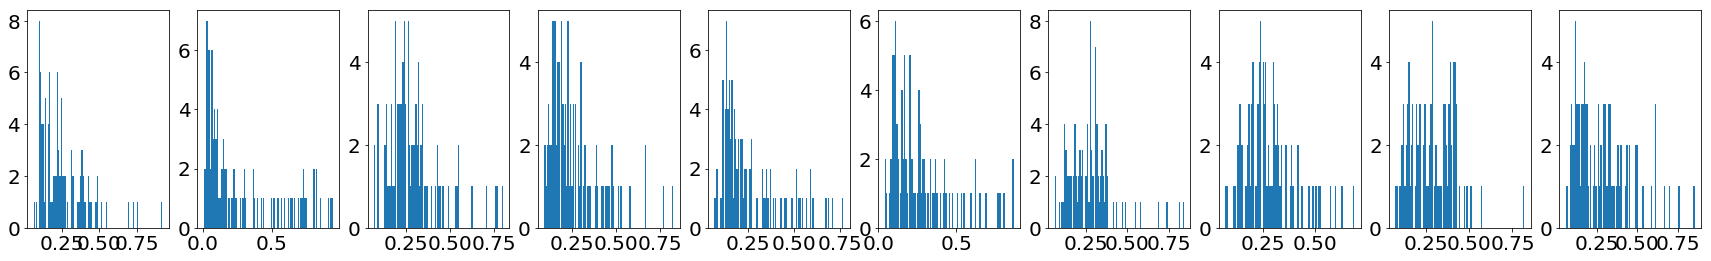

Atom images of the decoder


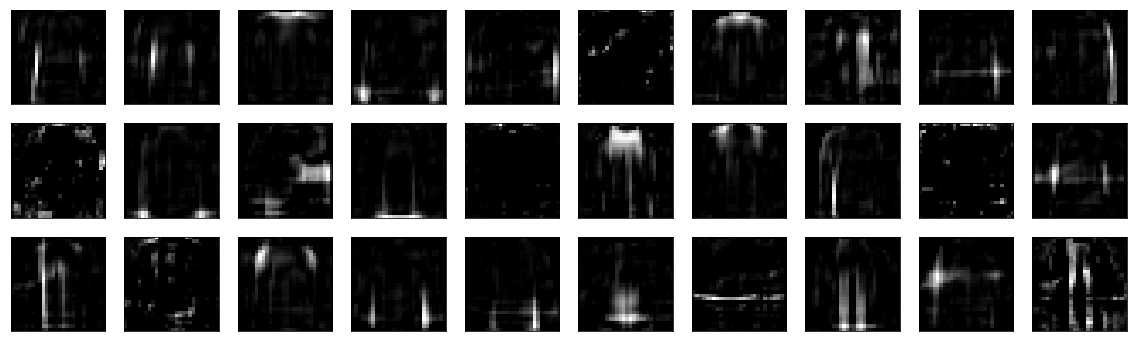

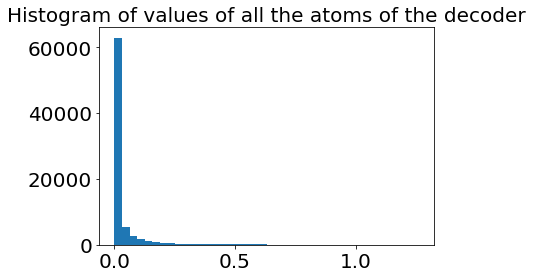

In [73]:
sp_o = 0.2
sp_w = 0.0001
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_09_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO_NoOriginals/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


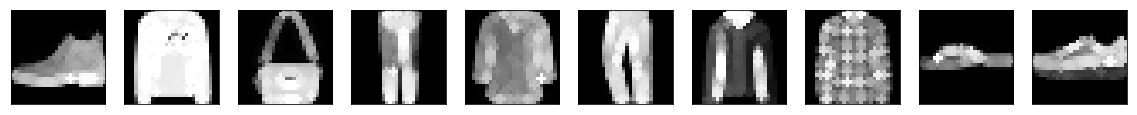

Dilatation of the reconstructions


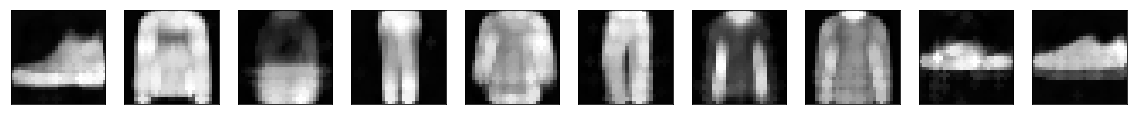

Original images and max-approximation to dilatation
Max-approx error to original:  1.3535765369415282  - Max-approx error to reconstruction:  1.3787720752716064


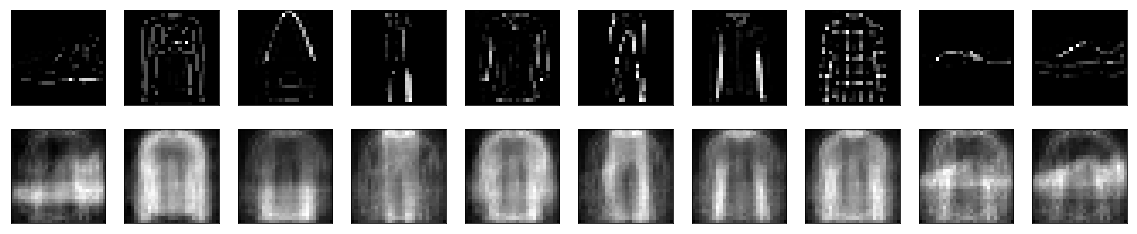

Dilated of the atom images of the decoder


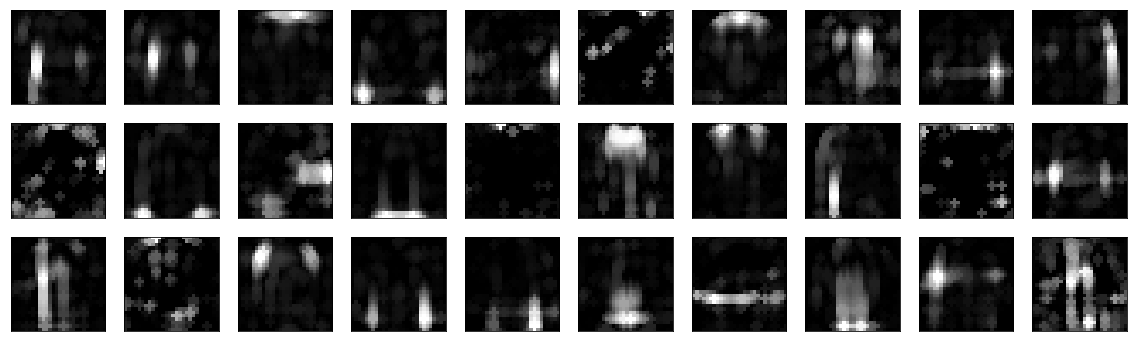

In [74]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 4.2 Sparsity_weight = 0.0005 (sp_o = 0.2)

Original images and reconstructions - Reconstruction error:  0.011725377351045608


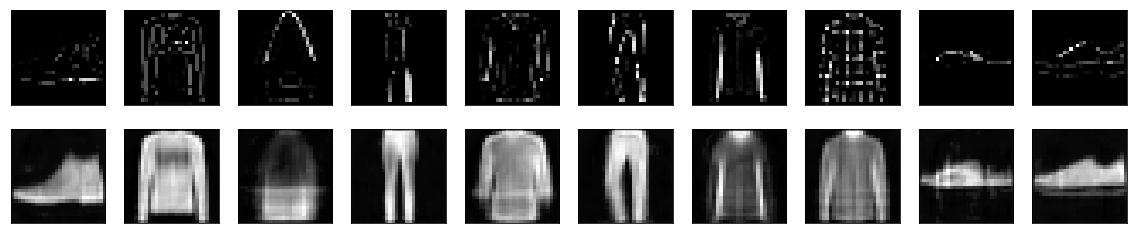

Histograms of the encodings - Sparsity (Hoyer):  0.22740210592746735


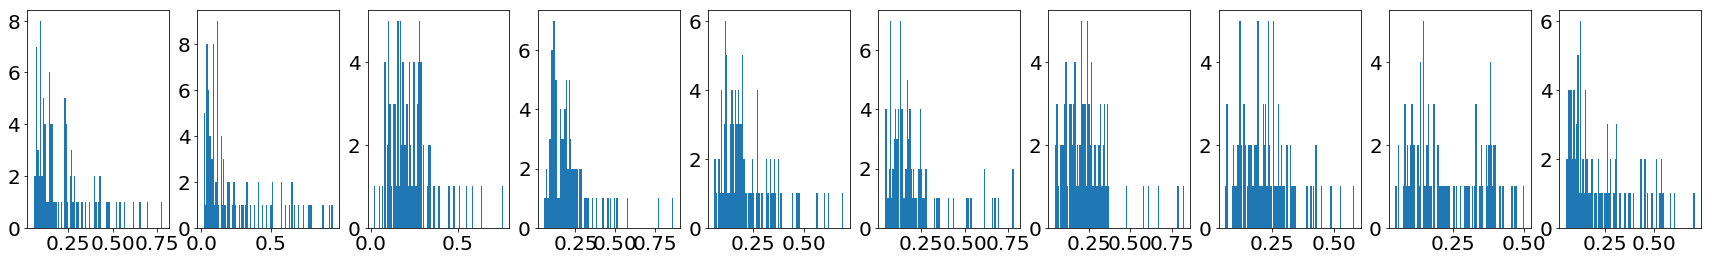

Atom images of the decoder


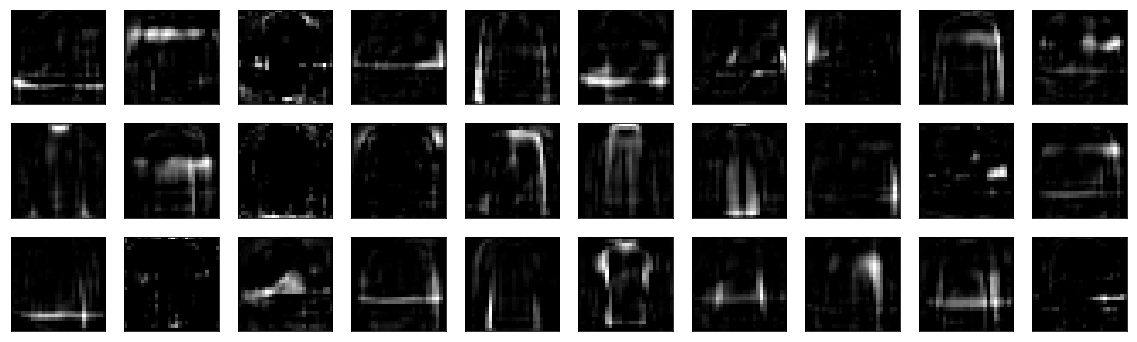

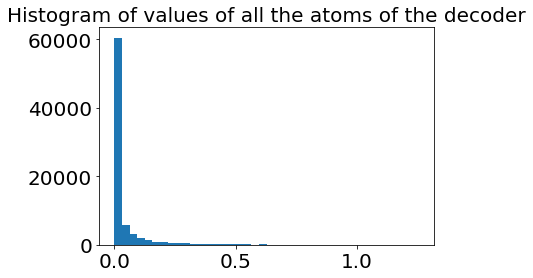

In [75]:
sp_o = 0.2
sp_w = 0.0005
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_09_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO_NoOriginals/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


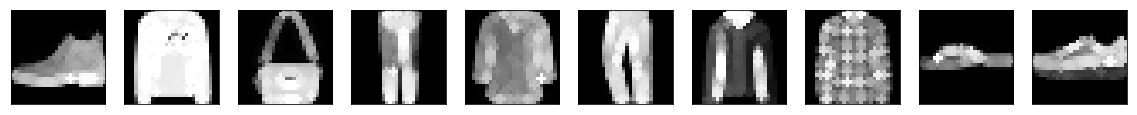

Dilatation of the reconstructions


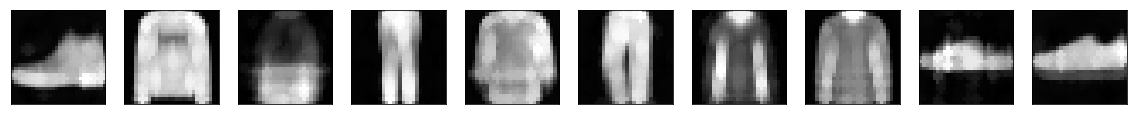

Original images and max-approximation to dilatation
Max-approx error to original:  1.0707708625793457  - Max-approx error to reconstruction:  1.0932256378173828


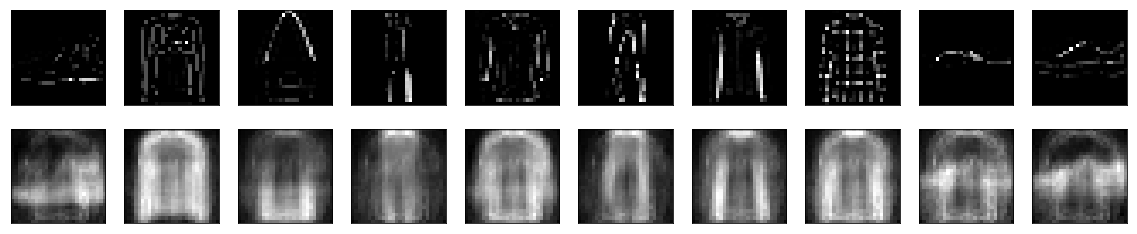

Dilated of the atom images of the decoder


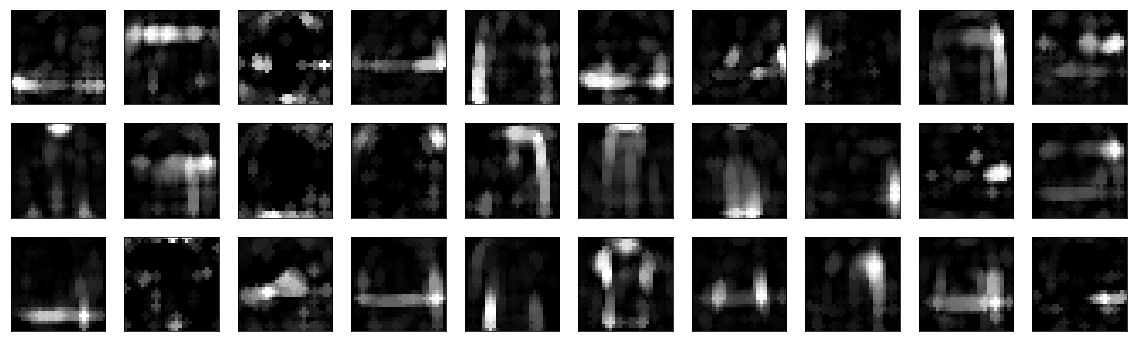

In [76]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 4.3 Sparsity_weight = 0.001 (sp_o = 0.2)

Original images and reconstructions - Reconstruction error:  0.0120626540184021


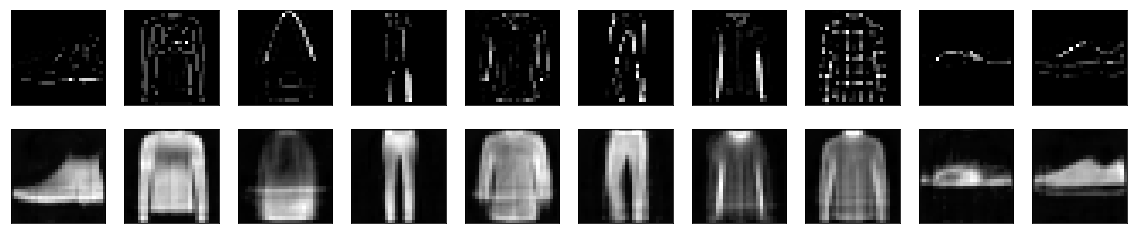

Histograms of the encodings - Sparsity (Hoyer):  0.22777092456817627


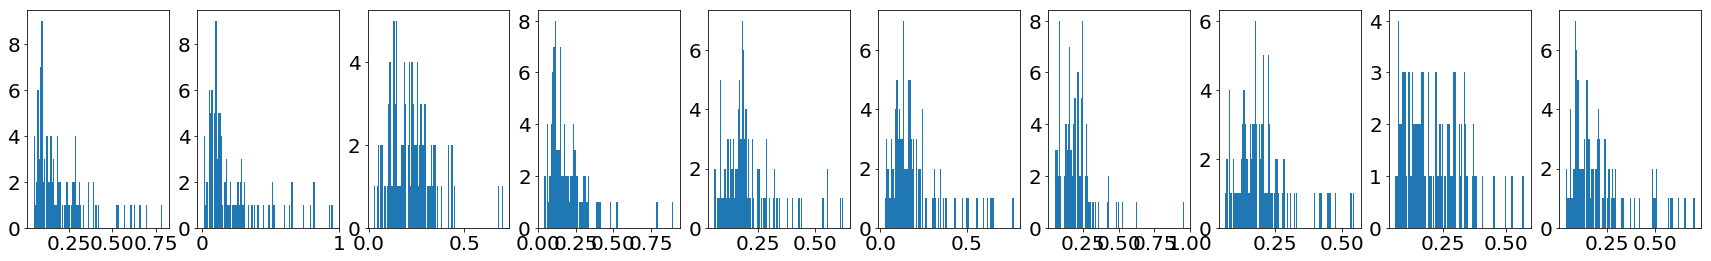

Atom images of the decoder


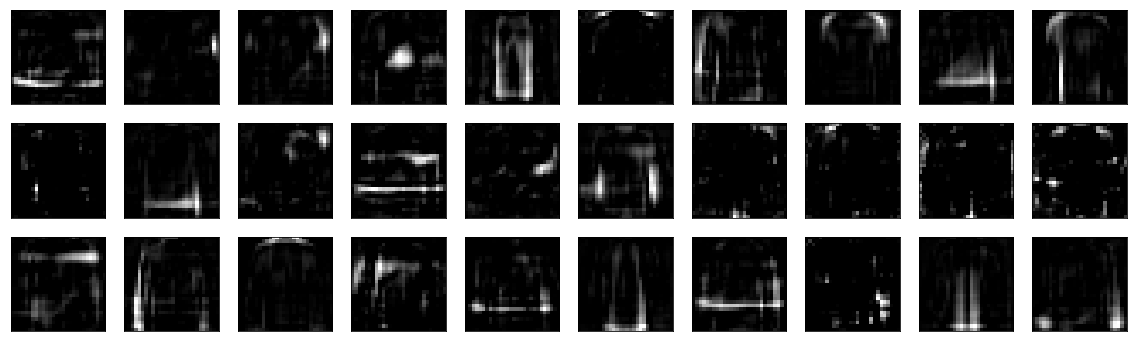

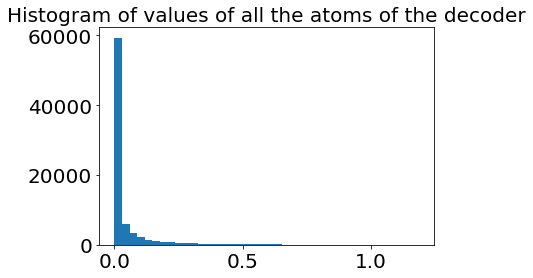

In [77]:
sp_o = 0.2
sp_w = 0.001
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_09_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO_NoOriginals/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


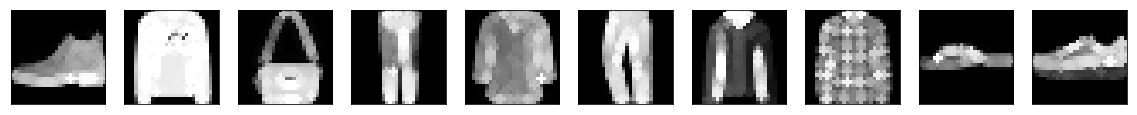

Dilatation of the reconstructions


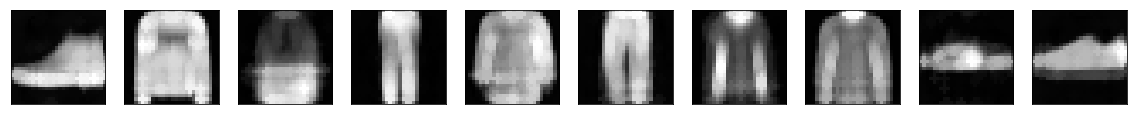

Original images and max-approximation to dilatation
Max-approx error to original:  0.9546124225616455  - Max-approx error to reconstruction:  0.9757300867080688


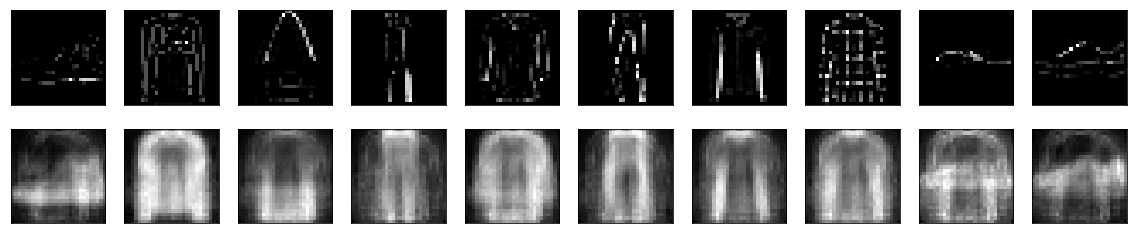

Dilated of the atom images of the decoder


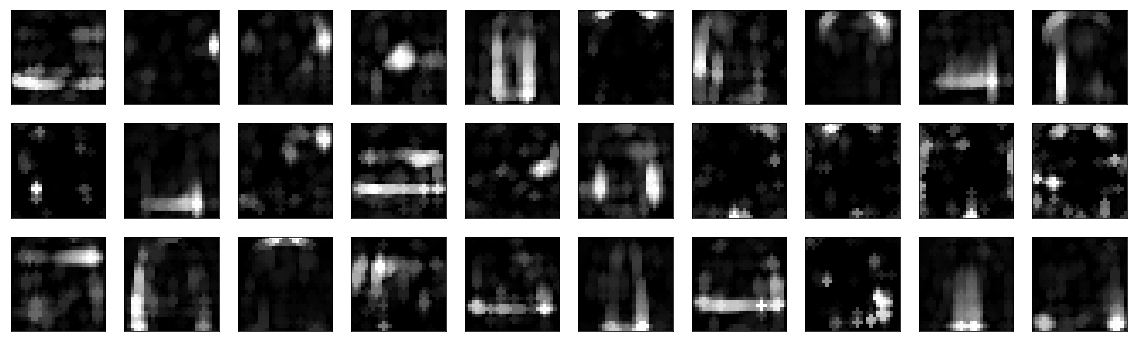

In [78]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 4.4 Sparsity_weight = 0.005 (sp_o = 0.2)

Original images and reconstructions - Reconstruction error:  0.01162991593182087


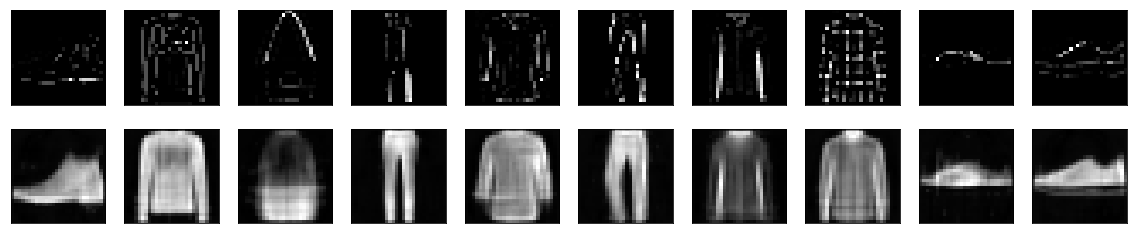

Histograms of the encodings - Sparsity (Hoyer):  0.2194555699825287


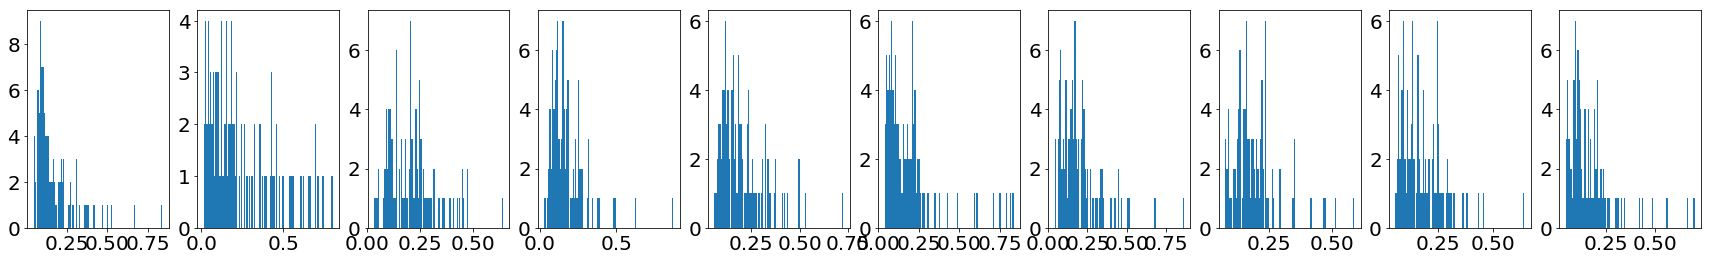

Atom images of the decoder


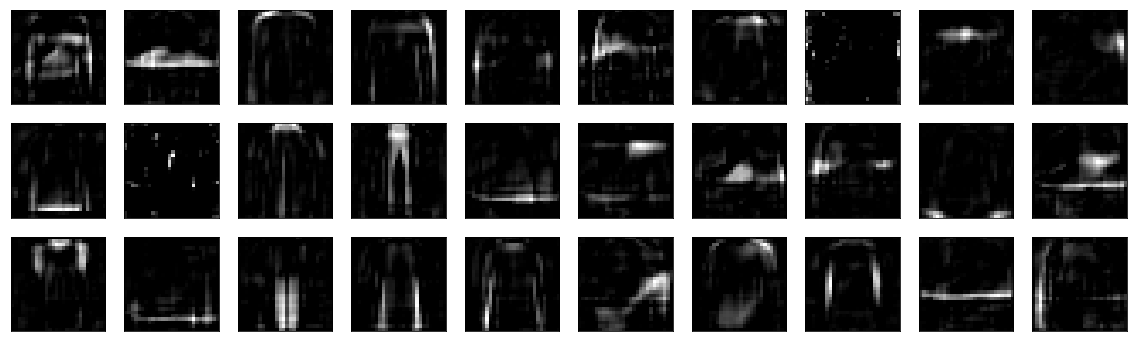

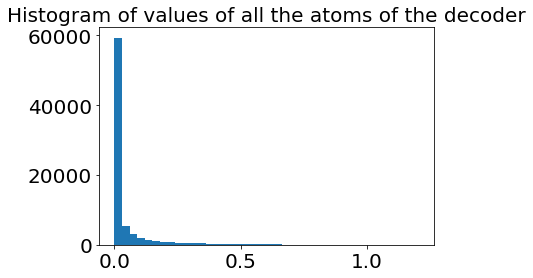

In [79]:
sp_o = 0.2
sp_w = 0.005
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_09_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO_NoOriginals/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


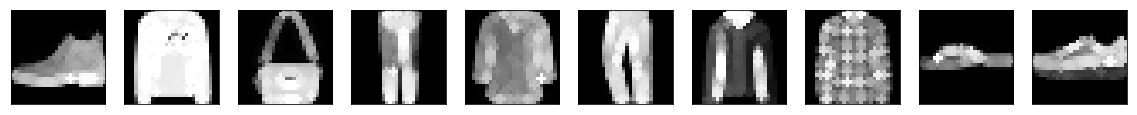

Dilatation of the reconstructions


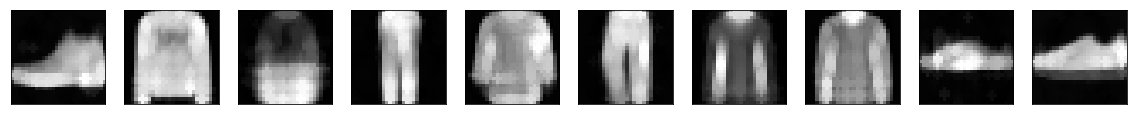

Original images and max-approximation to dilatation
Max-approx error to original:  0.9307153335571289  - Max-approx error to reconstruction:  0.9487291273117066


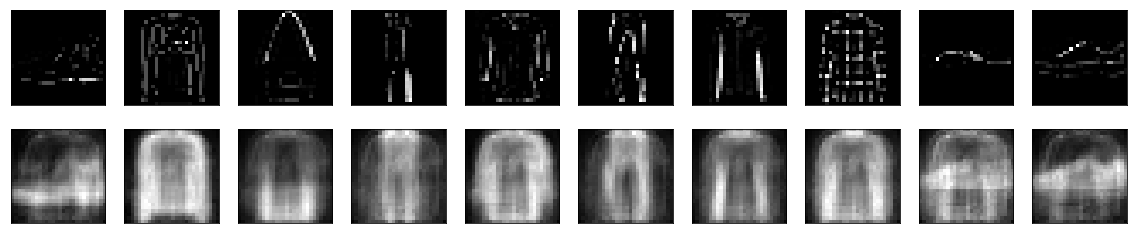

Dilated of the atom images of the decoder


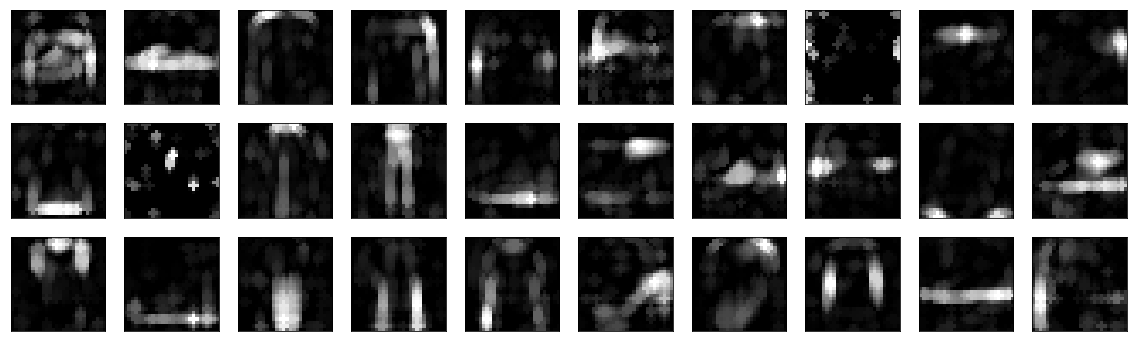

In [80]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 4.5 Sparsity_weight = 0.01 (sp_o = 0.2)

Original images and reconstructions - Reconstruction error:  0.011533321103453635


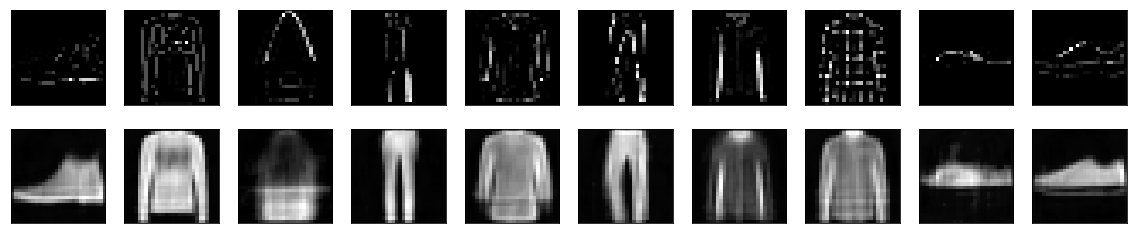

Histograms of the encodings - Sparsity (Hoyer):  0.20226691663265228


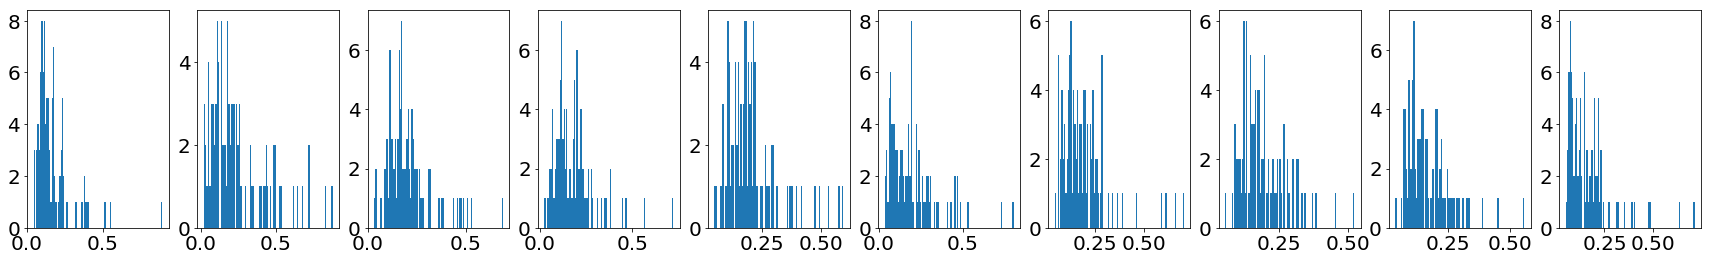

Atom images of the decoder


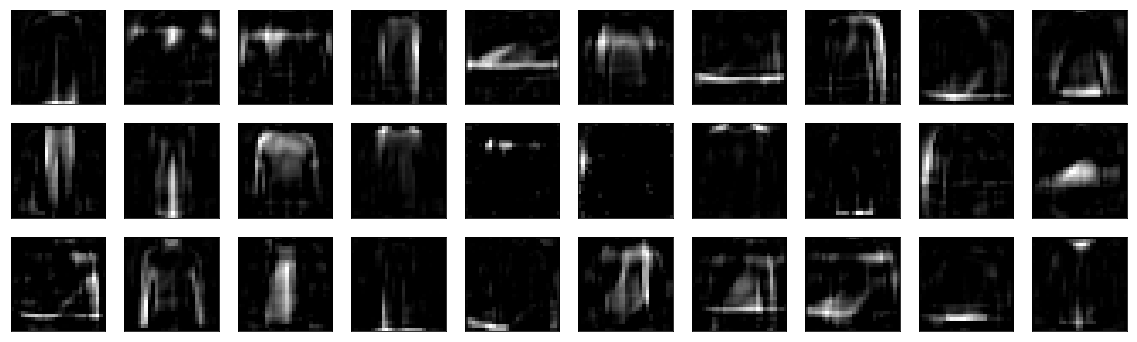

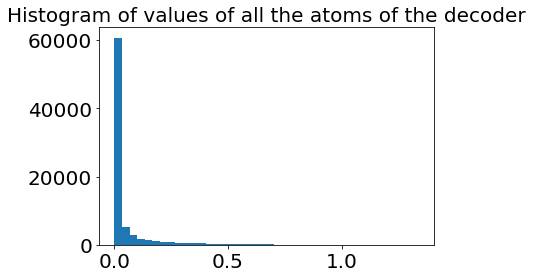

In [81]:
sp_o = 0.2
sp_w = 0.01
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_10_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO_NoOriginals/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


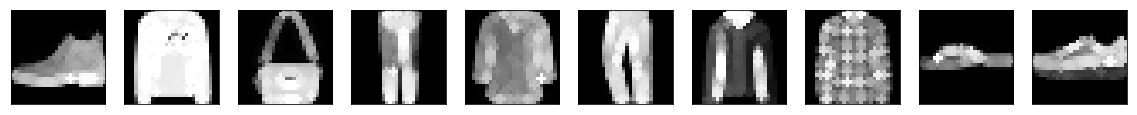

Dilatation of the reconstructions


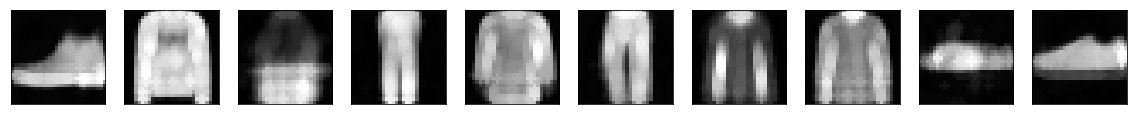

Original images and max-approximation to dilatation
Max-approx error to original:  0.9492231559753418  - Max-approx error to reconstruction:  0.9663635293960571


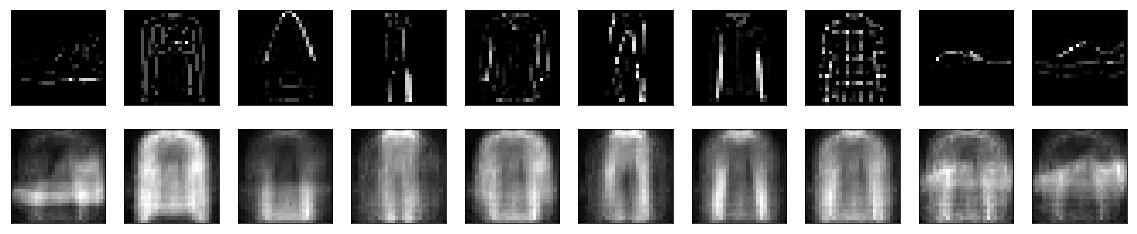

Dilated of the atom images of the decoder


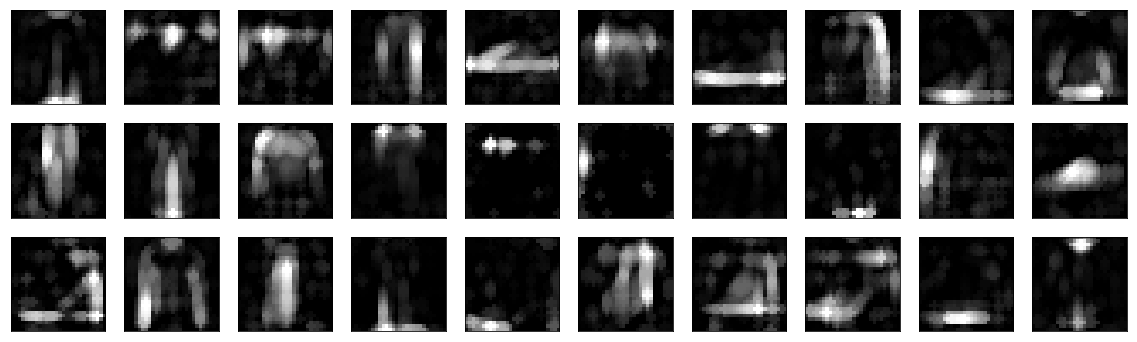

In [82]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 4.6 Sparsity_weight = 0.05 (sp_o = 0.2)

Original images and reconstructions - Reconstruction error:  0.01177602259516716


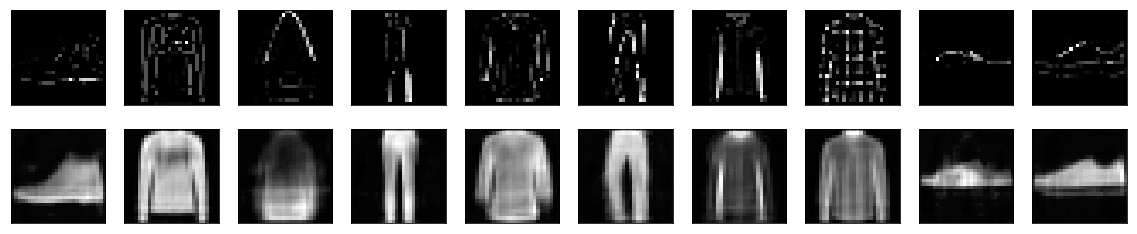

Histograms of the encodings - Sparsity (Hoyer):  0.13440917432308197


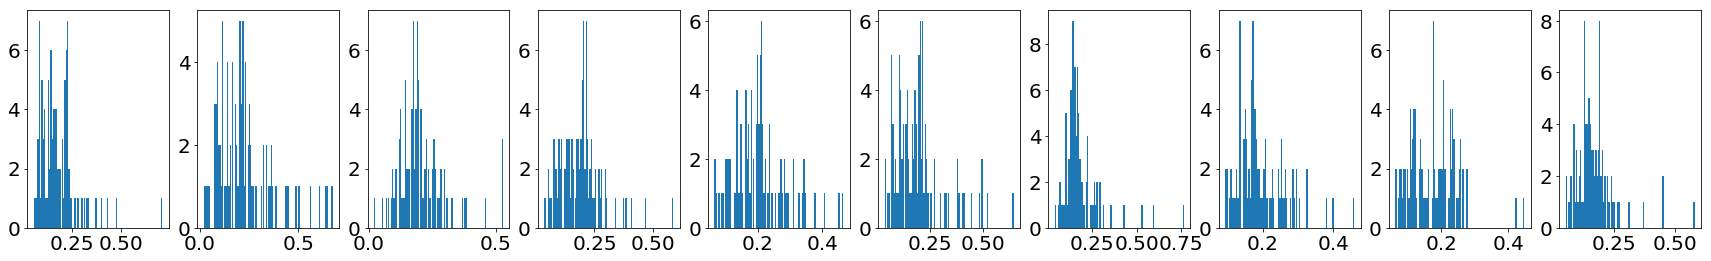

Atom images of the decoder


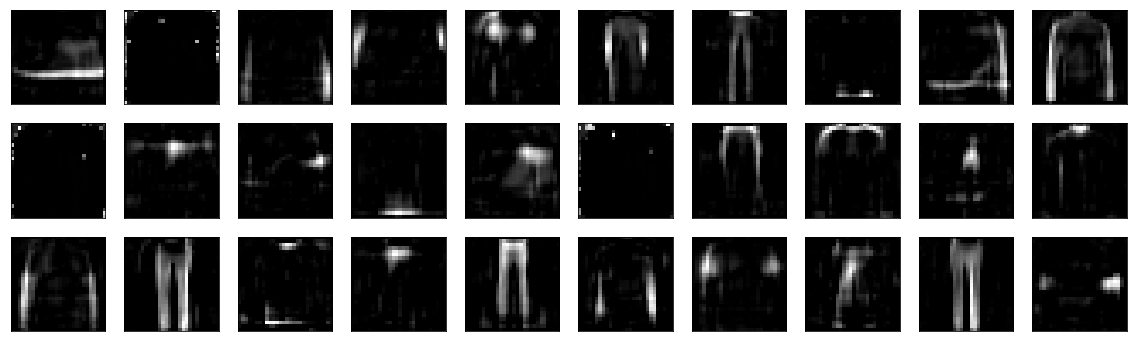

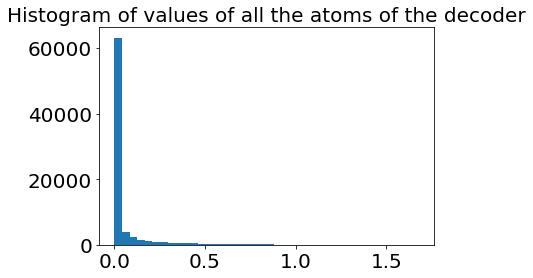

In [83]:
sp_o = 0.2
sp_w = 0.05
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_10_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO_NoOriginals/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


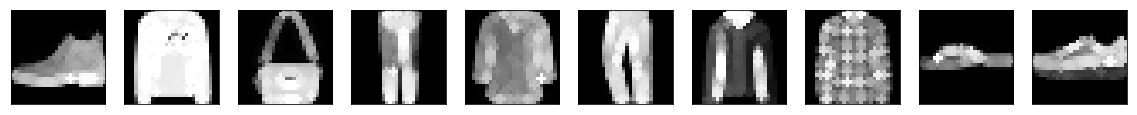

Dilatation of the reconstructions


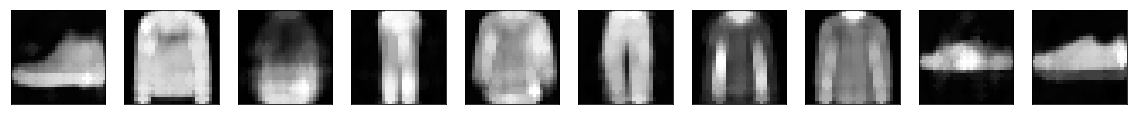

Original images and max-approximation to dilatation
Max-approx error to original:  1.1044150259017944  - Max-approx error to reconstruction:  1.1313016348838807


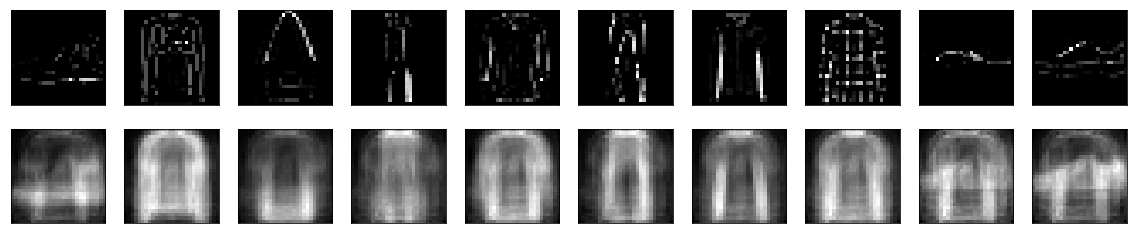

Dilated of the atom images of the decoder


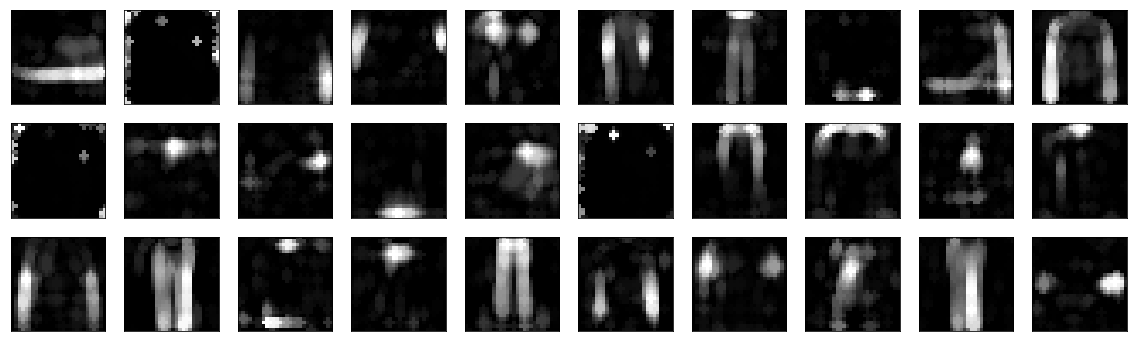

In [84]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 4.7 Sparsity_weight = 0.1 (sp_o = 0.2)

Original images and reconstructions - Reconstruction error:  0.012121545818448067


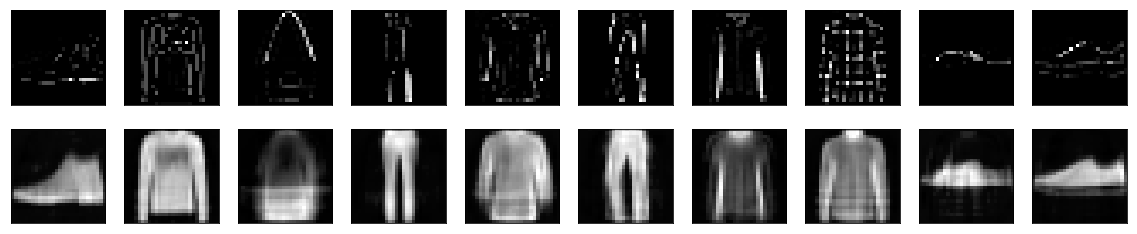

Histograms of the encodings - Sparsity (Hoyer):  0.11651909351348877


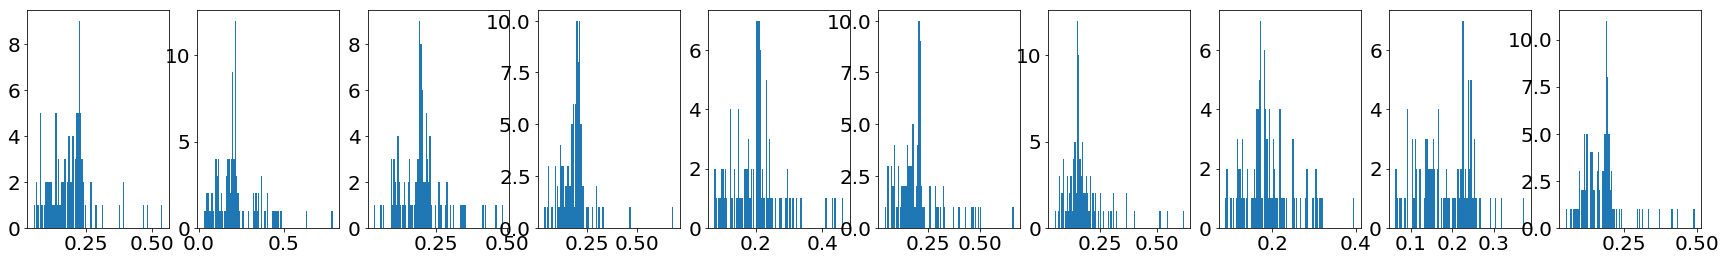

Atom images of the decoder


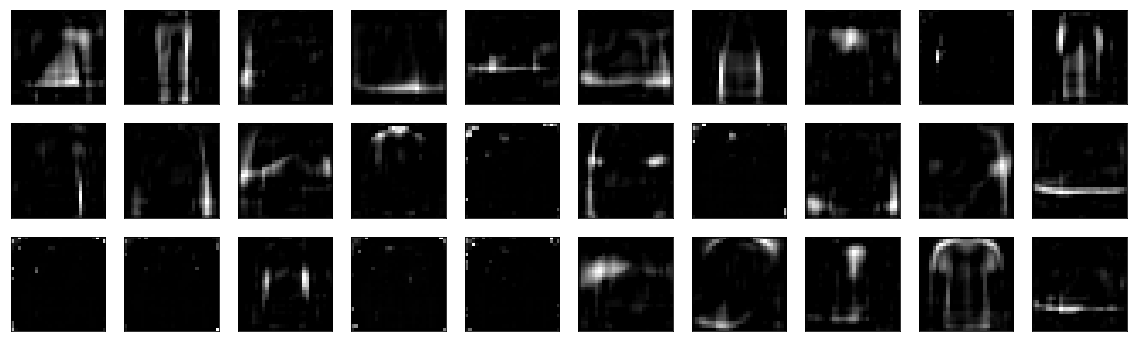

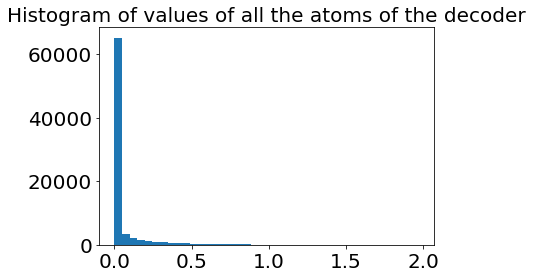

In [85]:
sp_o = 0.2
sp_w = 0.1
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_10_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO_NoOriginals/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


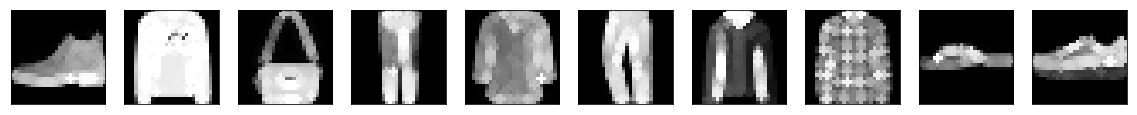

Dilatation of the reconstructions


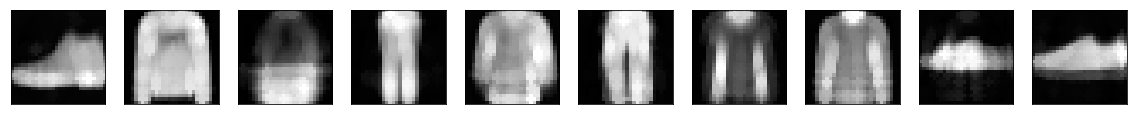

Original images and max-approximation to dilatation
Max-approx error to original:  1.066143609714508  - Max-approx error to reconstruction:  1.0909124576568603


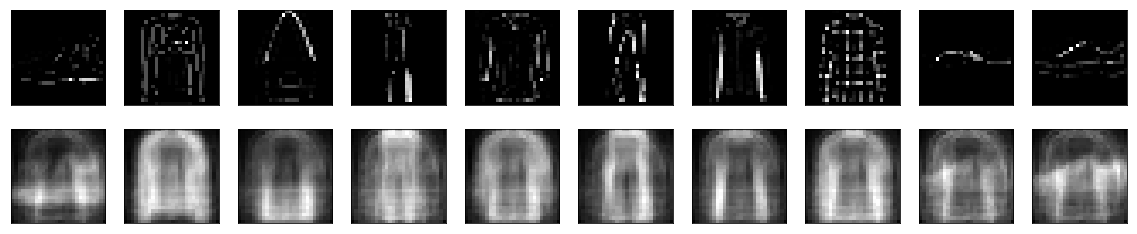

Dilated of the atom images of the decoder


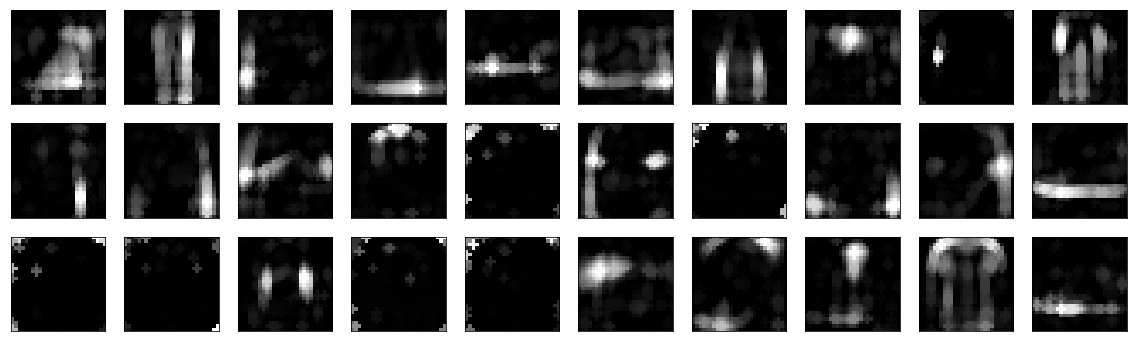

In [86]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 4.8 Sparsity_weight = 0.5 (sp_o = 0.2)

Original images and reconstructions - Reconstruction error:  0.020859745693206786


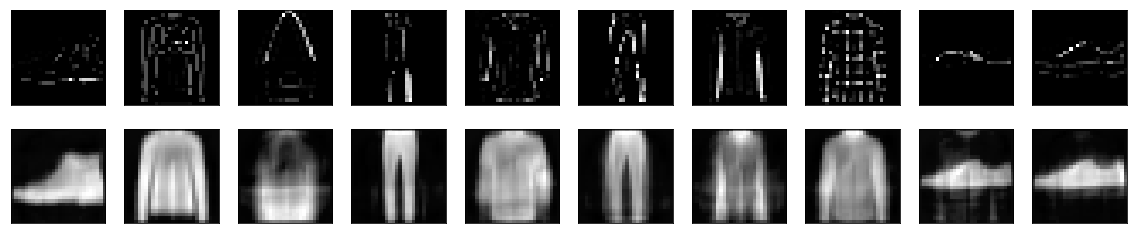

Histograms of the encodings - Sparsity (Hoyer):  0.12152212113142014


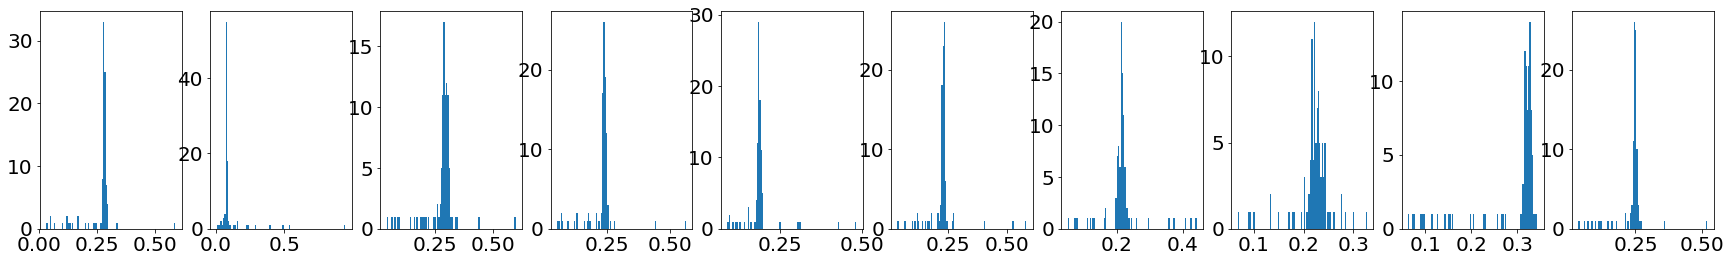

Atom images of the decoder


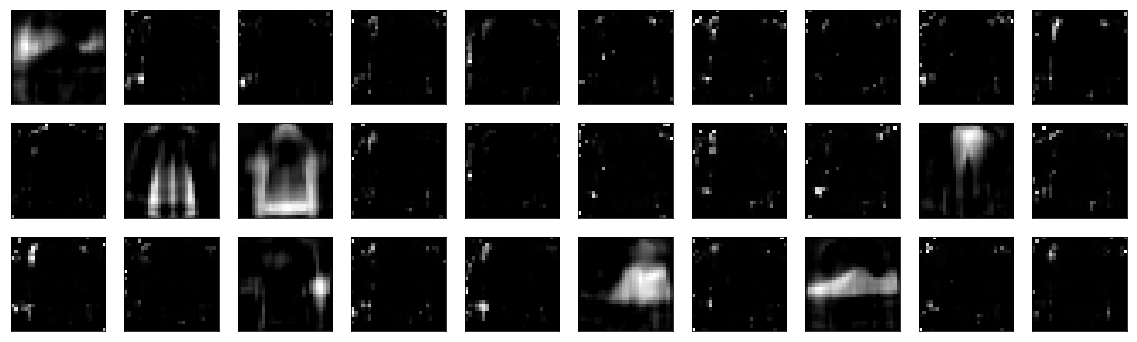

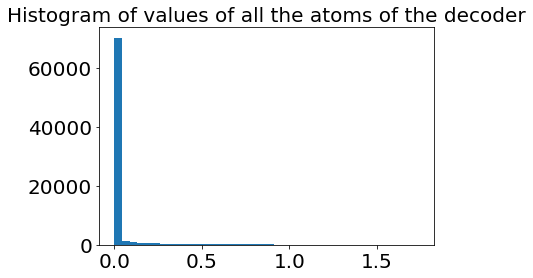

In [87]:
sp_o = 0.2
sp_w = 0.5
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_10_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO_NoOriginals/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


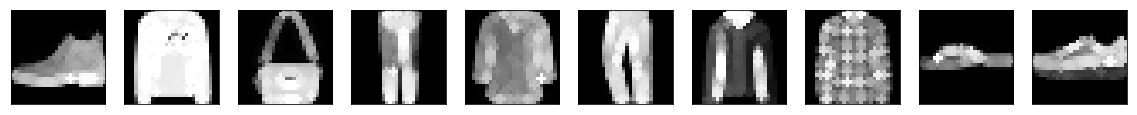

Dilatation of the reconstructions


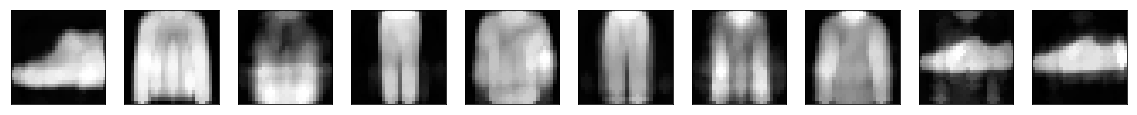

Original images and max-approximation to dilatation
Max-approx error to original:  0.24957974400520325  - Max-approx error to reconstruction:  0.2572545958995819


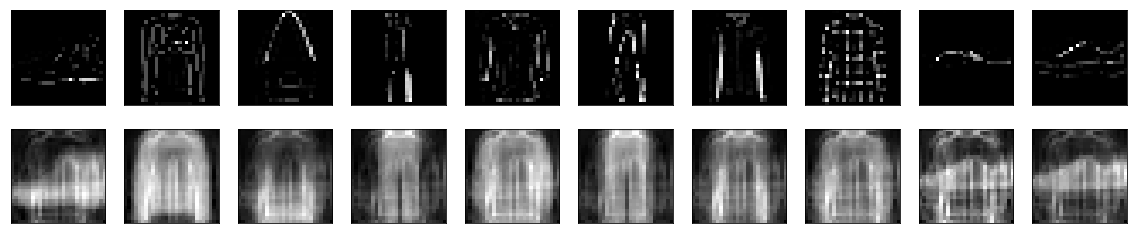

Dilated of the atom images of the decoder


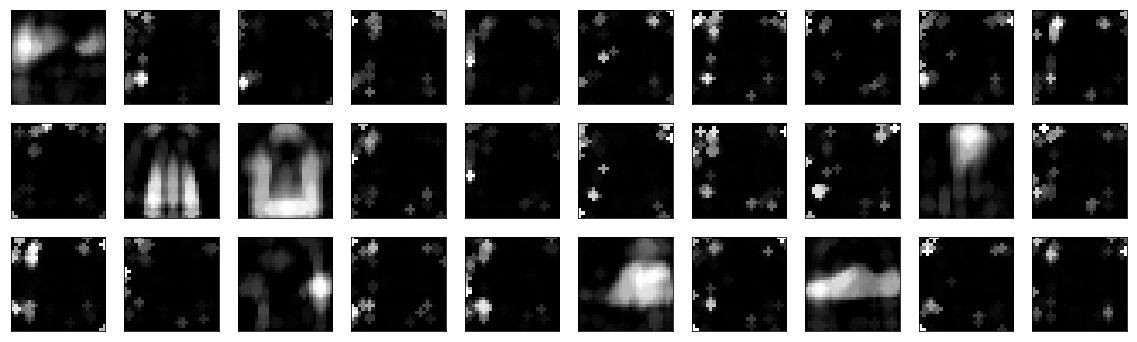

In [88]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)